<a href="https://colab.research.google.com/github/BureddySaiPoojitha/AIML_Module05_ALL_Labs_-/blob/main/Module05_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML 2024**


# Regression Lab1 : Linear Regression,MSE and Polynomial Regression

In [ ]:
import numpy as np
from sklearn import linear_model,metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

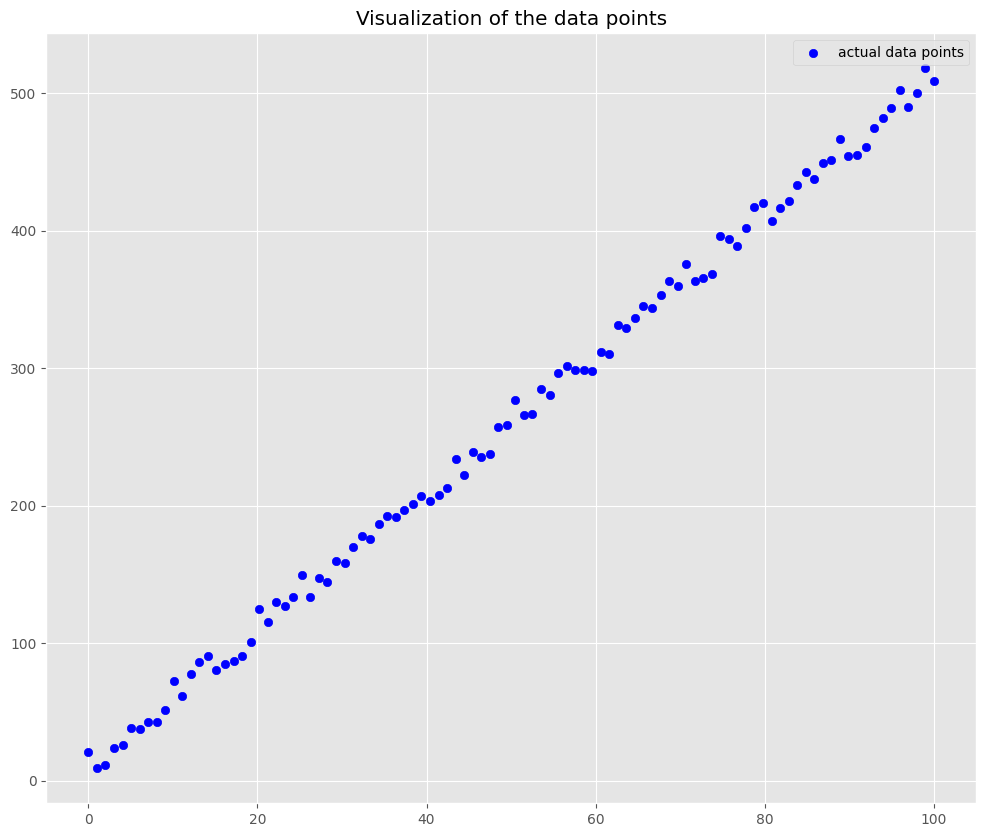

In [ ]:
np.random.seed(15)

x = np.linspace(0,100,100).reshape((-1,1))
y = (np.random.rand(100)*25).astype(int).reshape((-1,1)) + 5*x

plt.title("Visualization of the data points")
plt.scatter(x,y,color="blue")
plt.legend(["actual data points"])
plt.show()


# Brute-force Solution

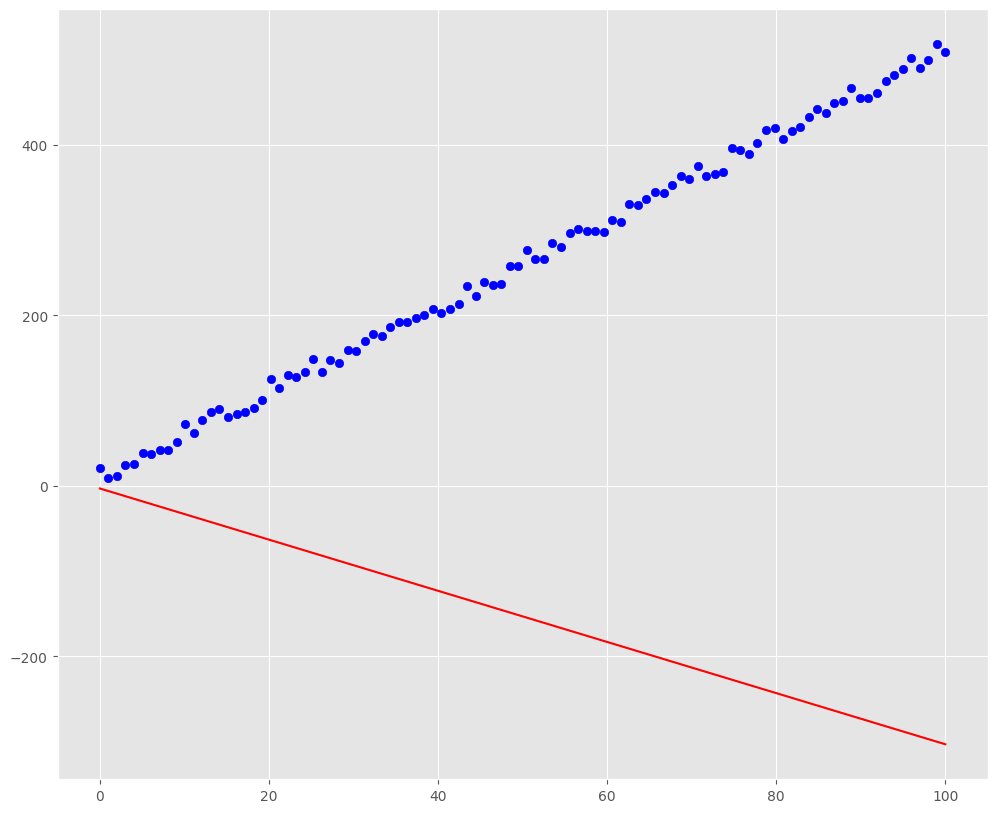

Average distance: 413.6700000000001



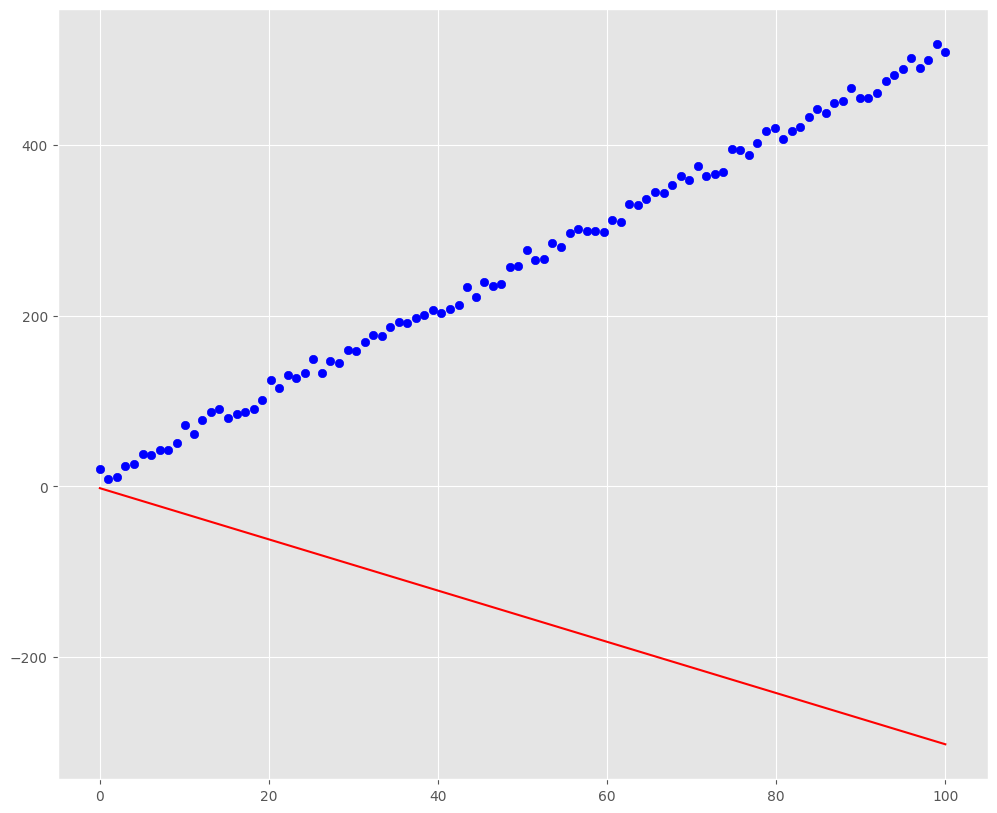

Average distance: 412.6700000000001



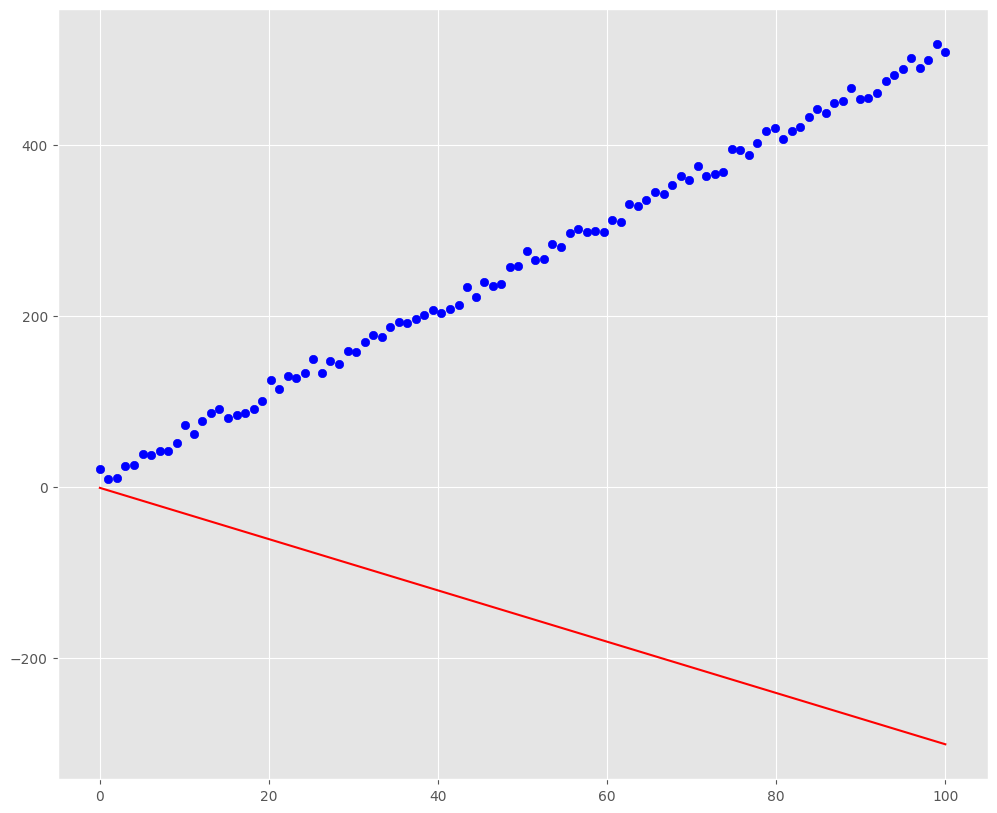

Average distance: 411.6700000000001



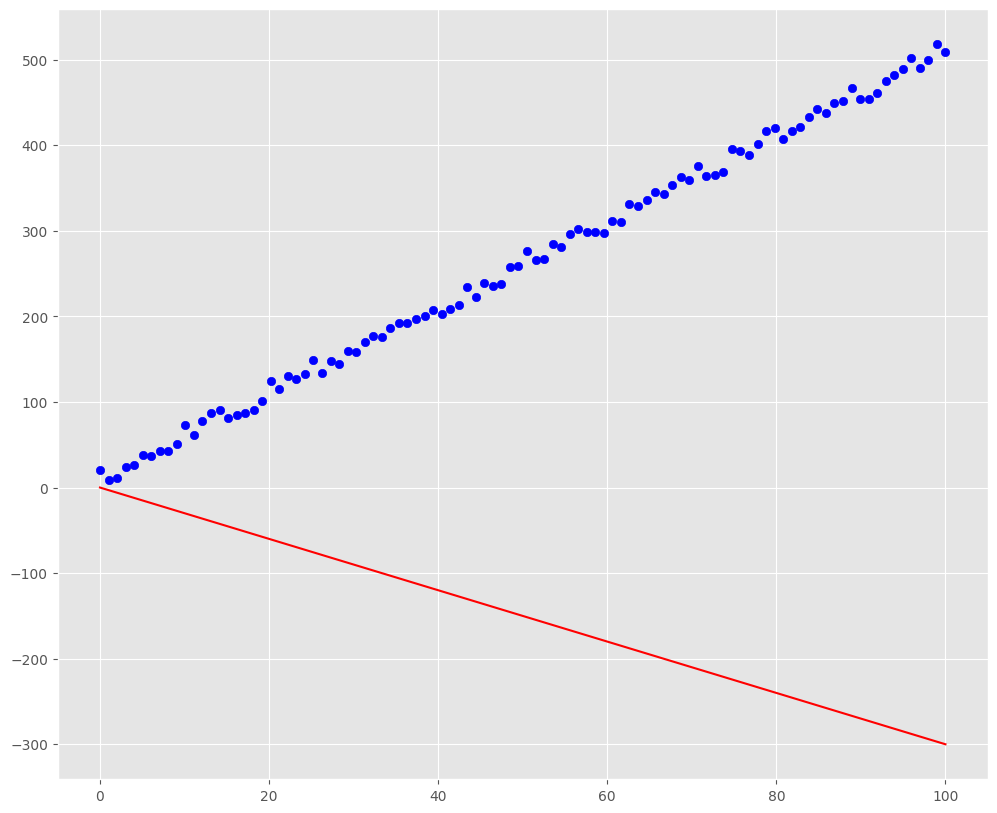

Average distance: 410.6700000000001



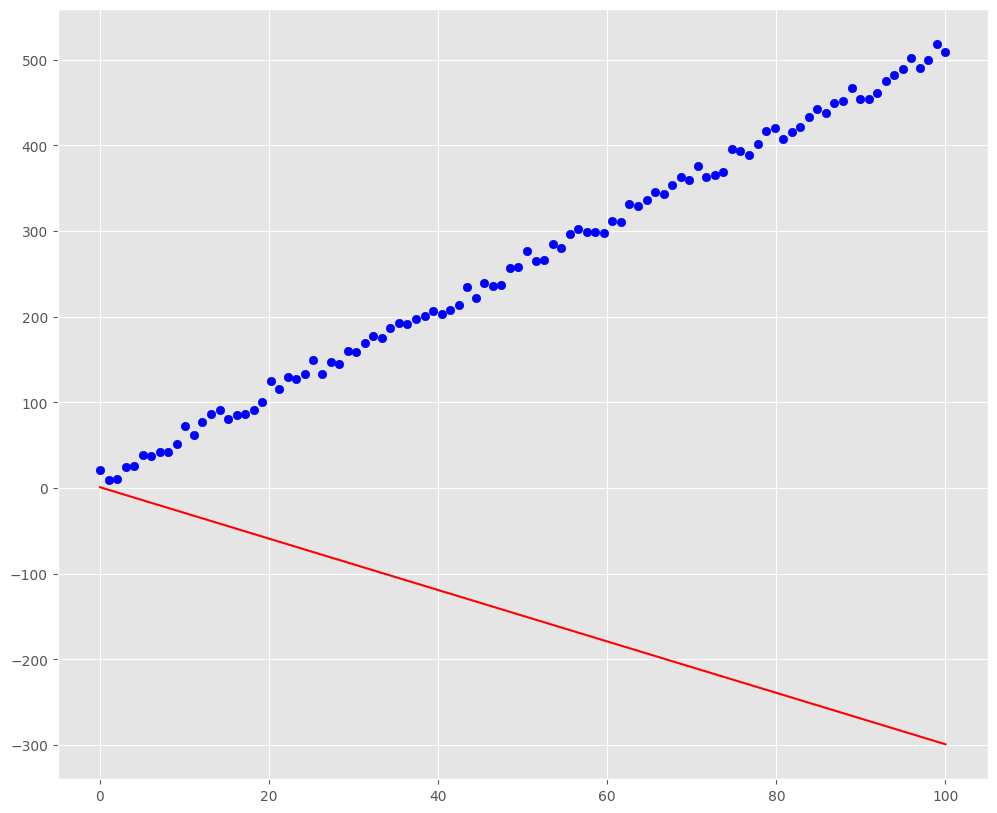

Average distance: 409.6700000000001



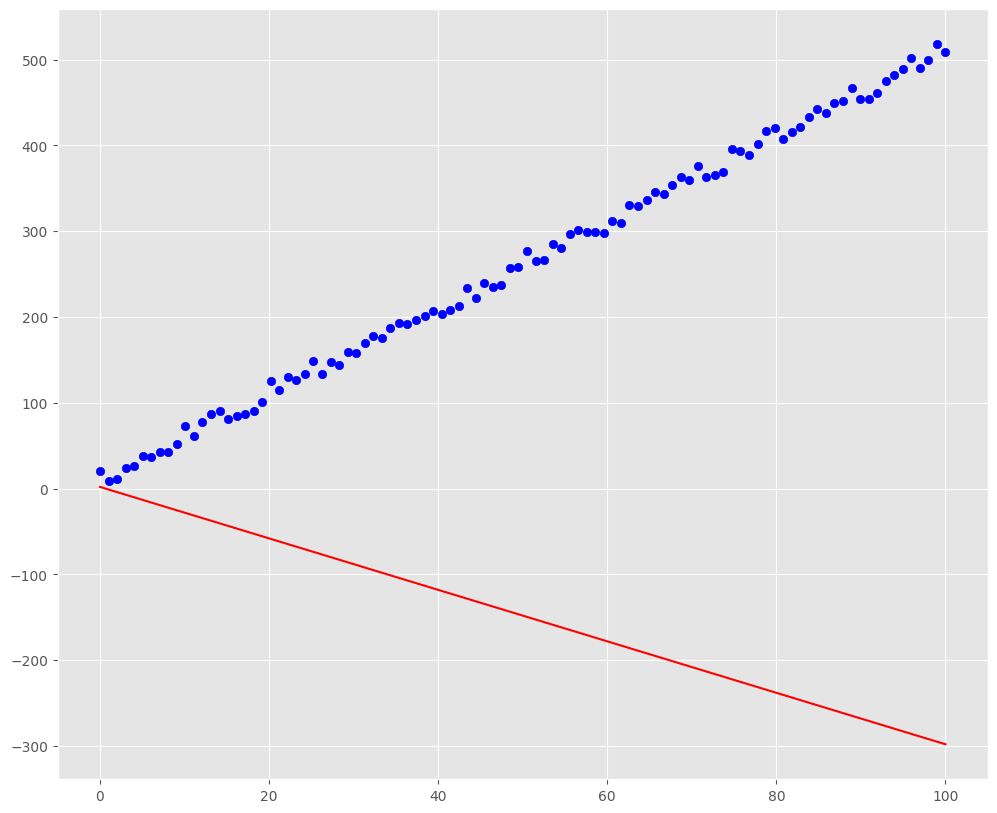

Average distance: 408.6700000000001



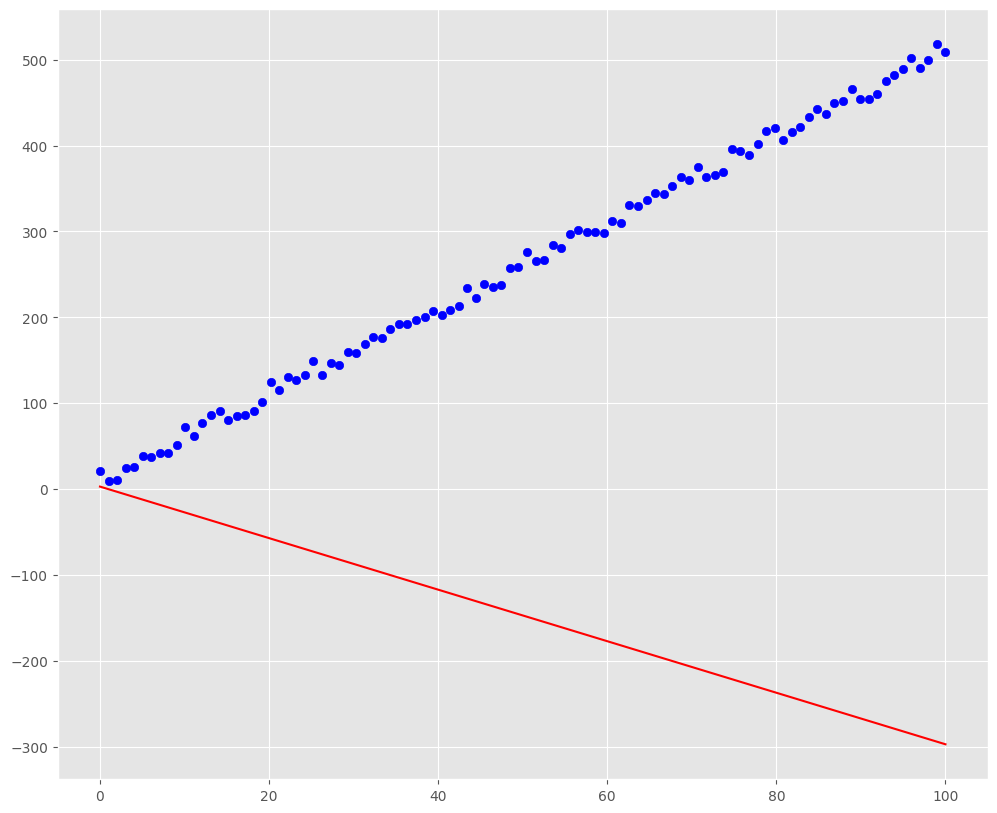

Average distance: 407.6700000000001



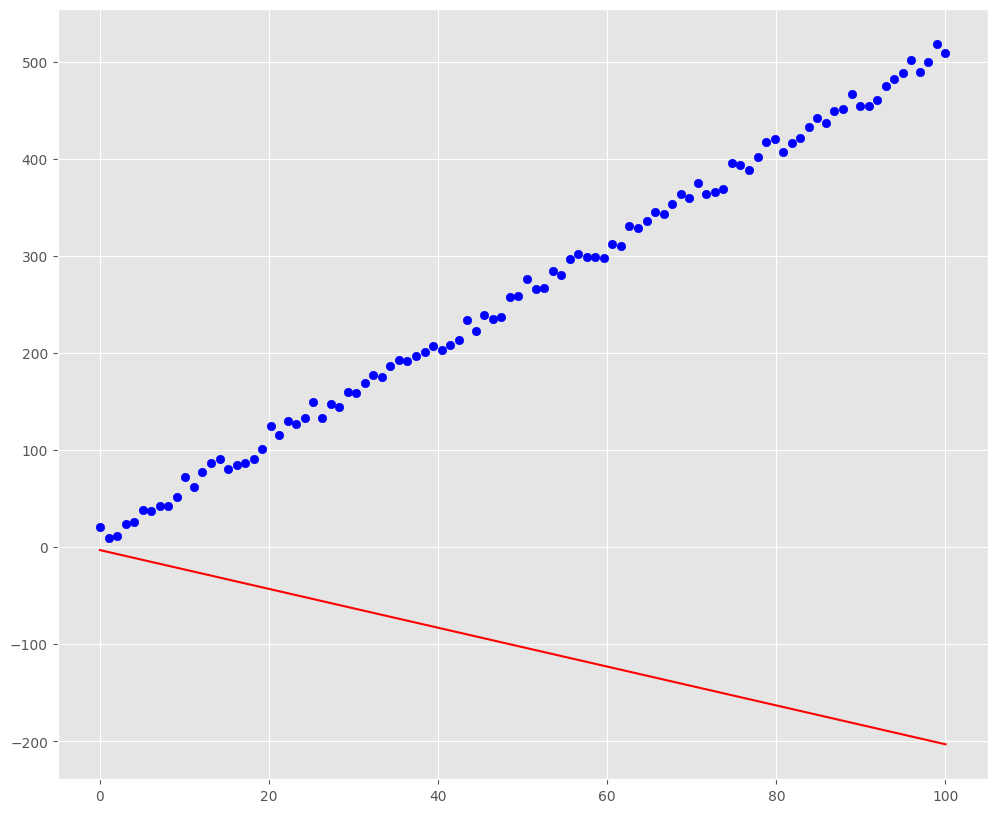

Average distance: 363.6700000000001



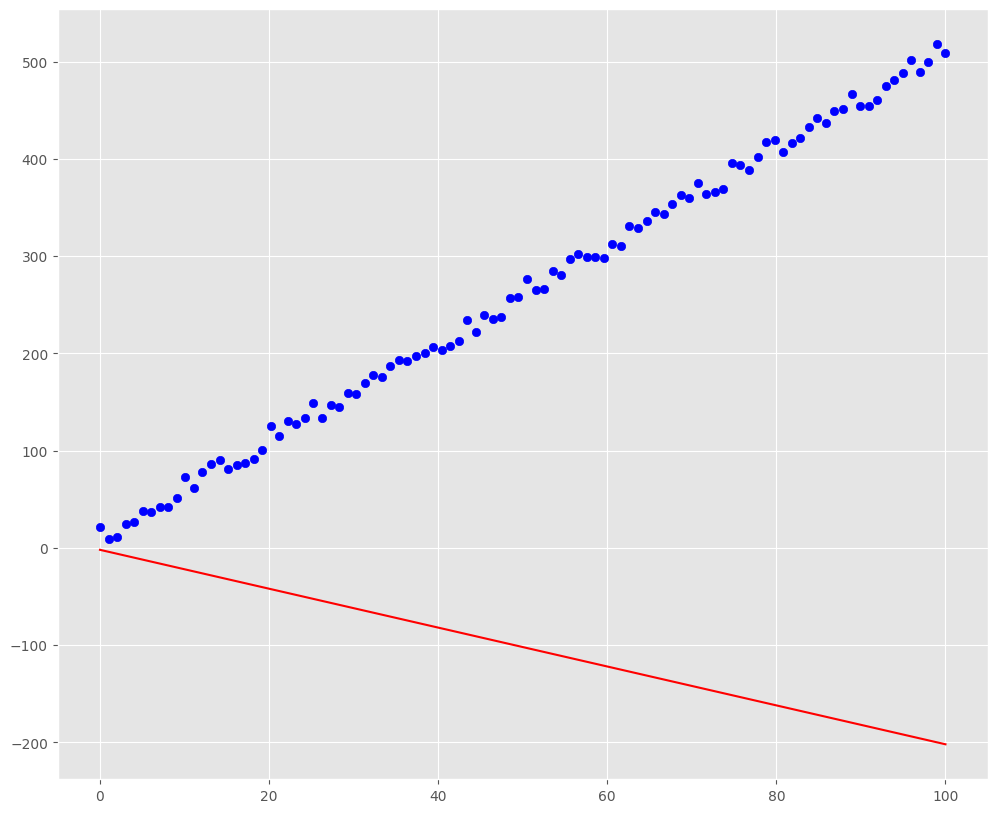

Average distance: 362.6700000000001



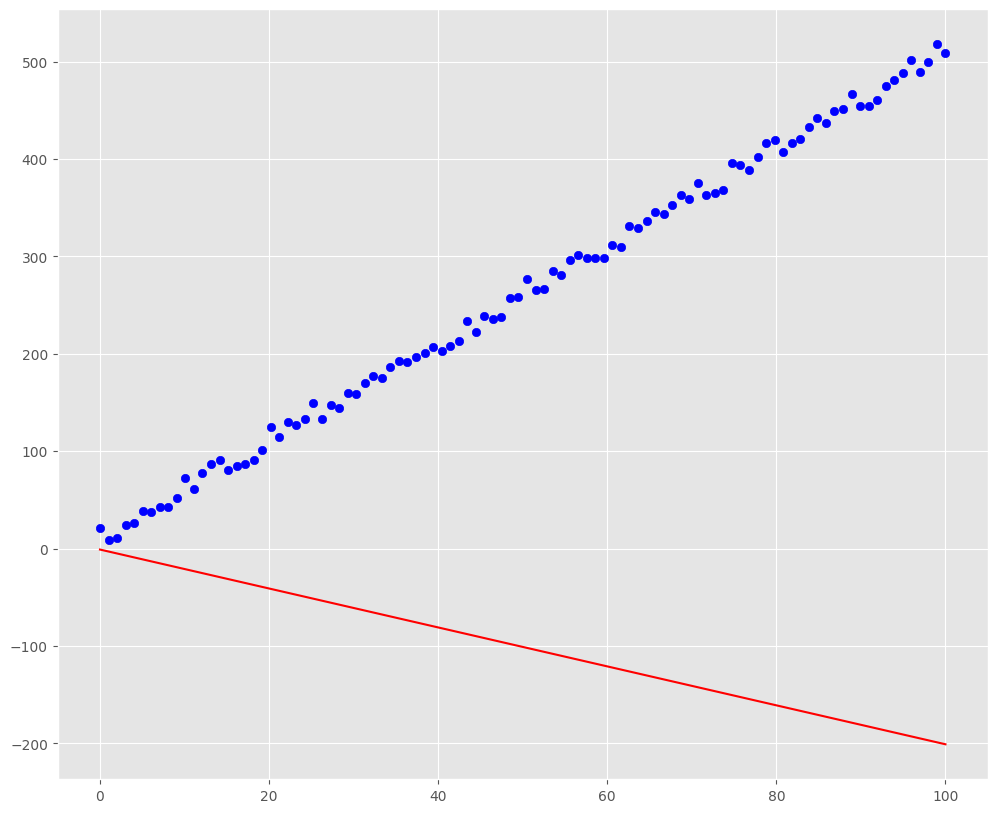

Average distance: 361.6700000000001



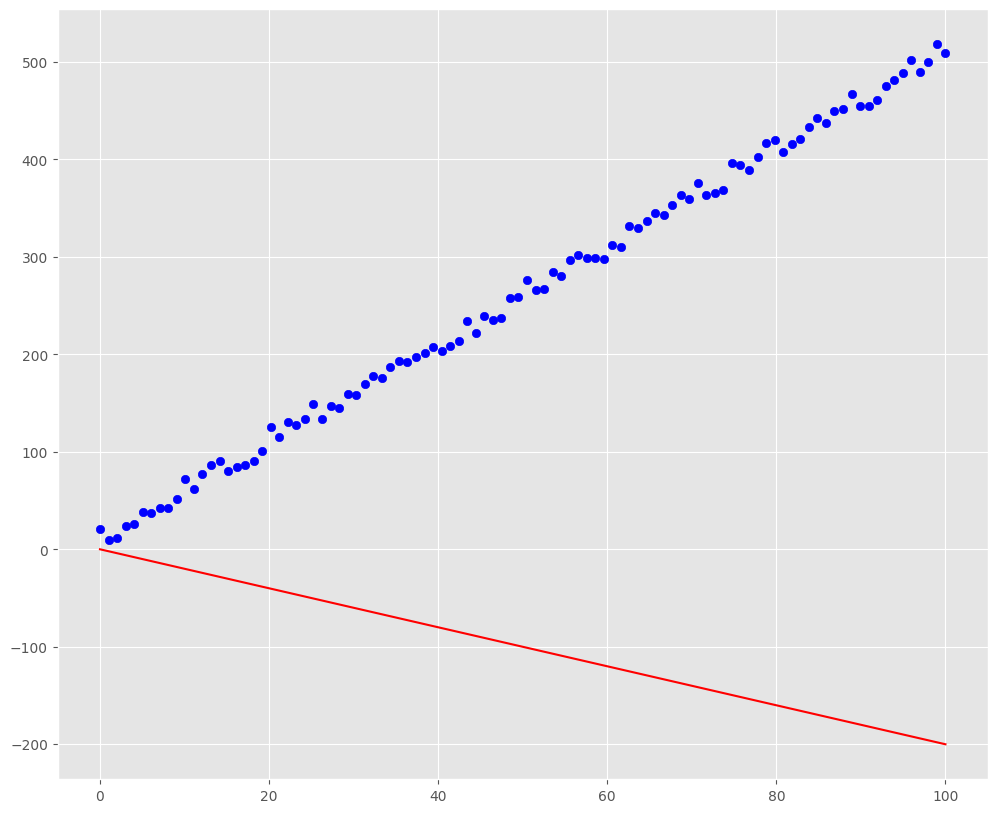

Average distance: 360.6700000000001



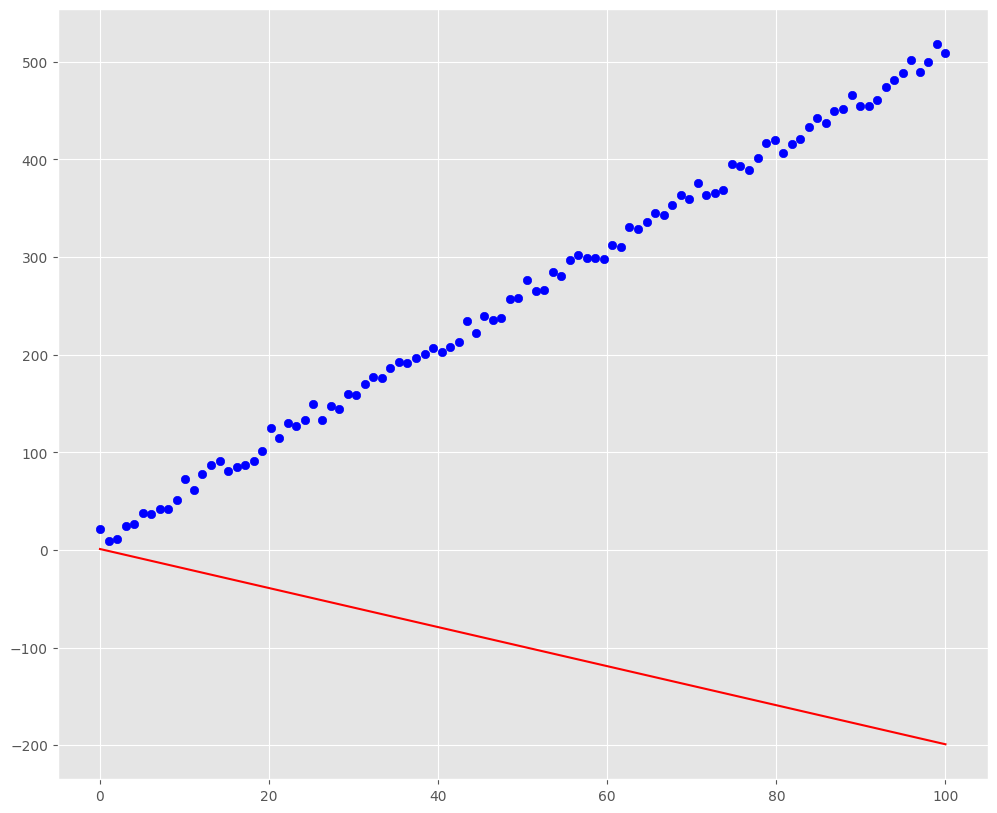

Average distance: 359.6700000000001



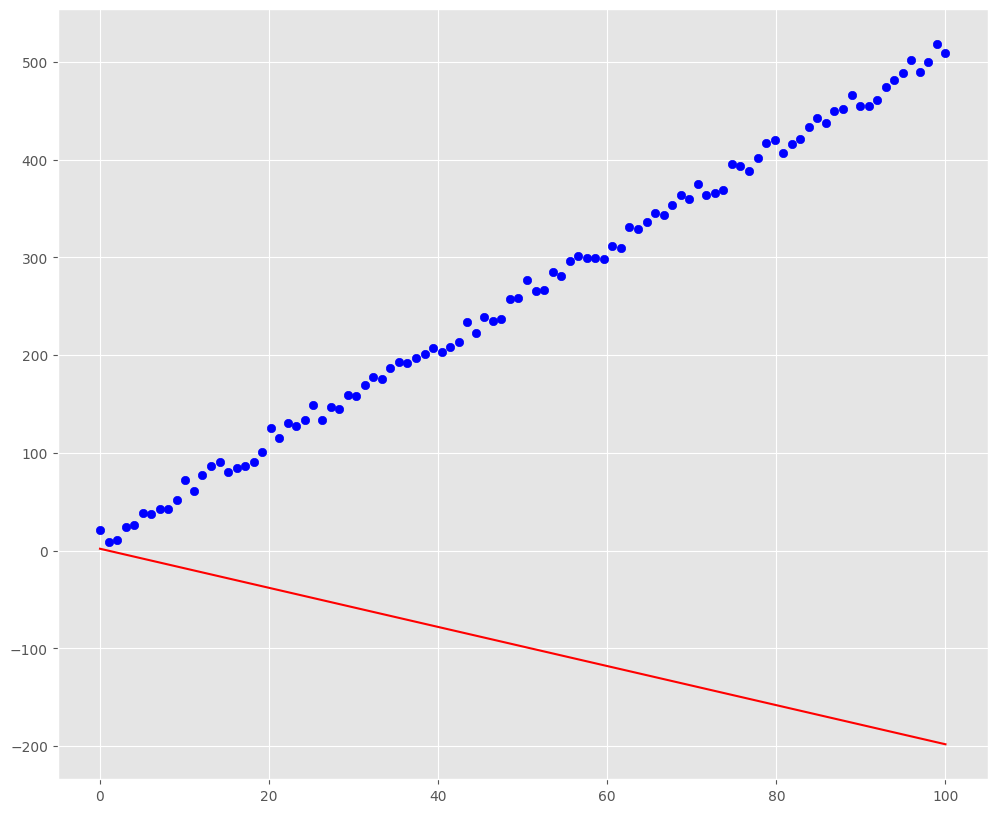

Average distance: 358.6700000000001



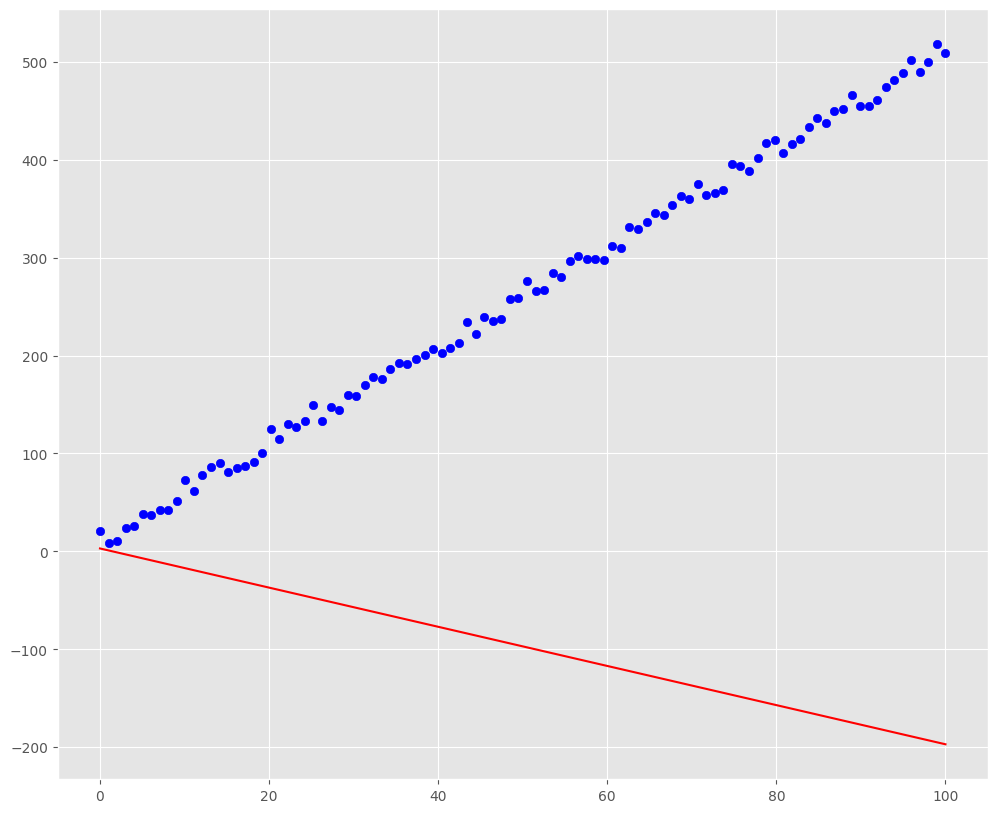

Average distance: 357.6700000000001



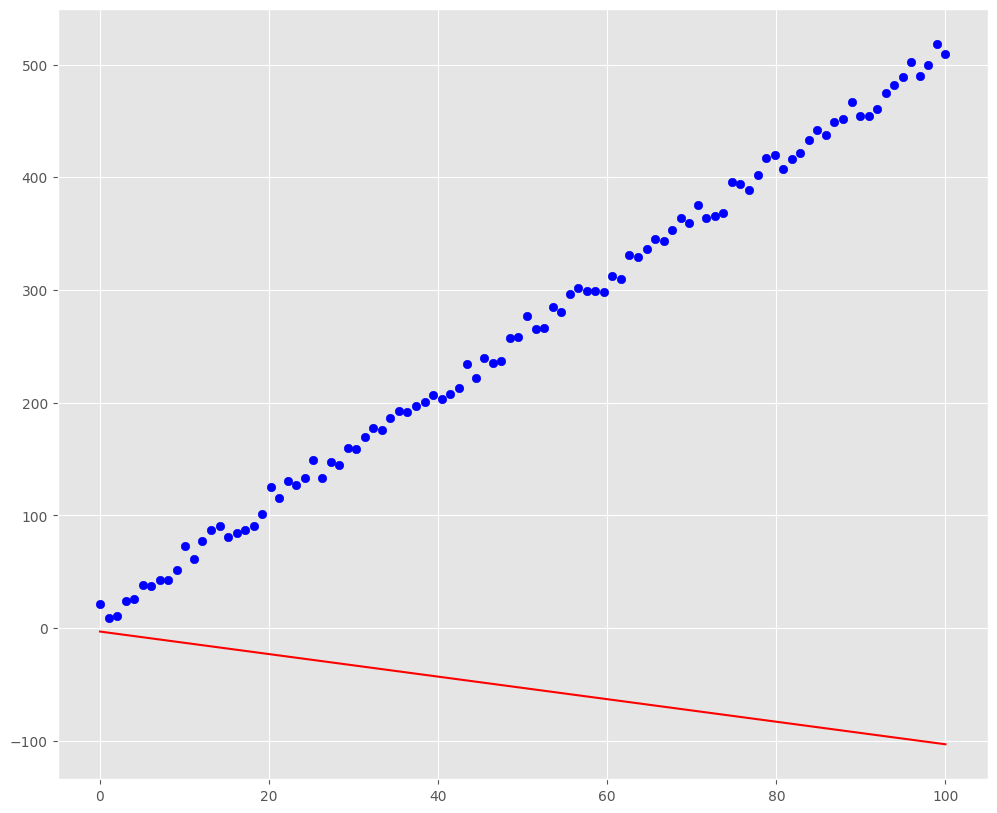

Average distance: 313.67



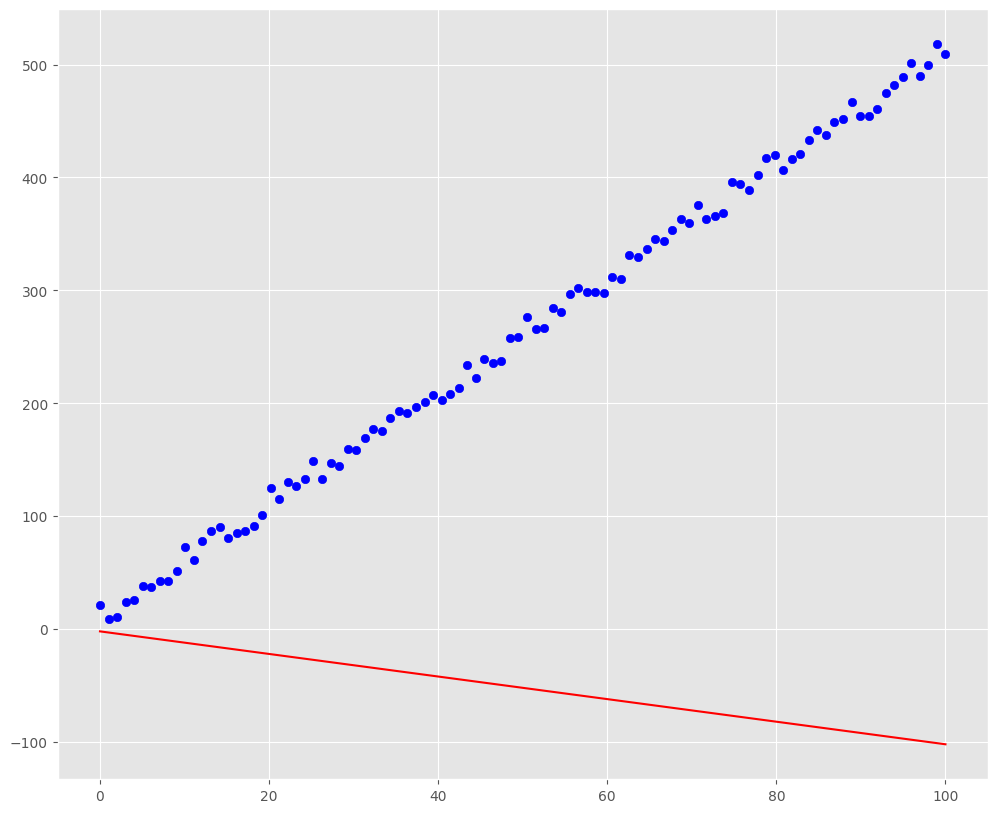

Average distance: 312.67



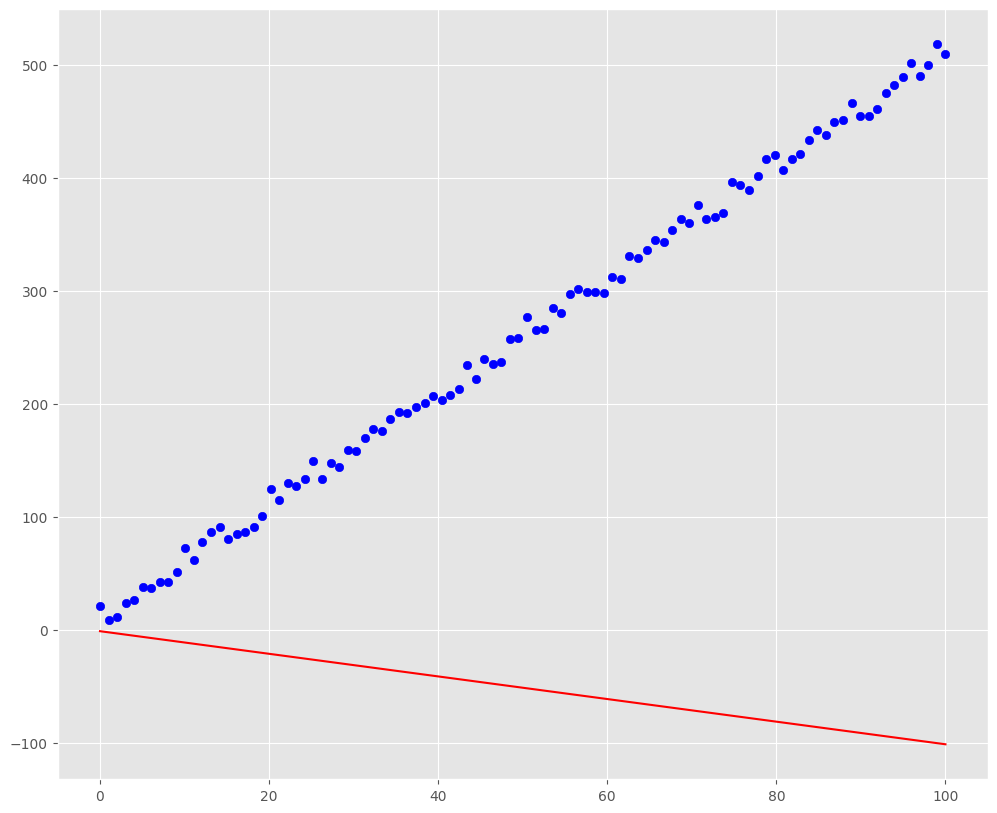

Average distance: 311.67



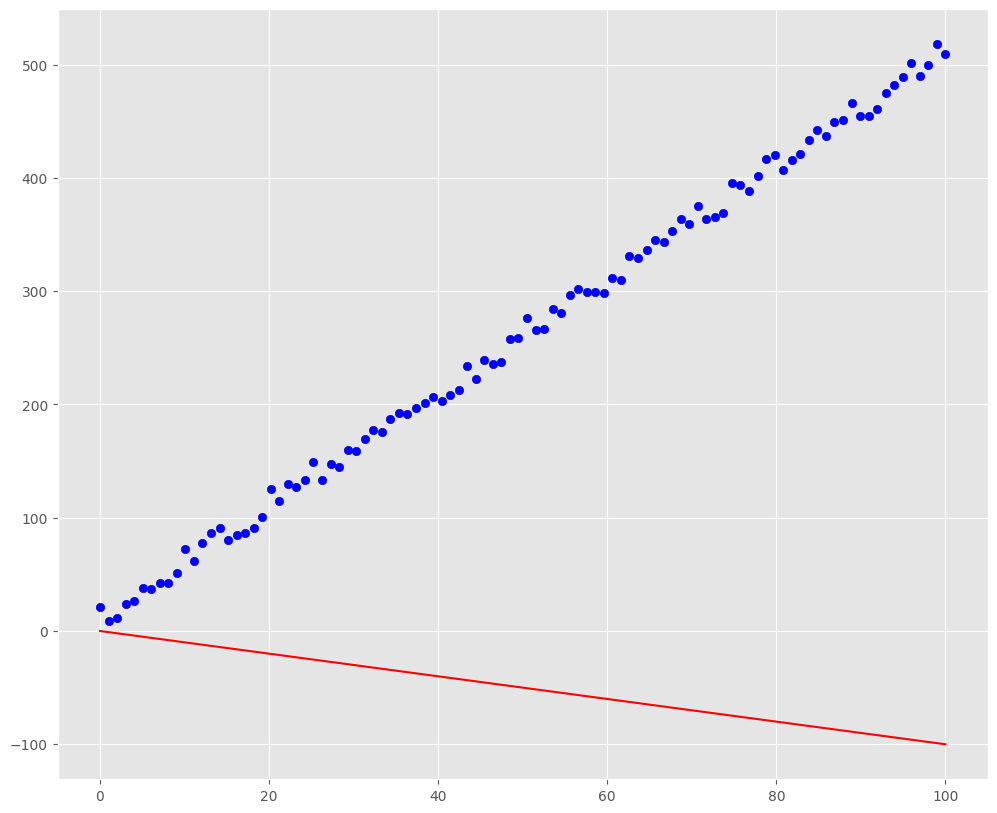

Average distance: 310.67



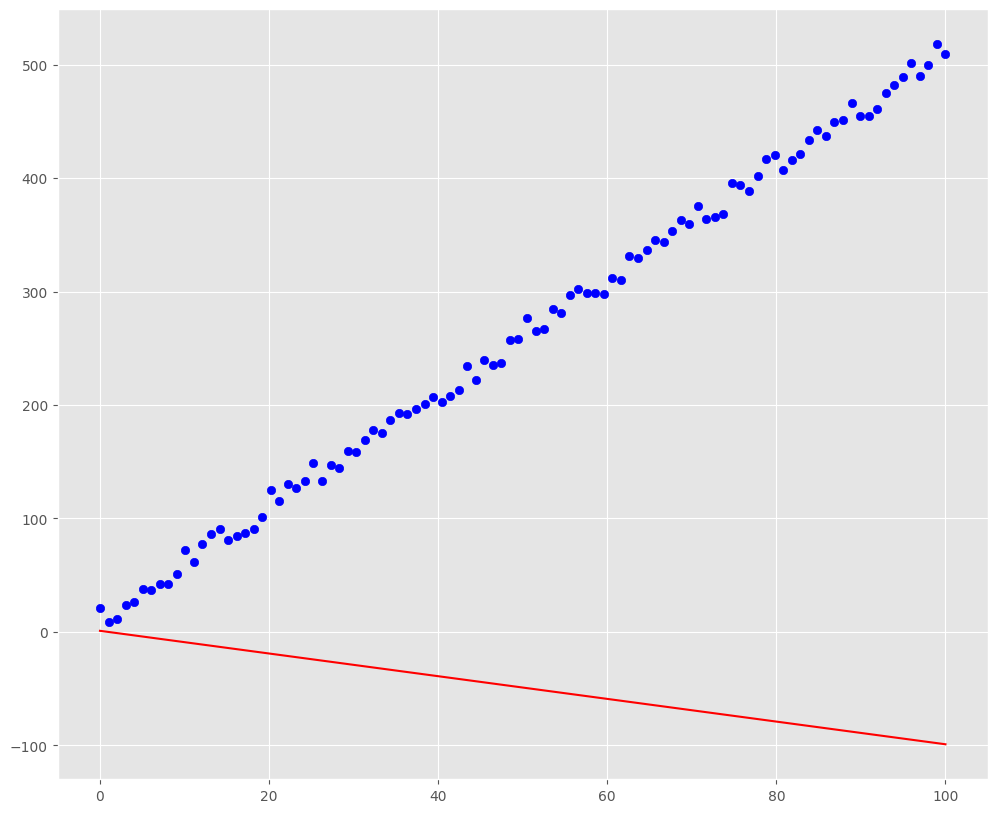

Average distance: 309.67



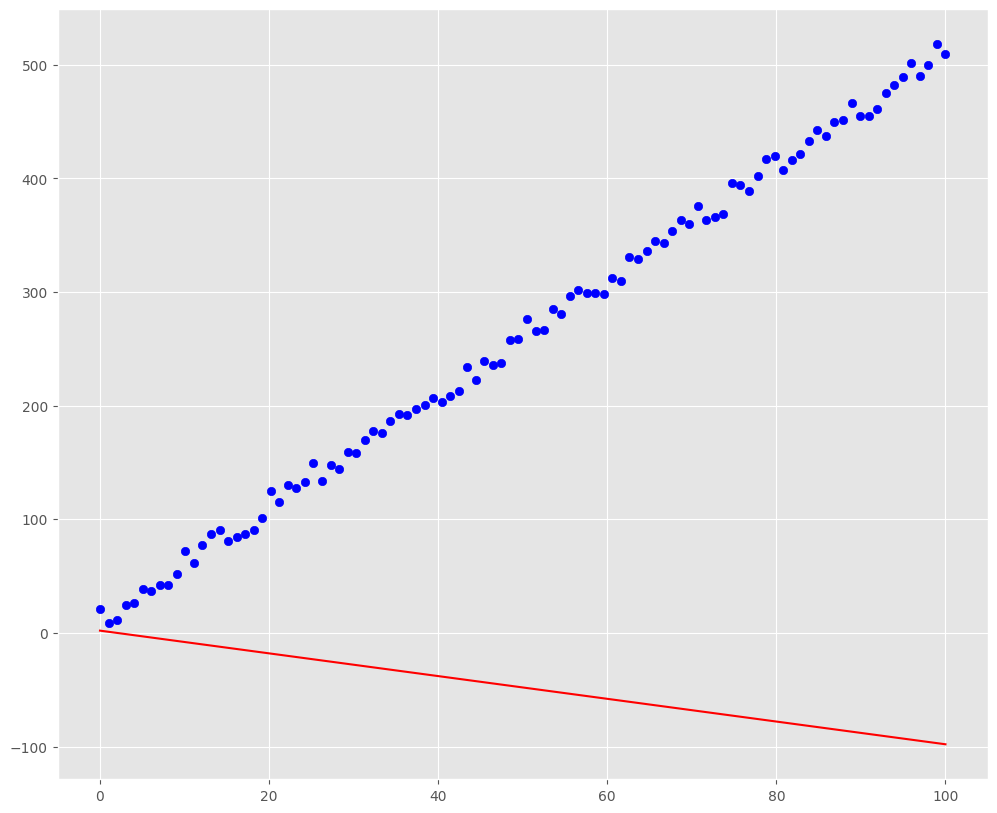

Average distance: 308.67



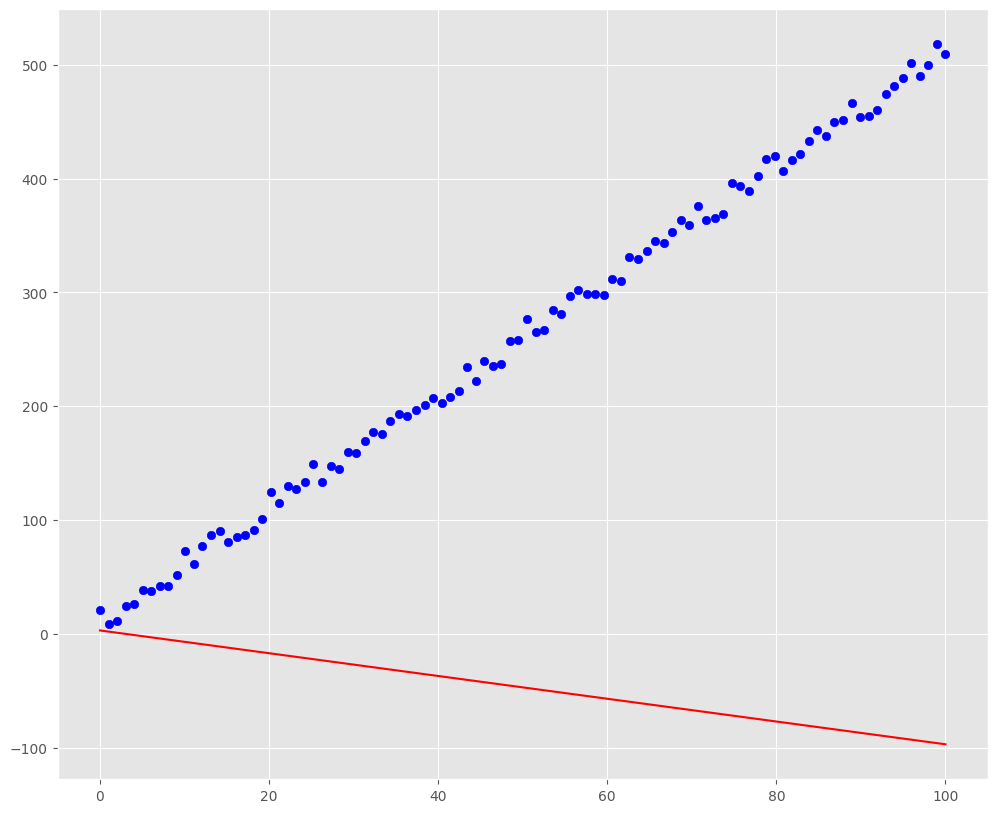

Average distance: 307.67



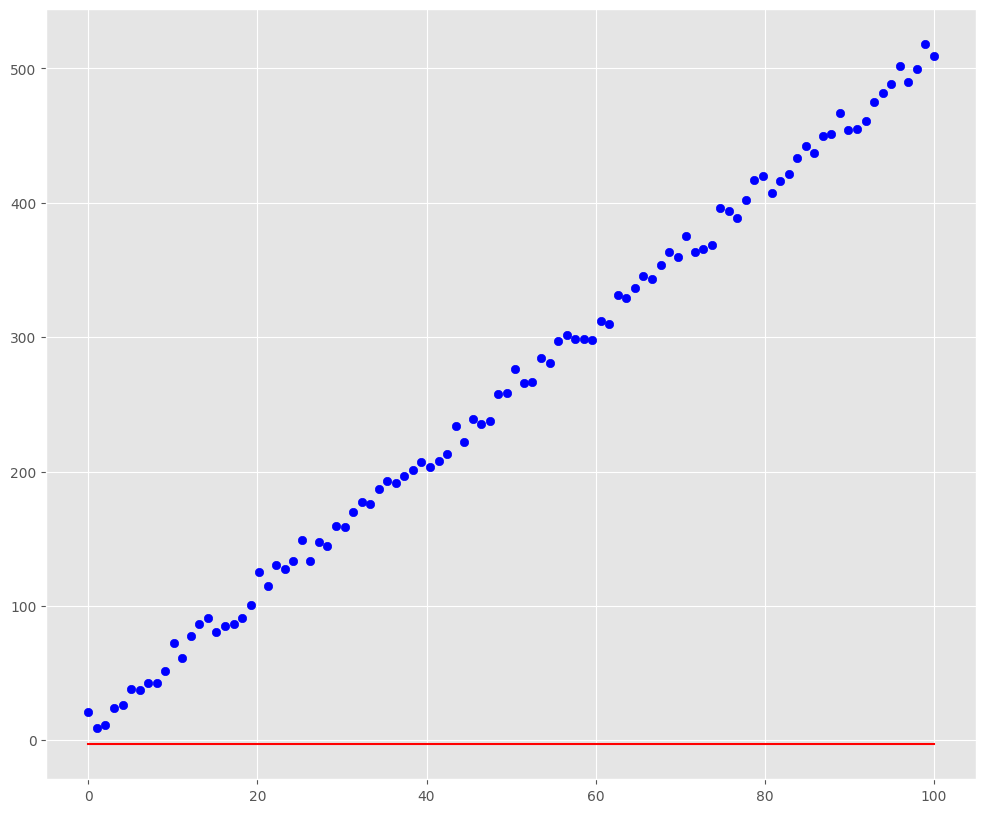

Average distance: 263.67



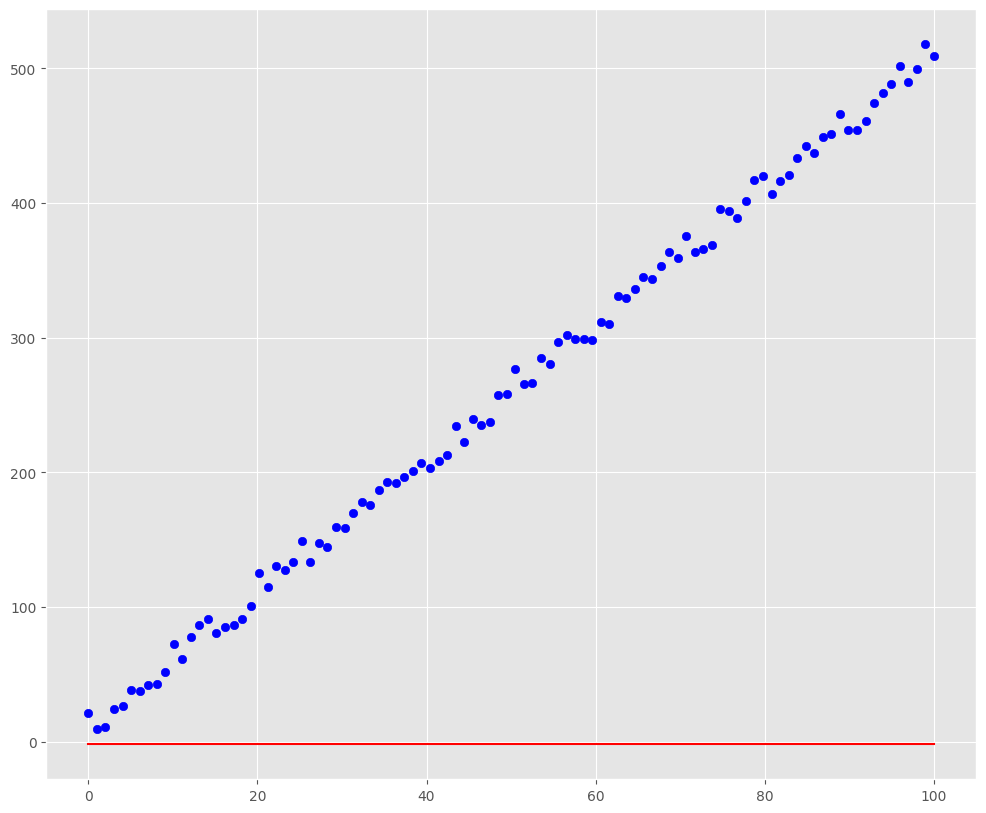

Average distance: 262.67



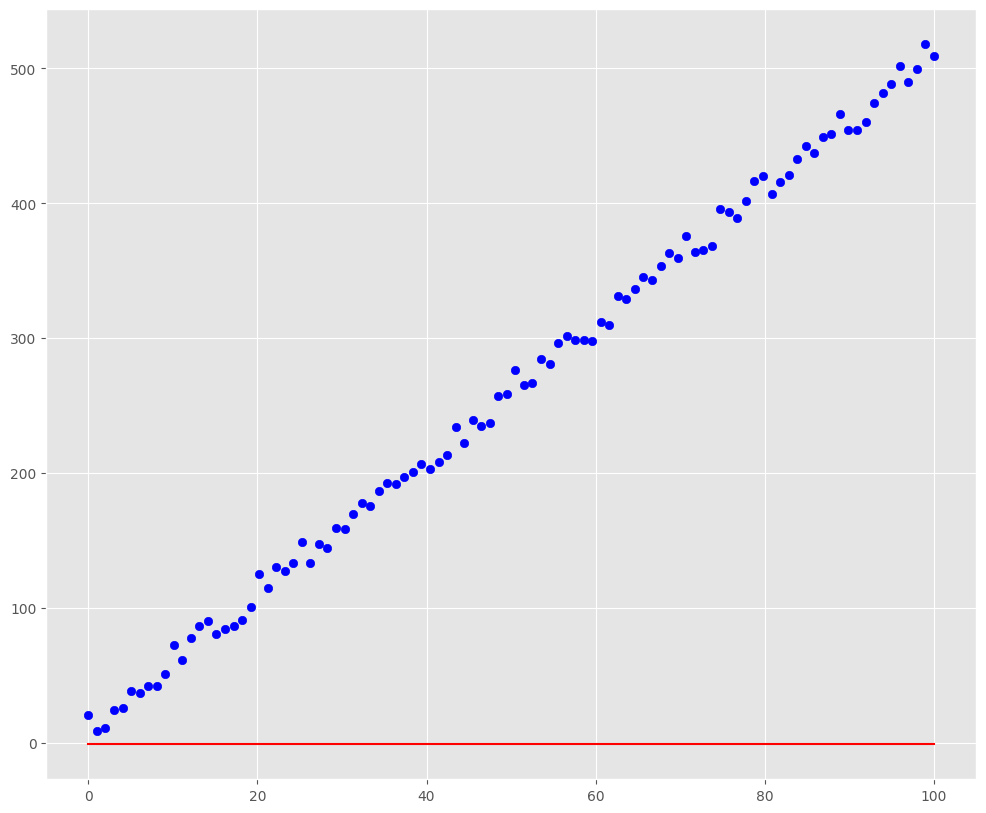

Average distance: 261.67



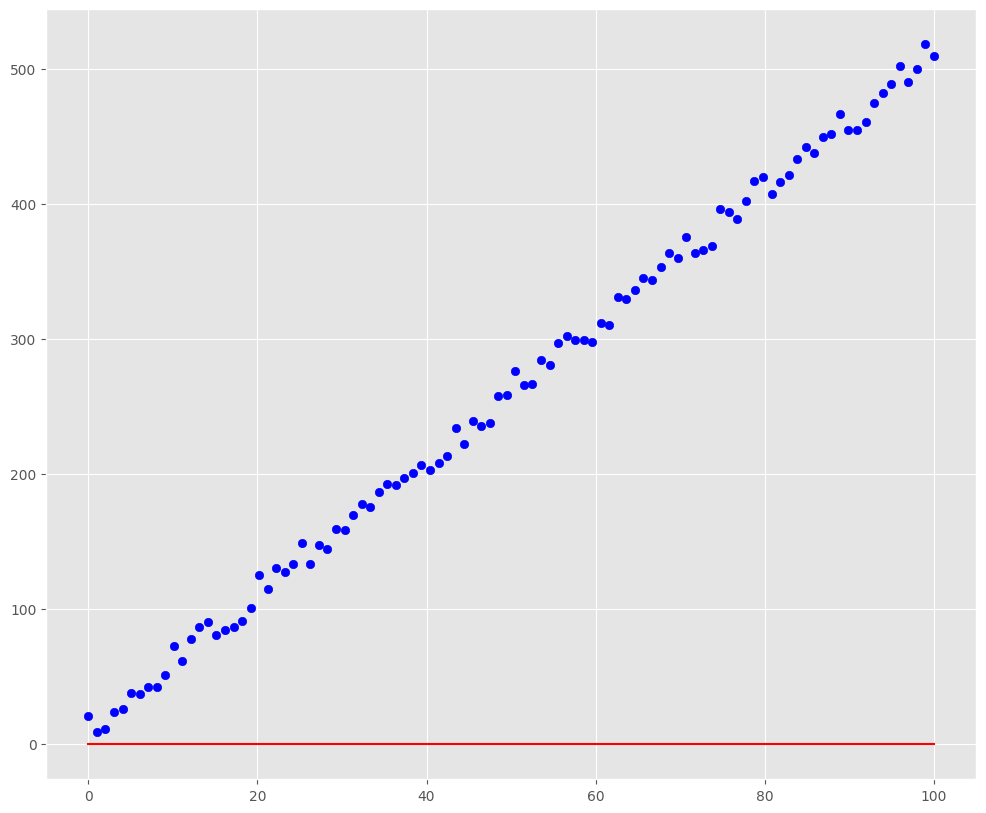

Average distance: 260.67



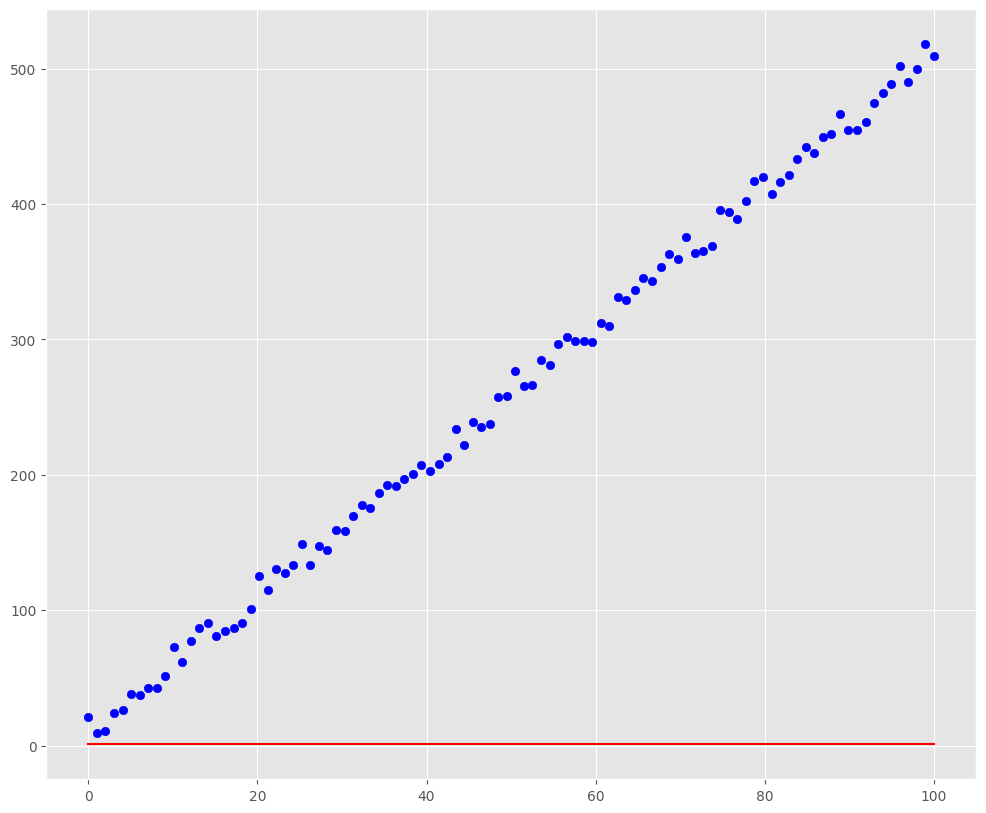

Average distance: 259.67



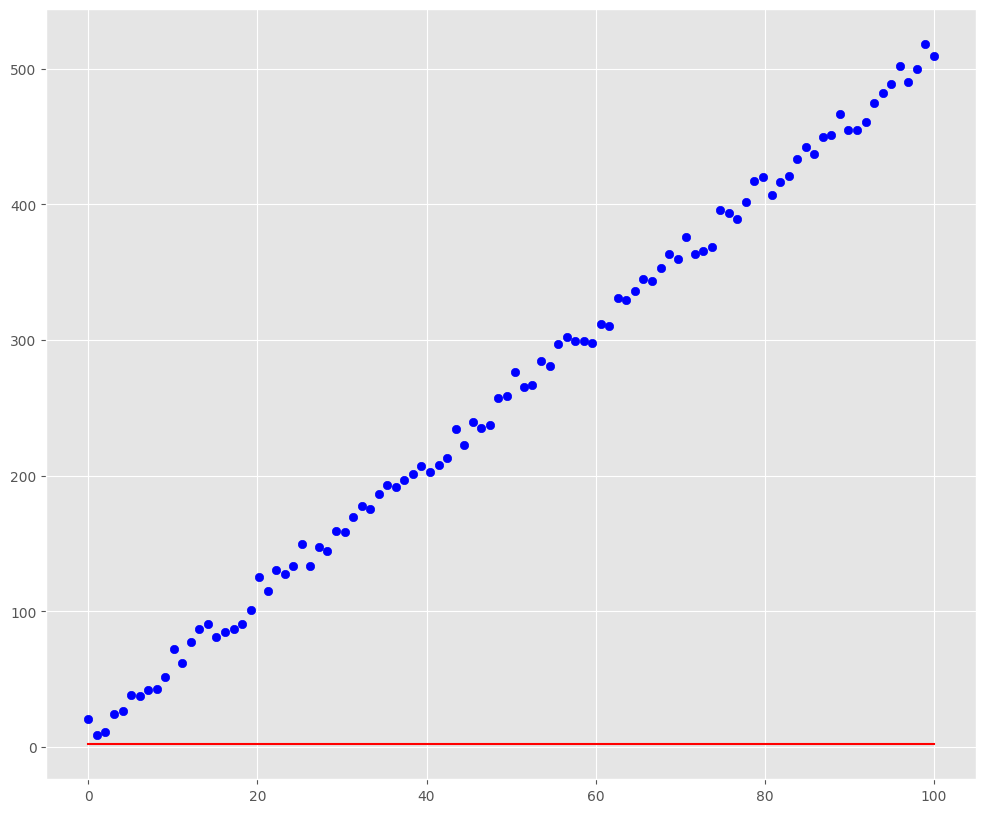

Average distance: 258.67



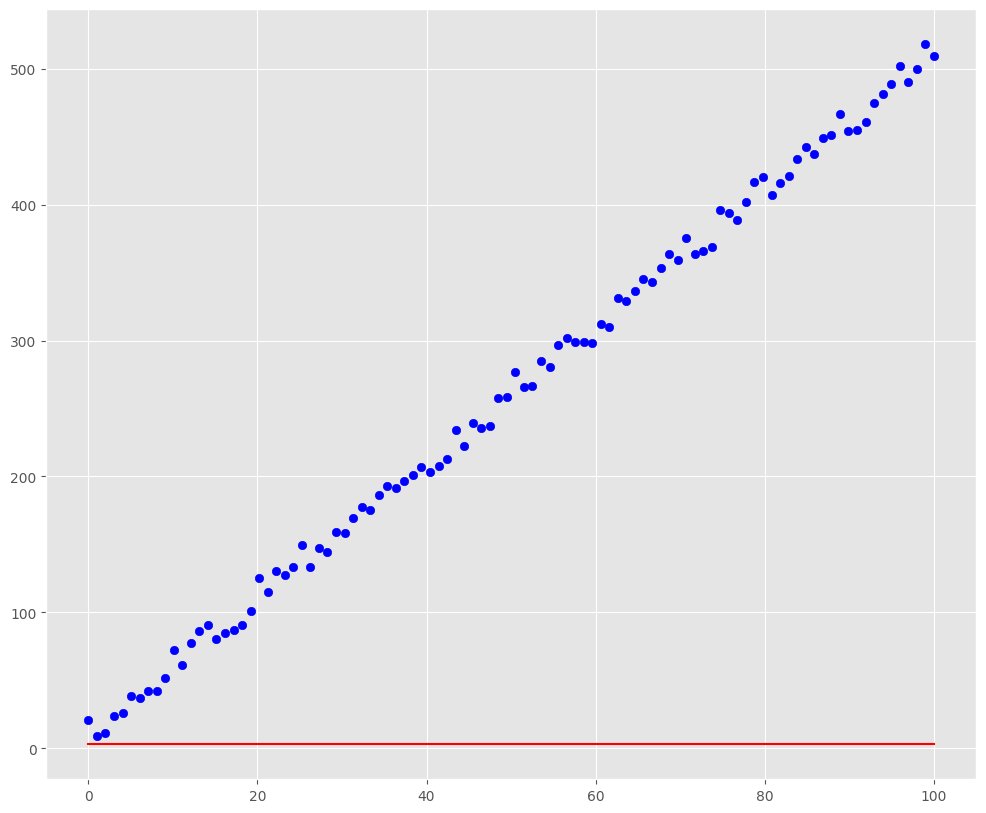

Average distance: 257.67



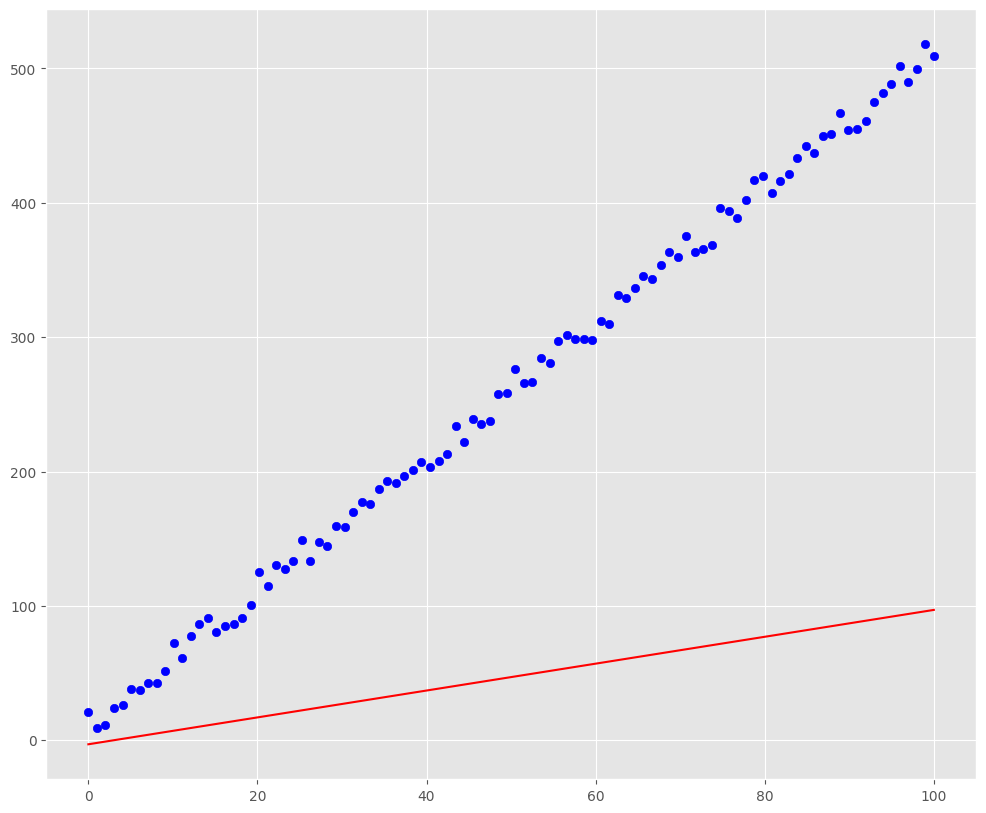

Average distance: 213.67000000000004



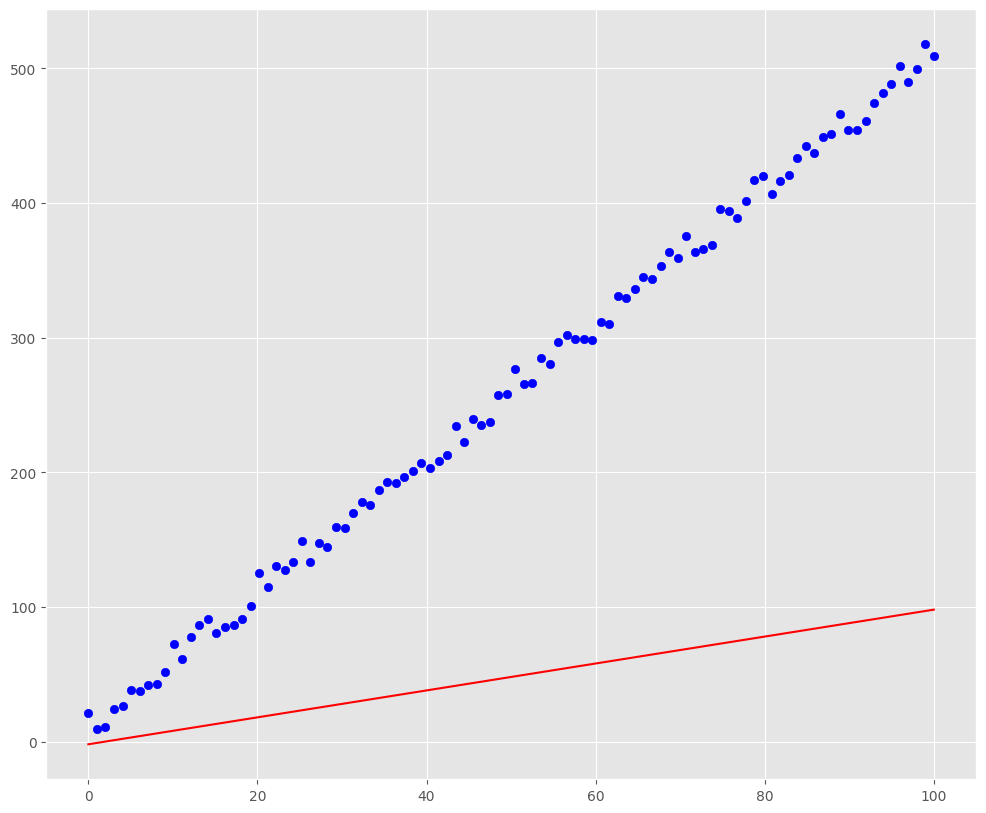

Average distance: 212.67000000000004



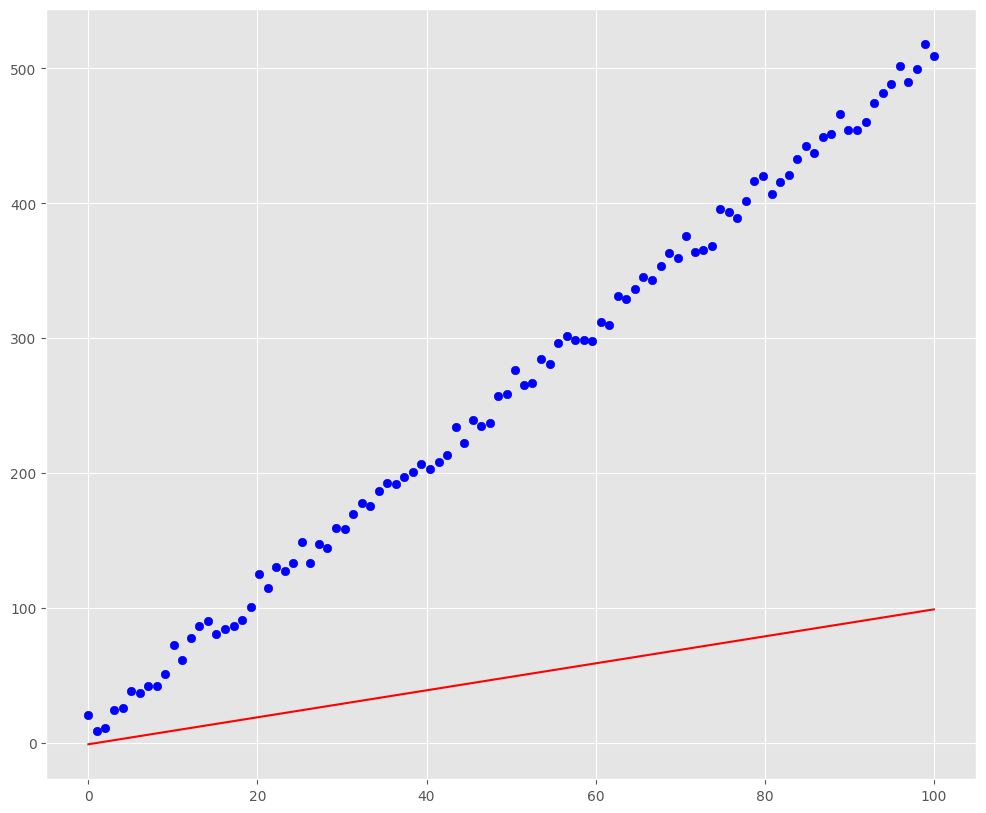

Average distance: 211.67000000000004



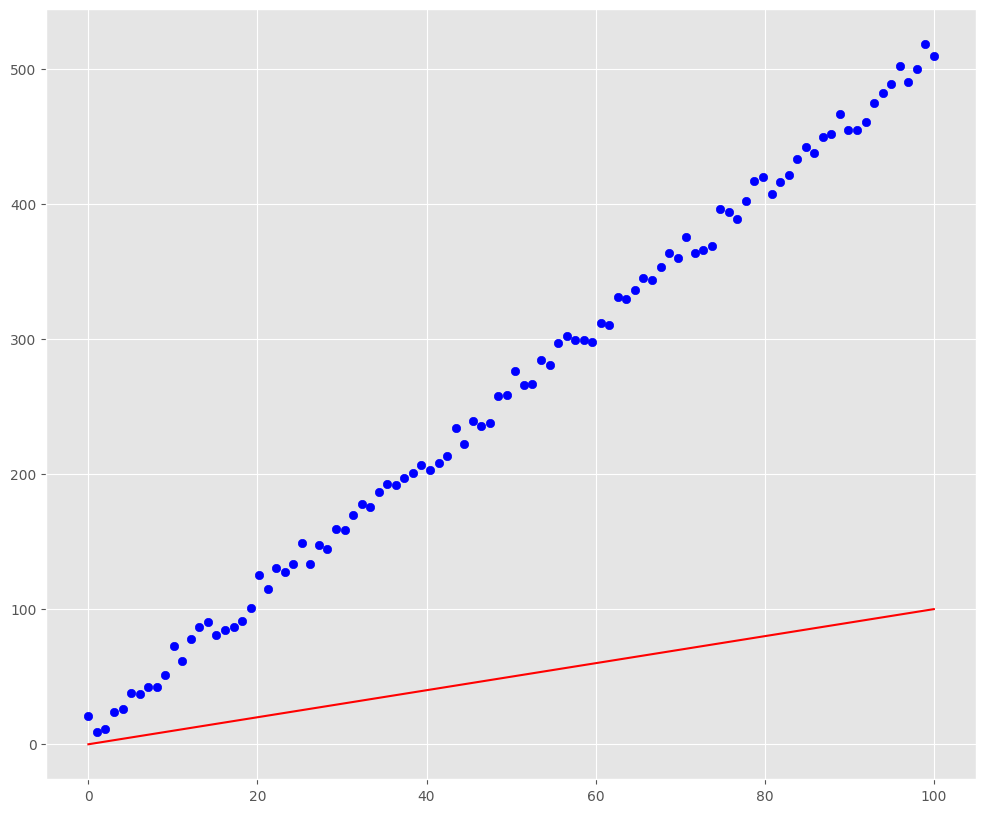

Average distance: 210.67000000000004



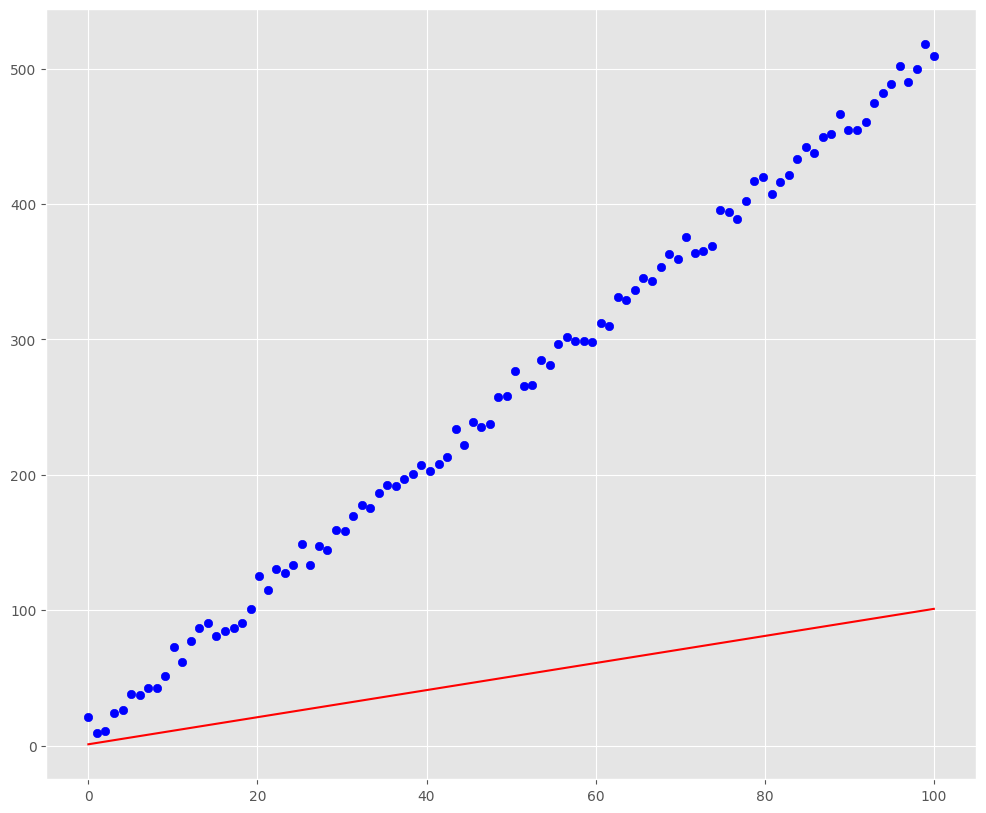

Average distance: 209.67000000000004



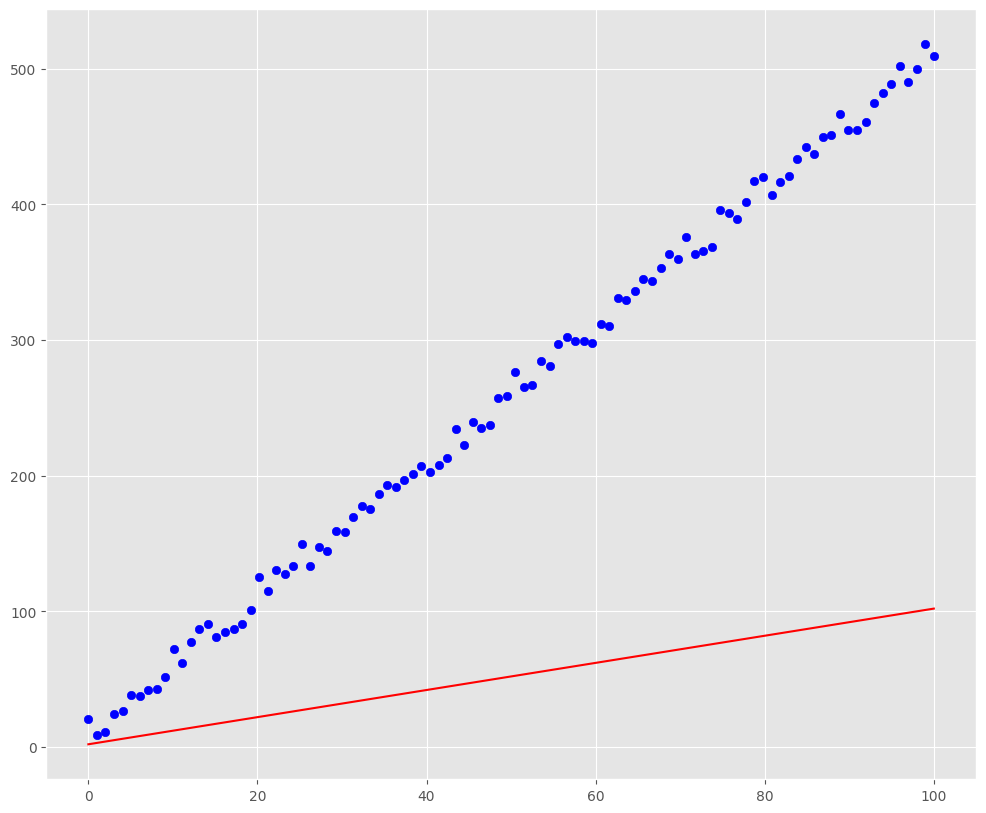

Average distance: 208.67000000000004



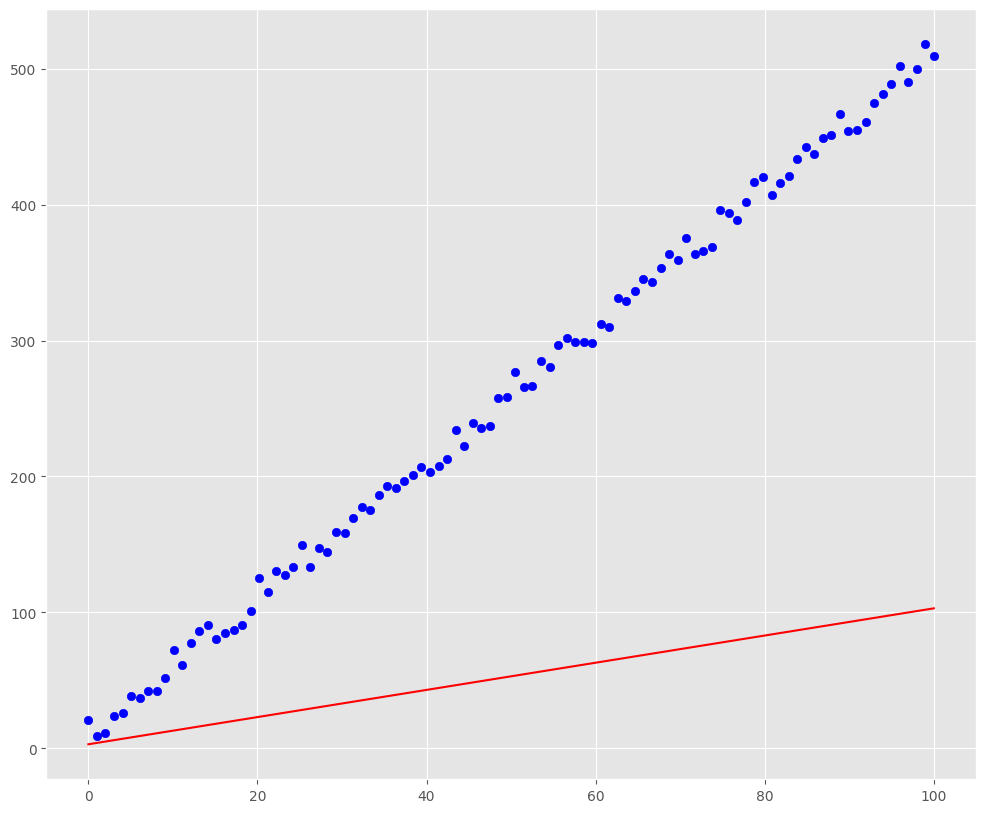

Average distance: 207.67000000000004



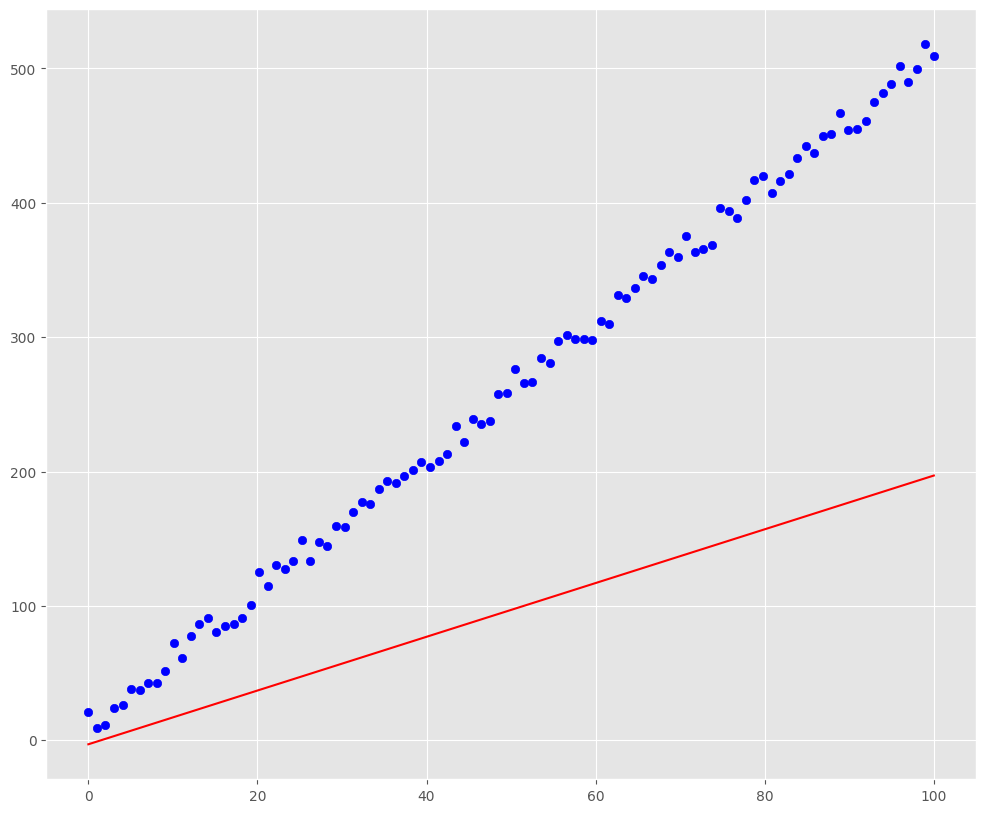

Average distance: 163.67



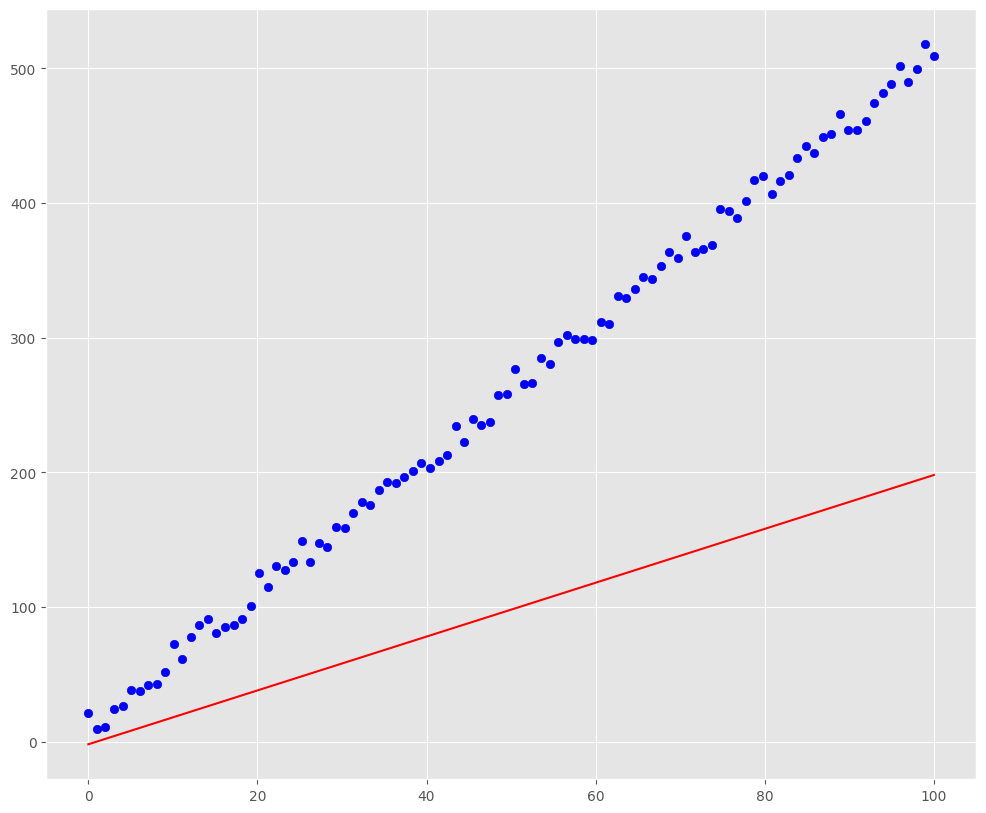

Average distance: 162.67



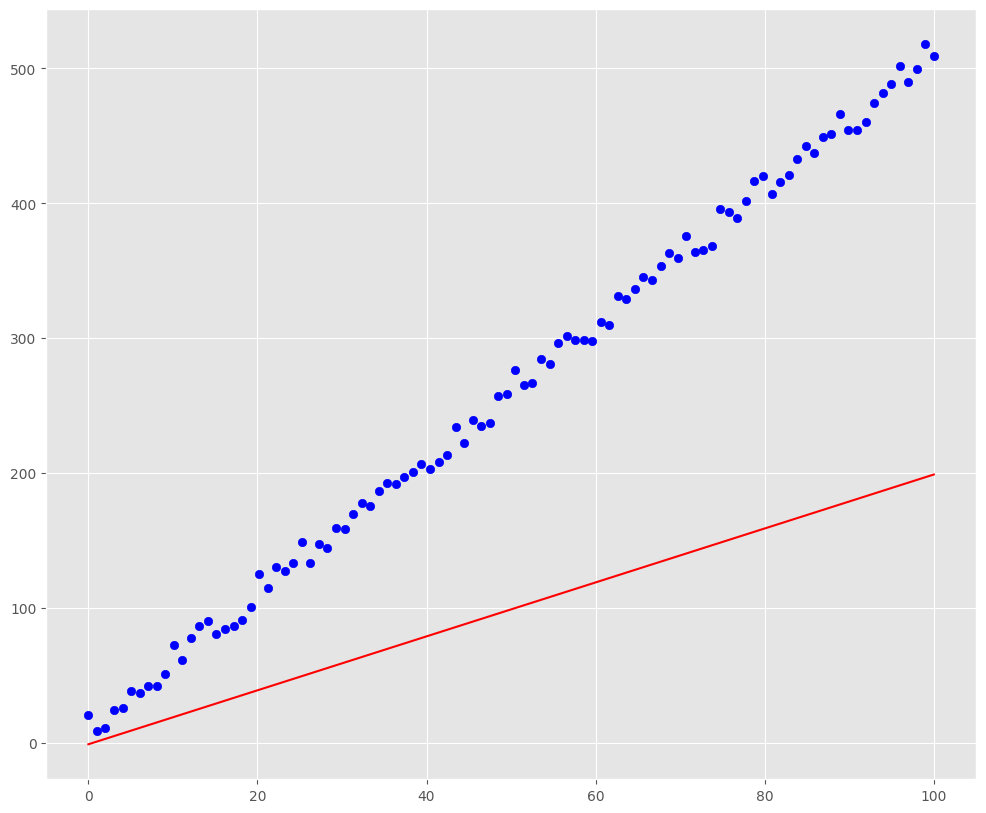

Average distance: 161.67



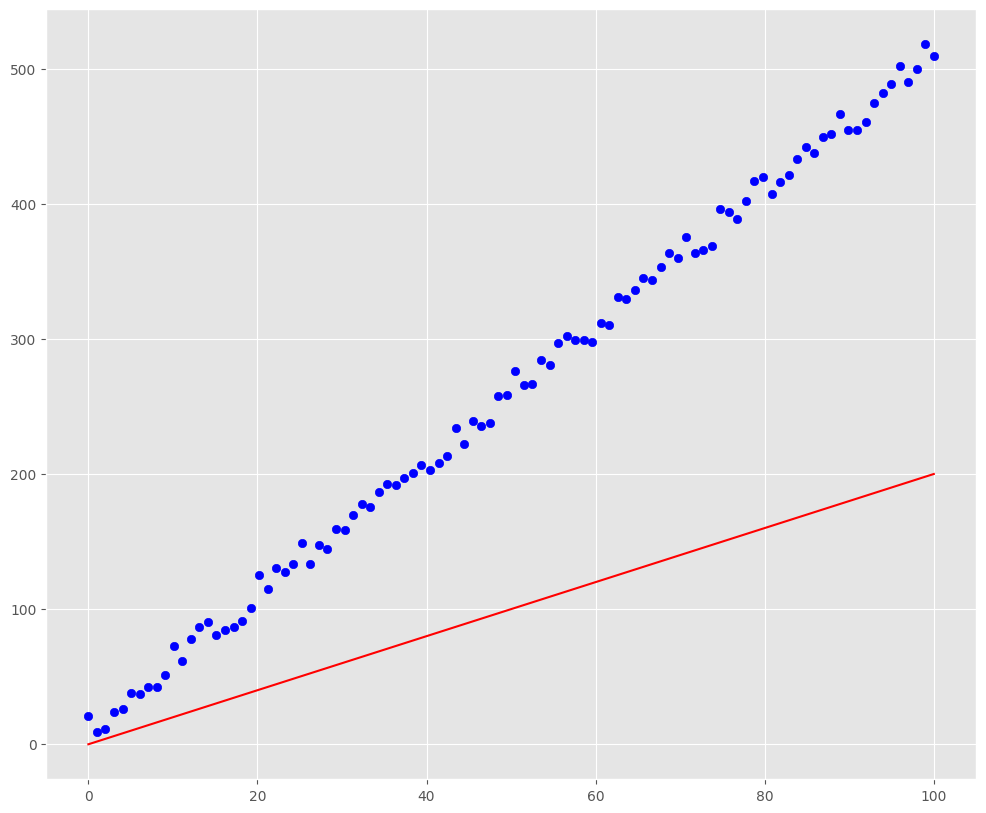

Average distance: 160.67



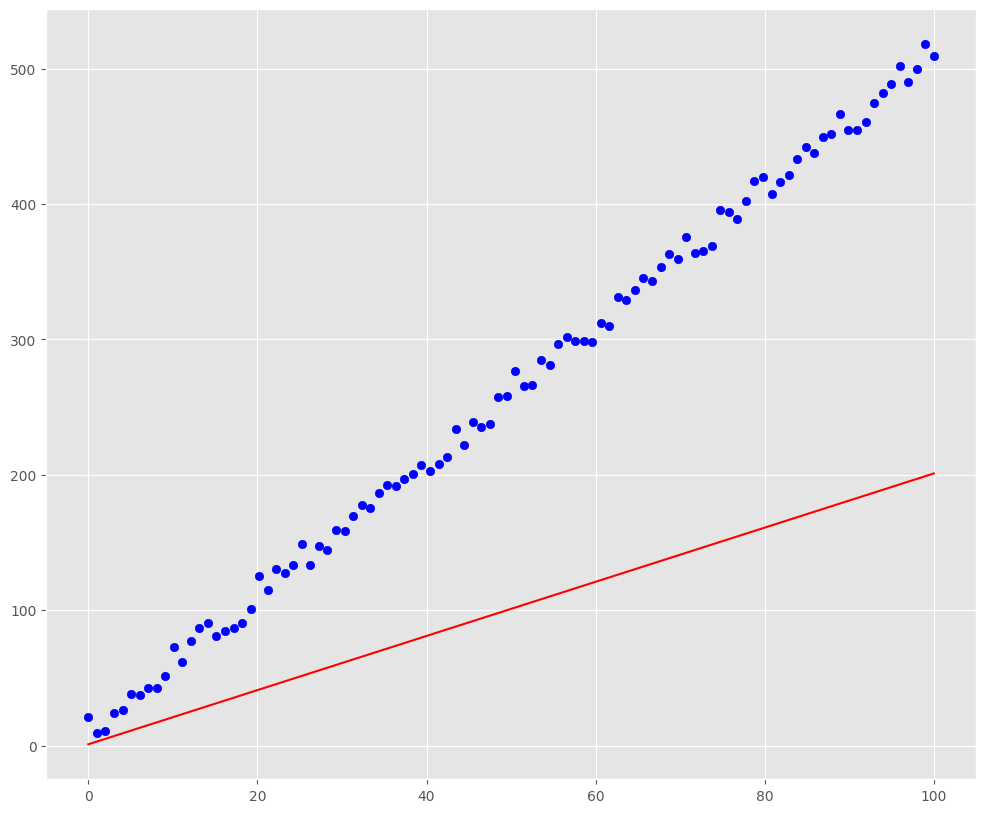

Average distance: 159.67



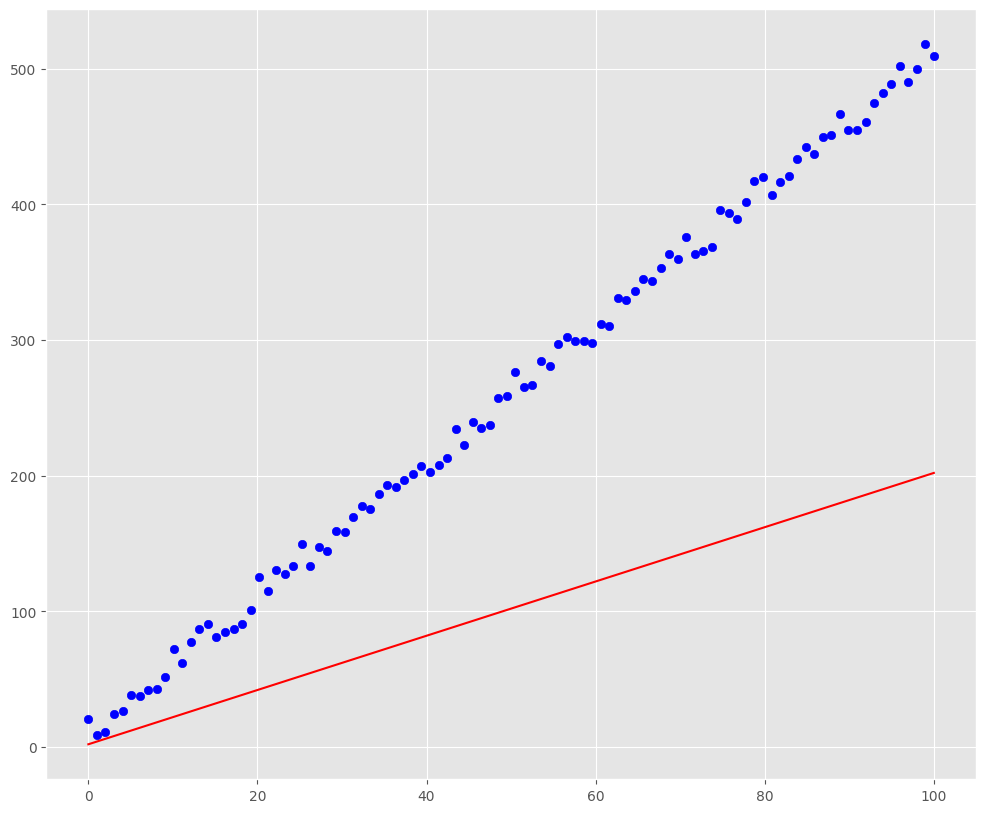

Average distance: 158.67



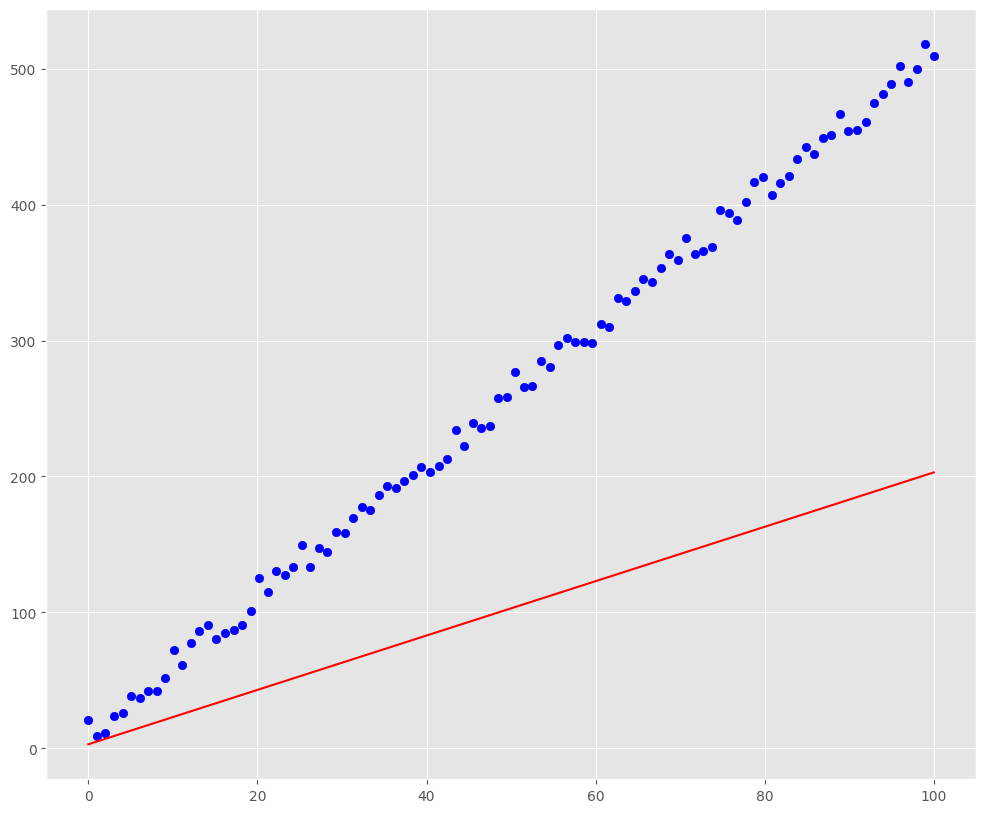

Average distance: 157.67



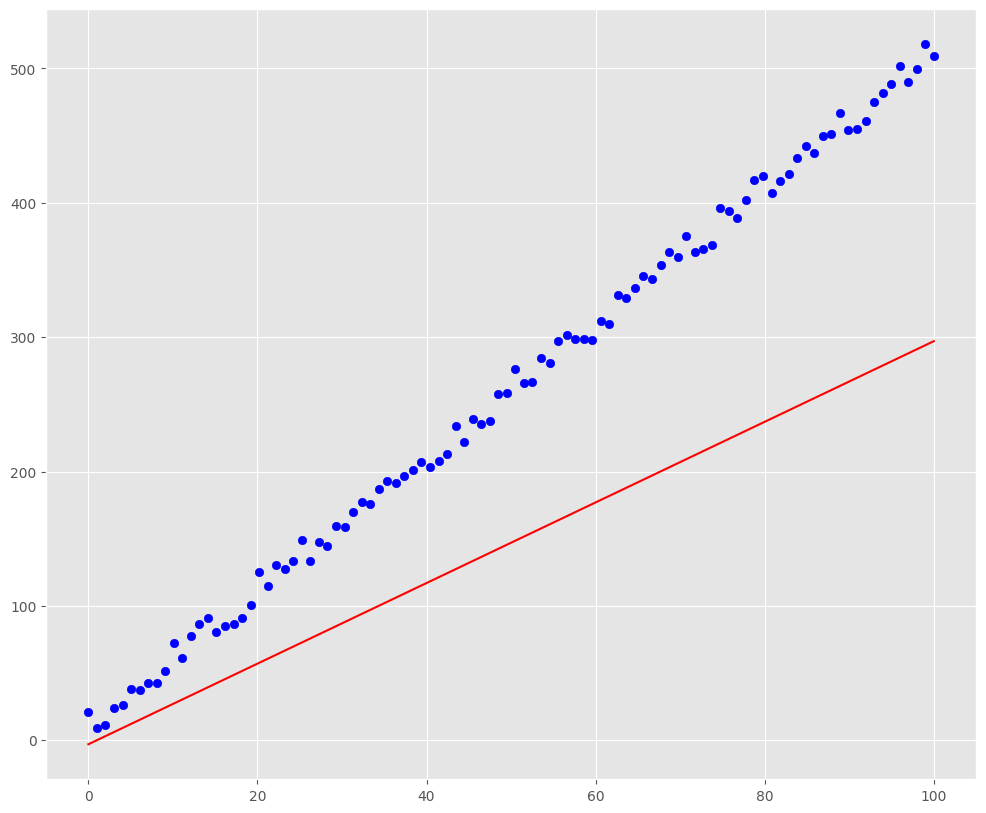

Average distance: 113.67000000000002



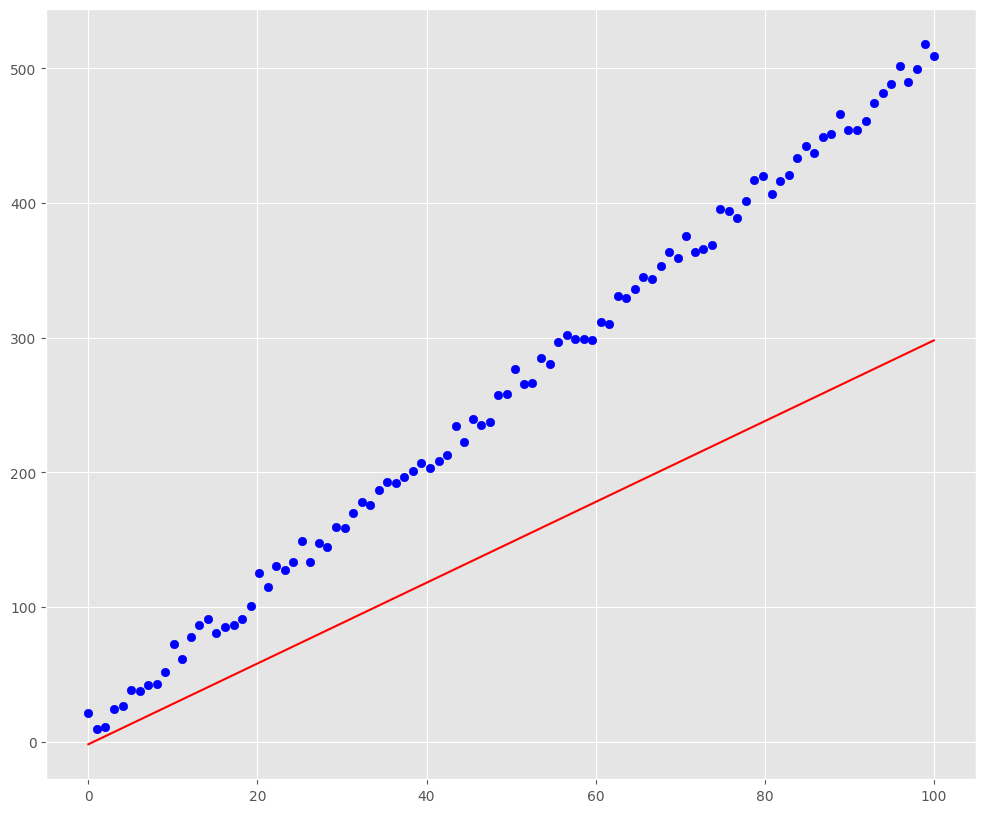

Average distance: 112.67000000000002



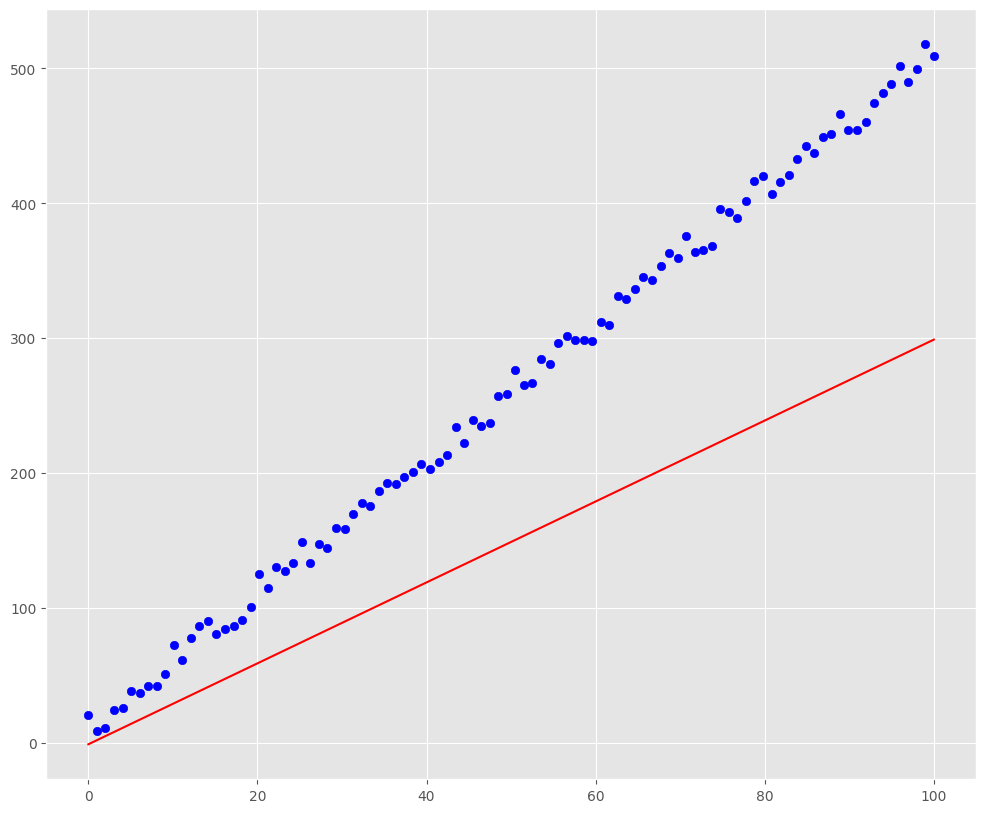

Average distance: 111.67000000000002



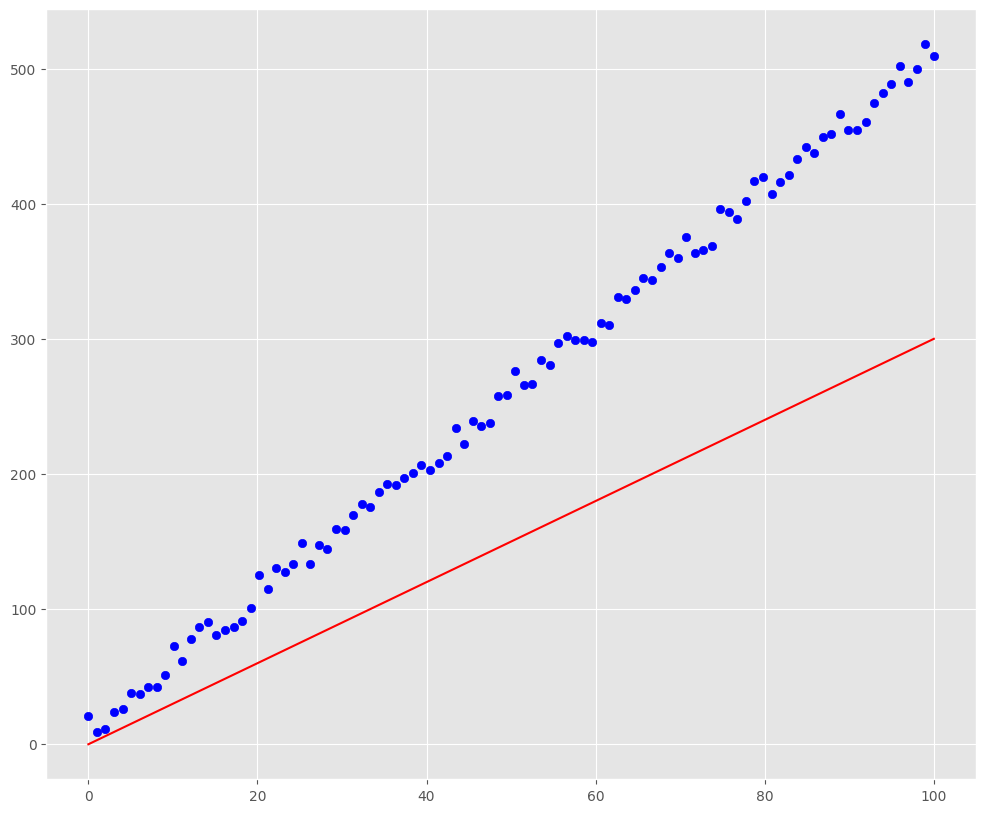

Average distance: 110.67000000000002



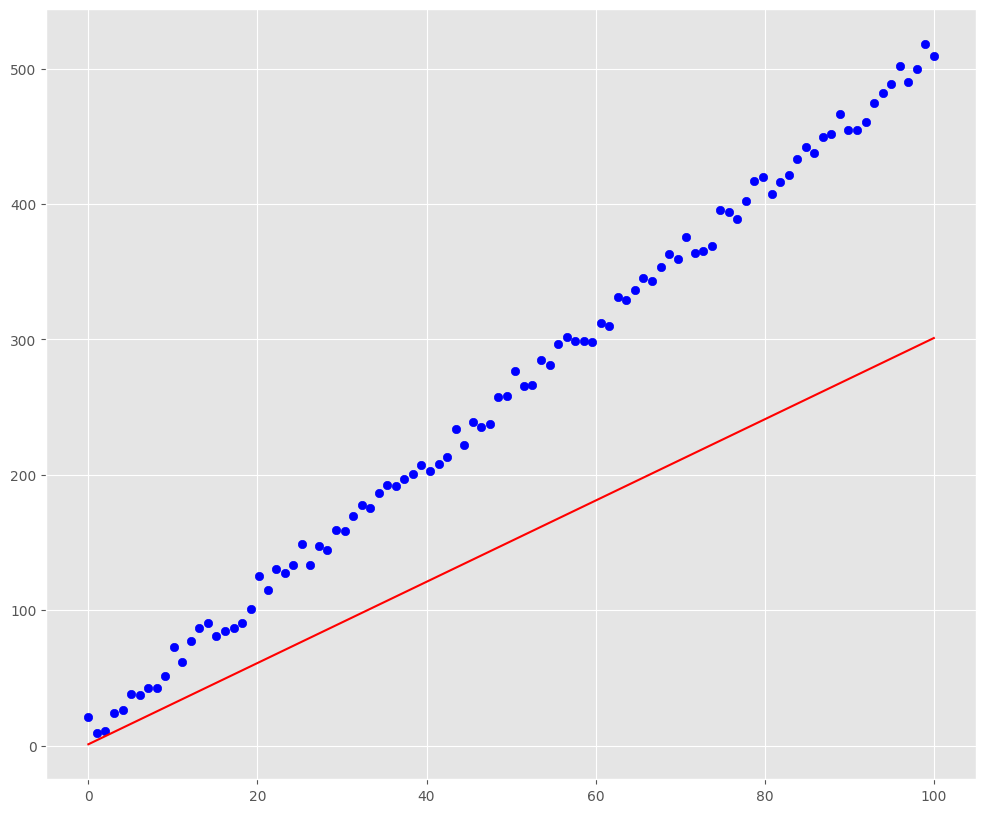

Average distance: 109.67000000000002



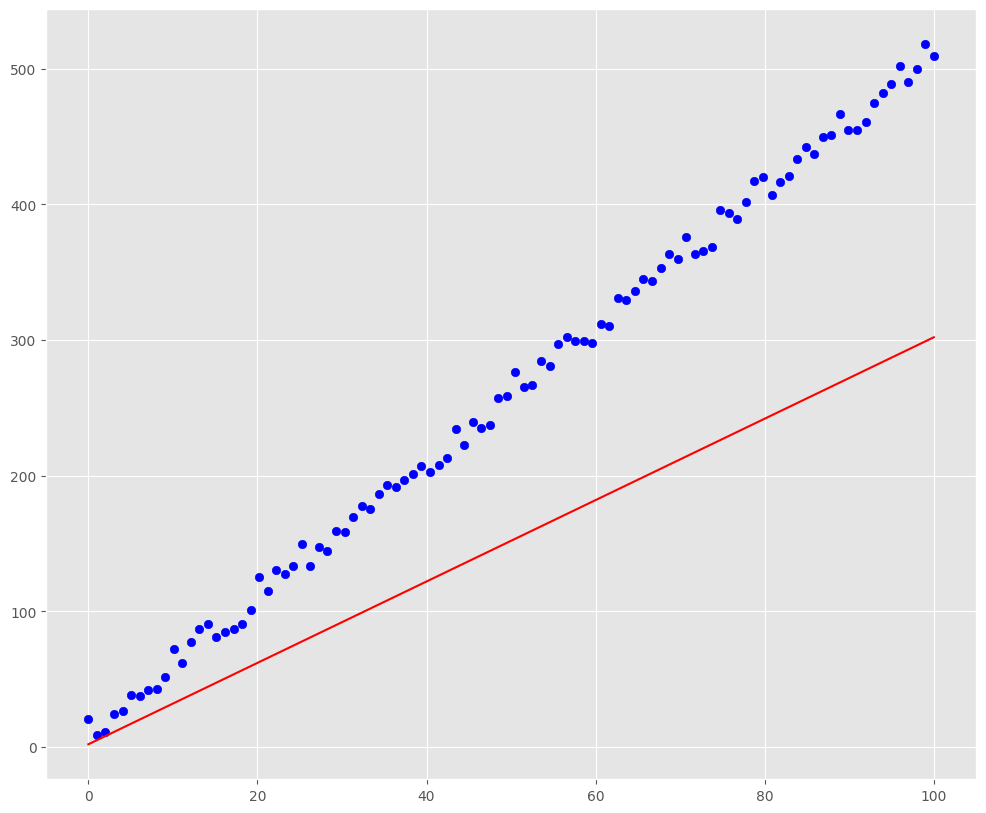

Average distance: 108.67000000000002



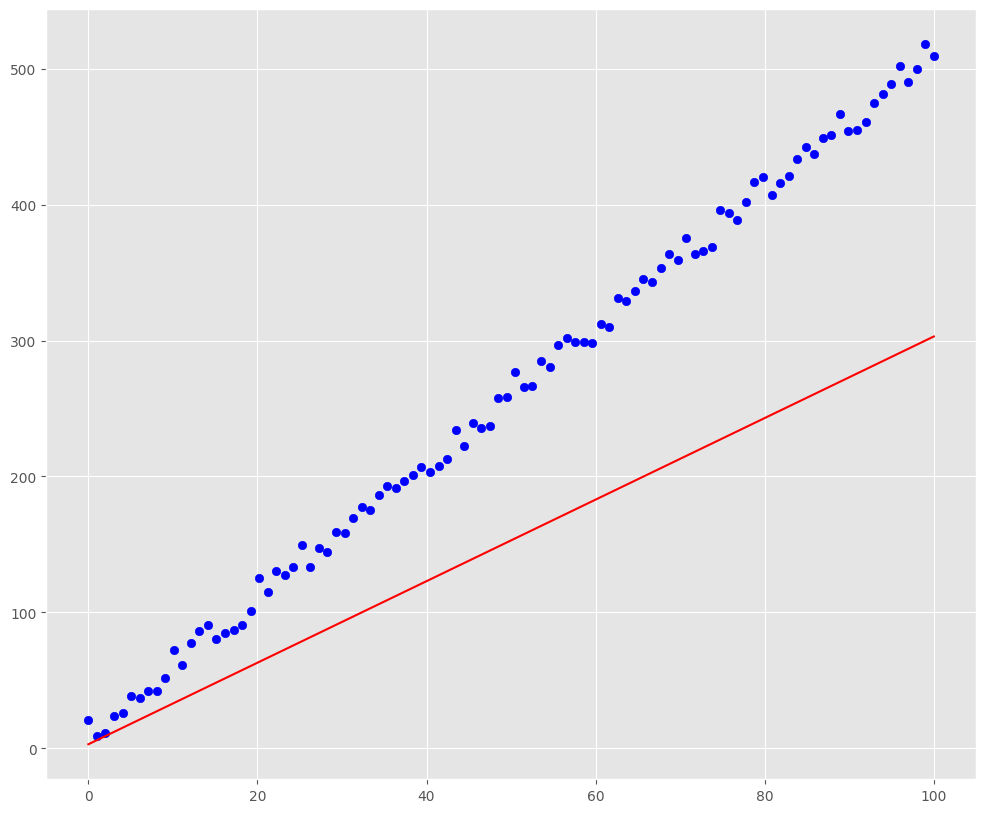

Average distance: 107.67000000000002



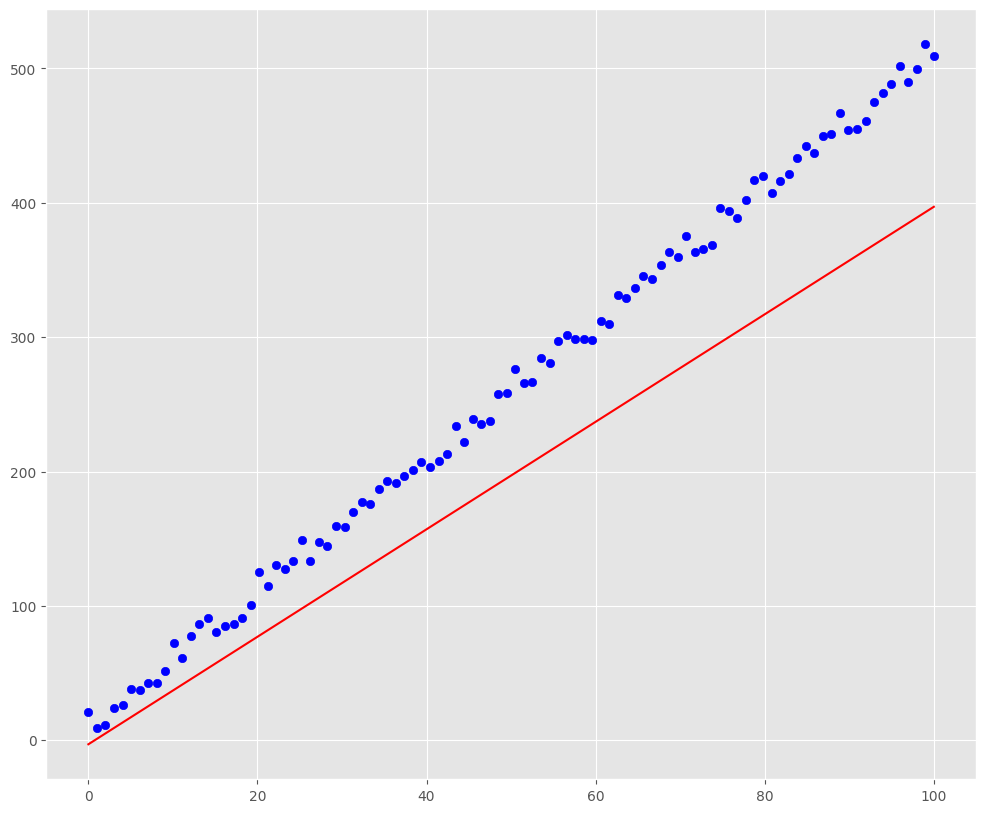

Average distance: 63.67000000000001



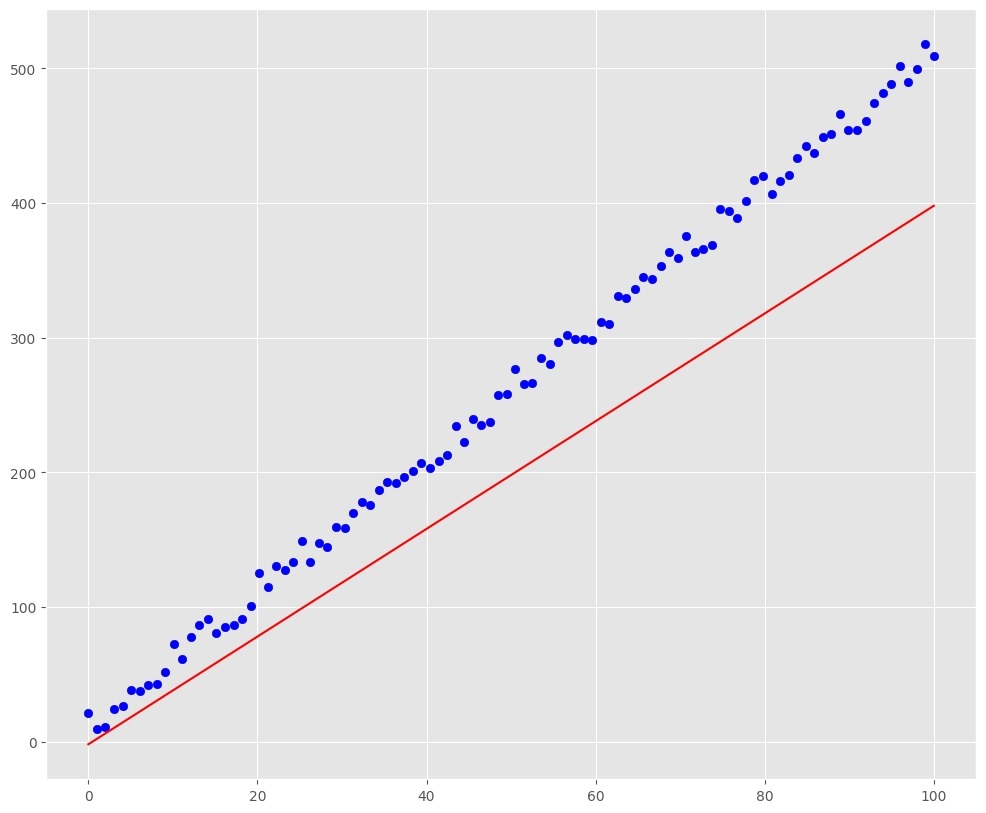

Average distance: 62.67000000000001



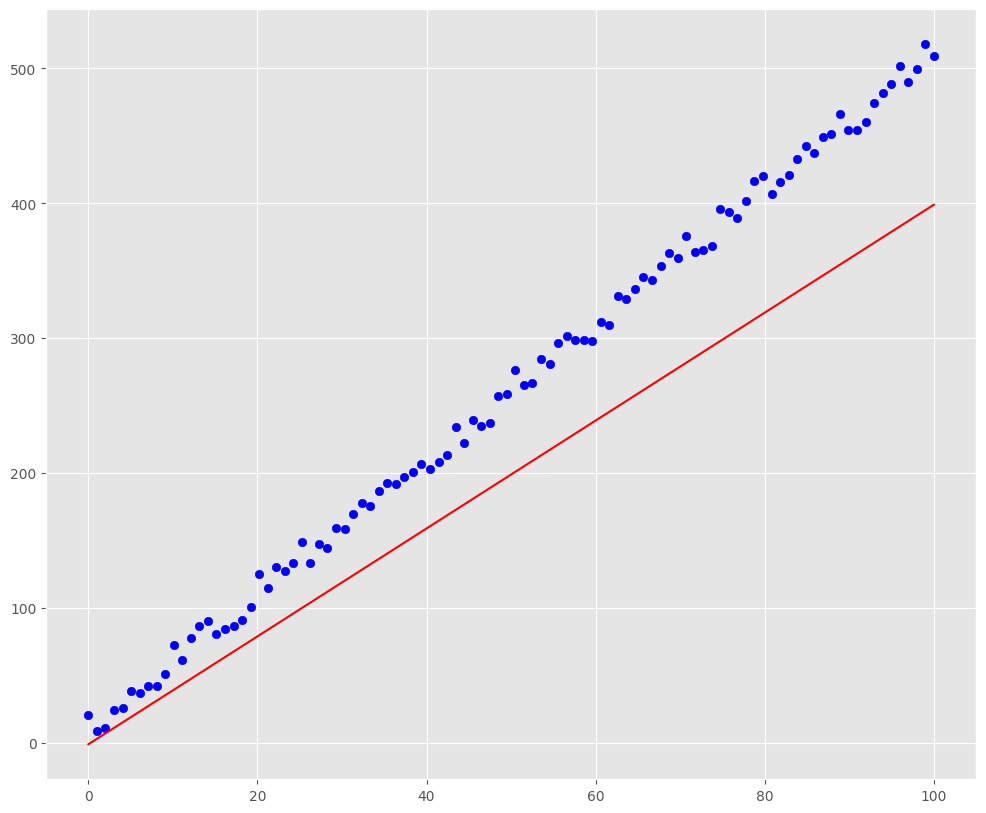

Average distance: 61.67000000000001



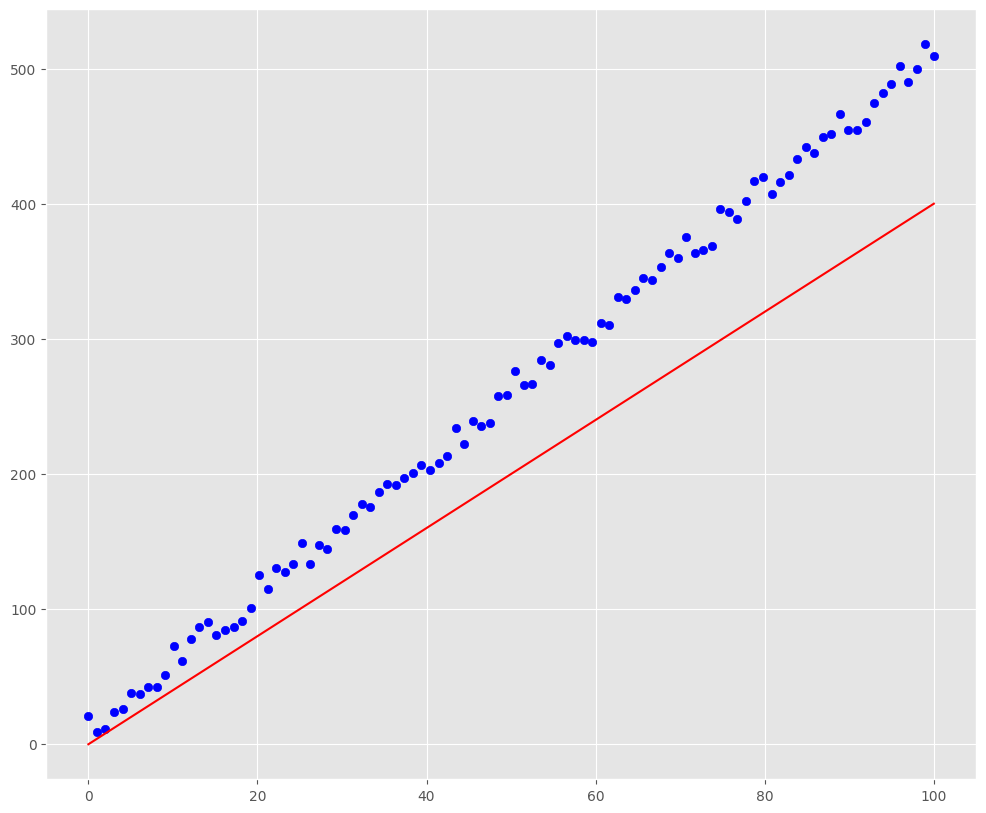

Average distance: 60.67000000000001



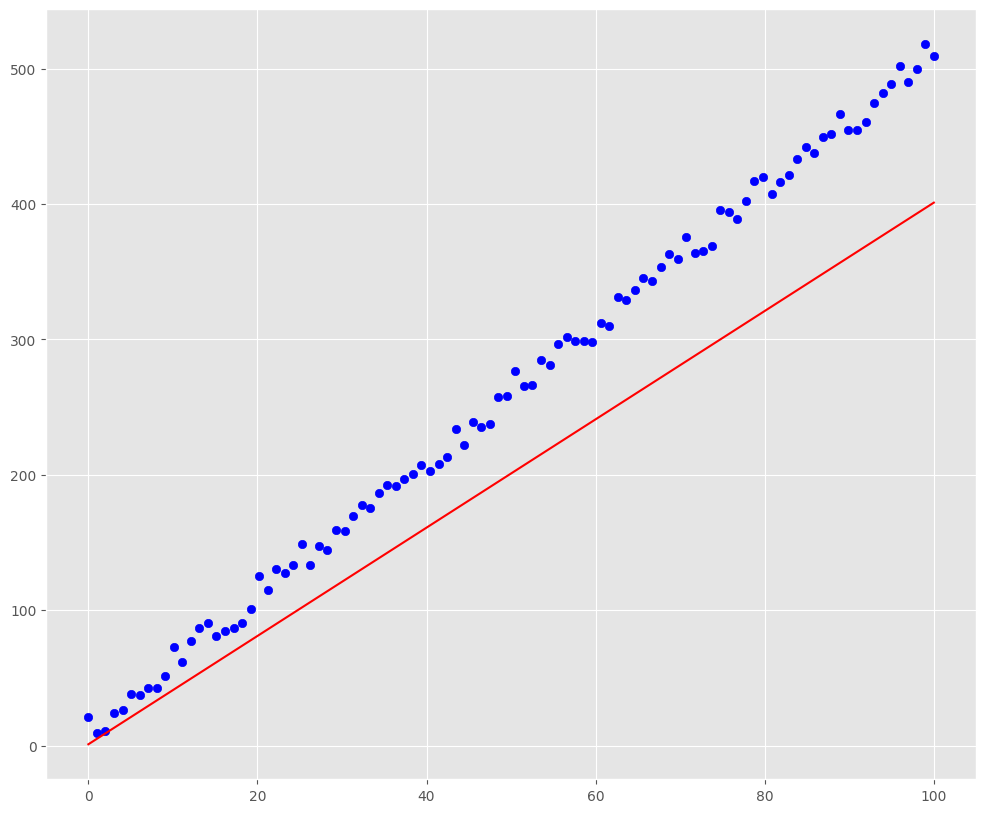

Average distance: 59.67000000000001



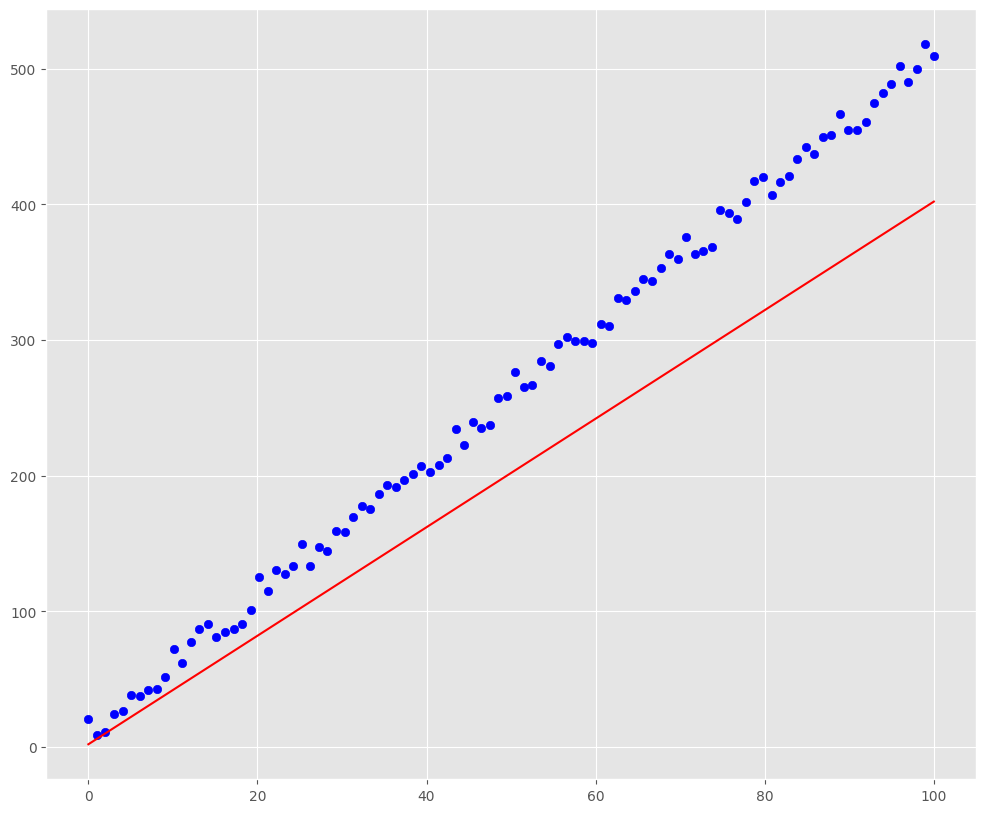

Average distance: 58.67000000000001



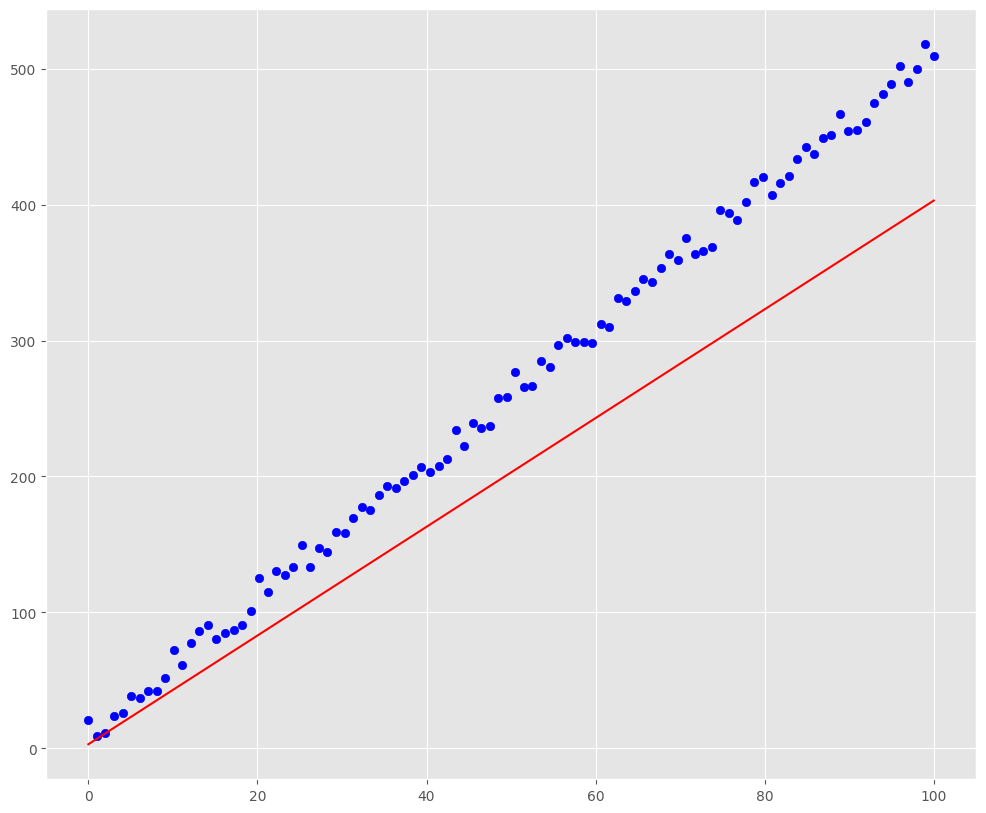

Average distance: 57.67000000000001



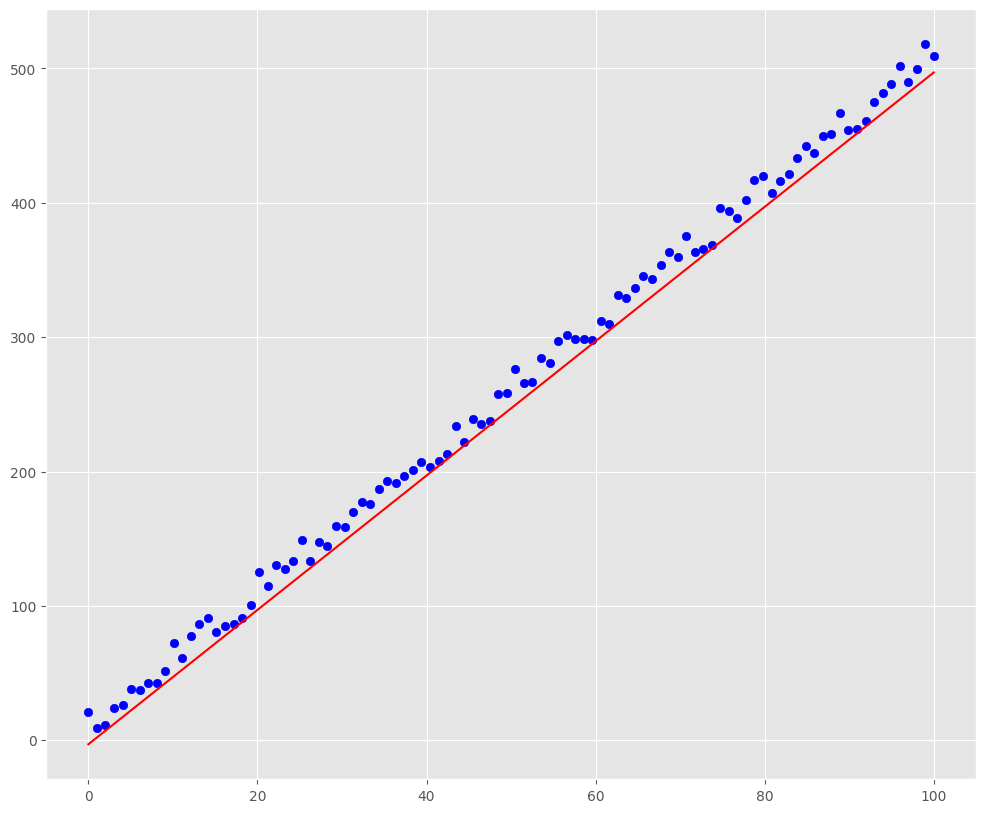

Average distance: 13.67



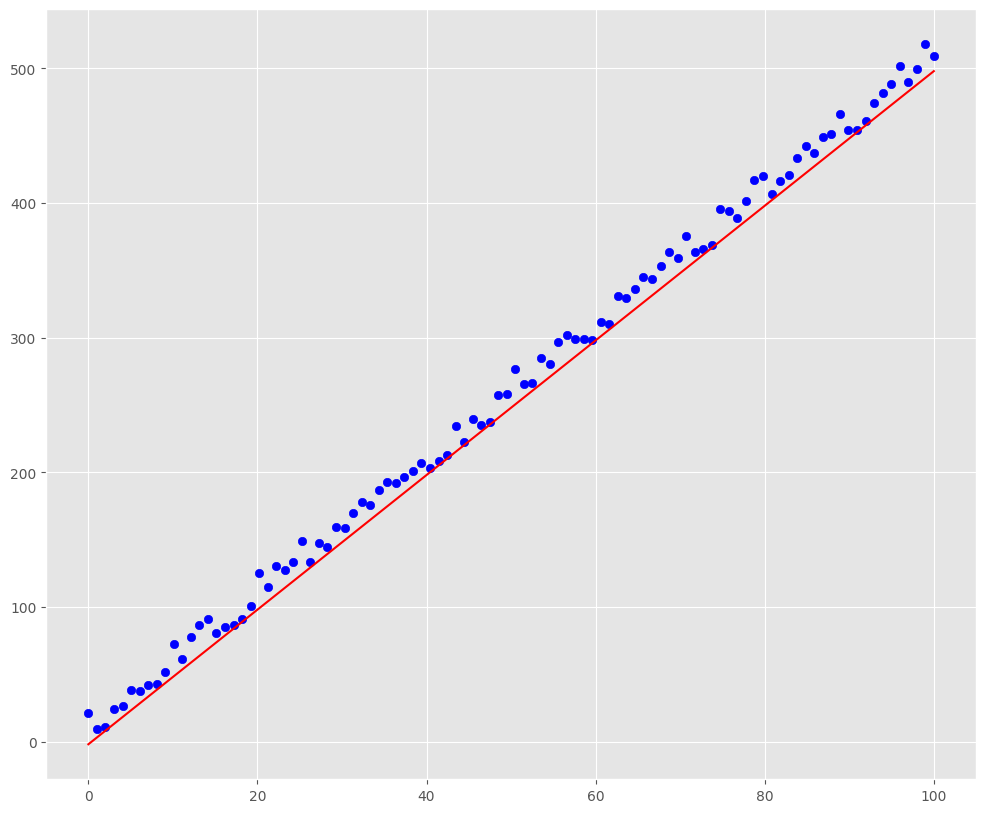

Average distance: 12.67



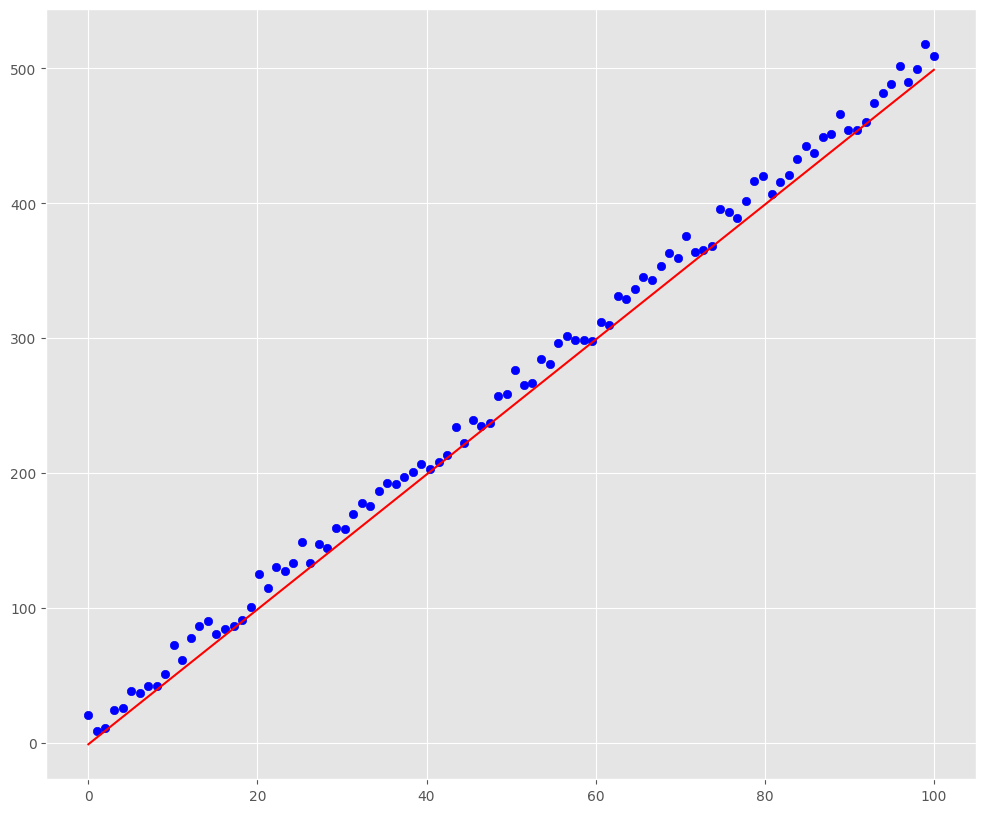

Average distance: 11.67



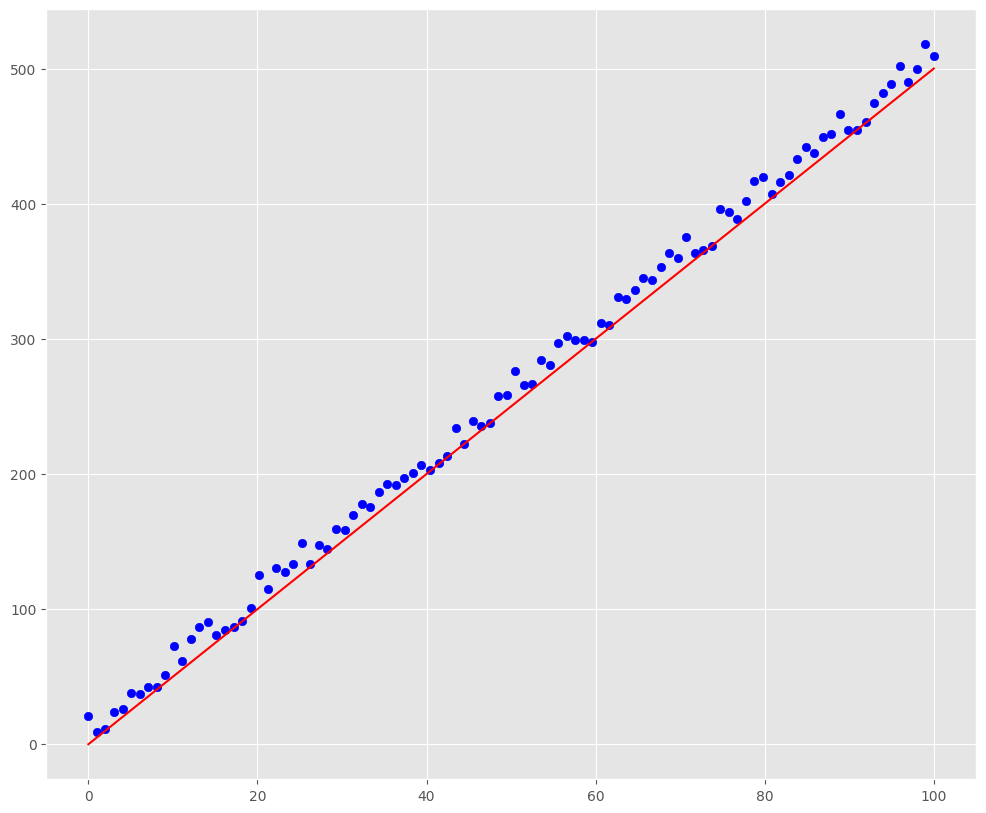

Average distance: 10.67



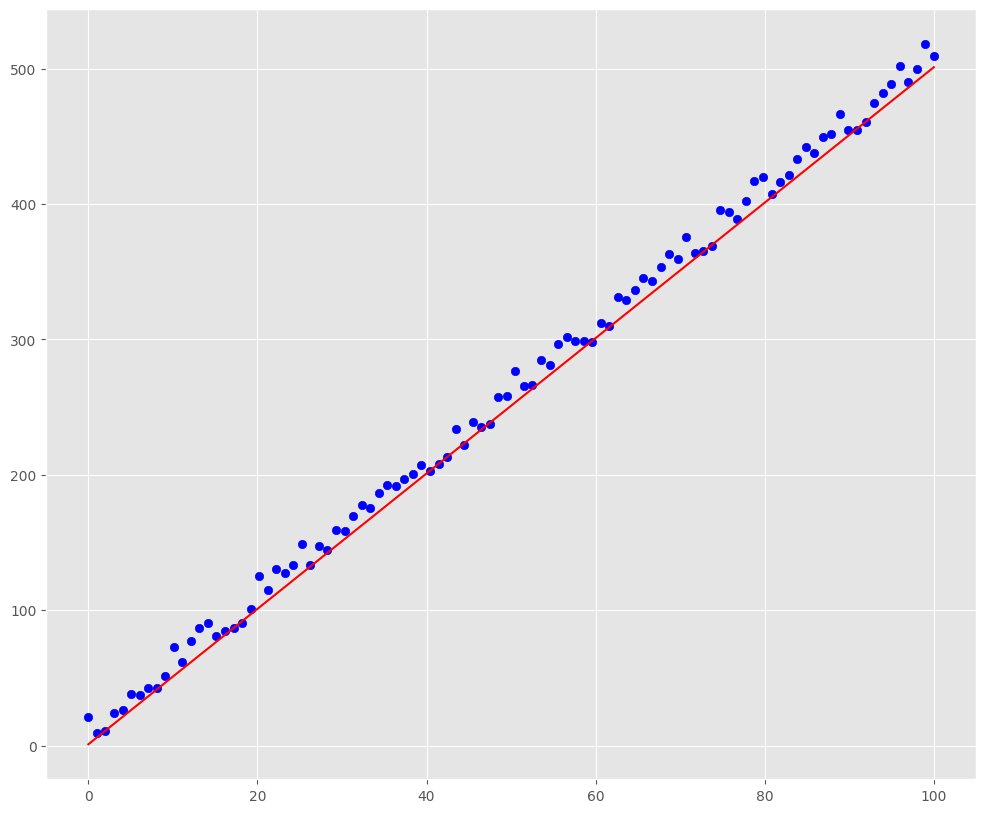

Average distance: 9.79



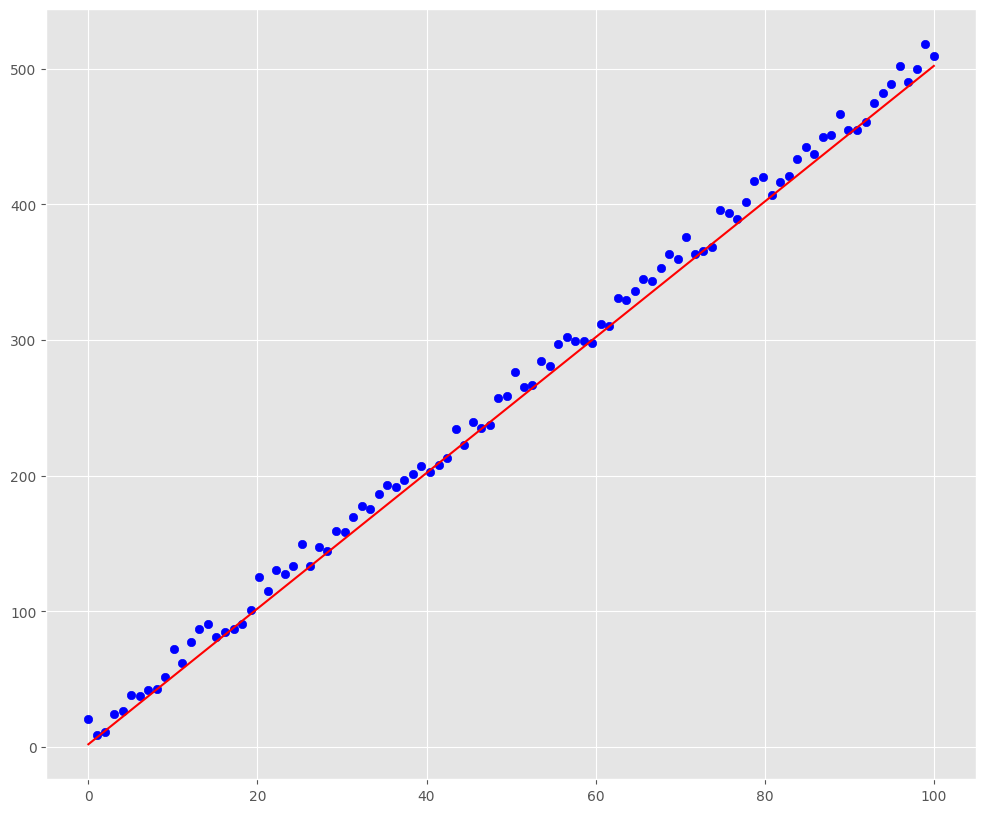

Average distance: 9.03



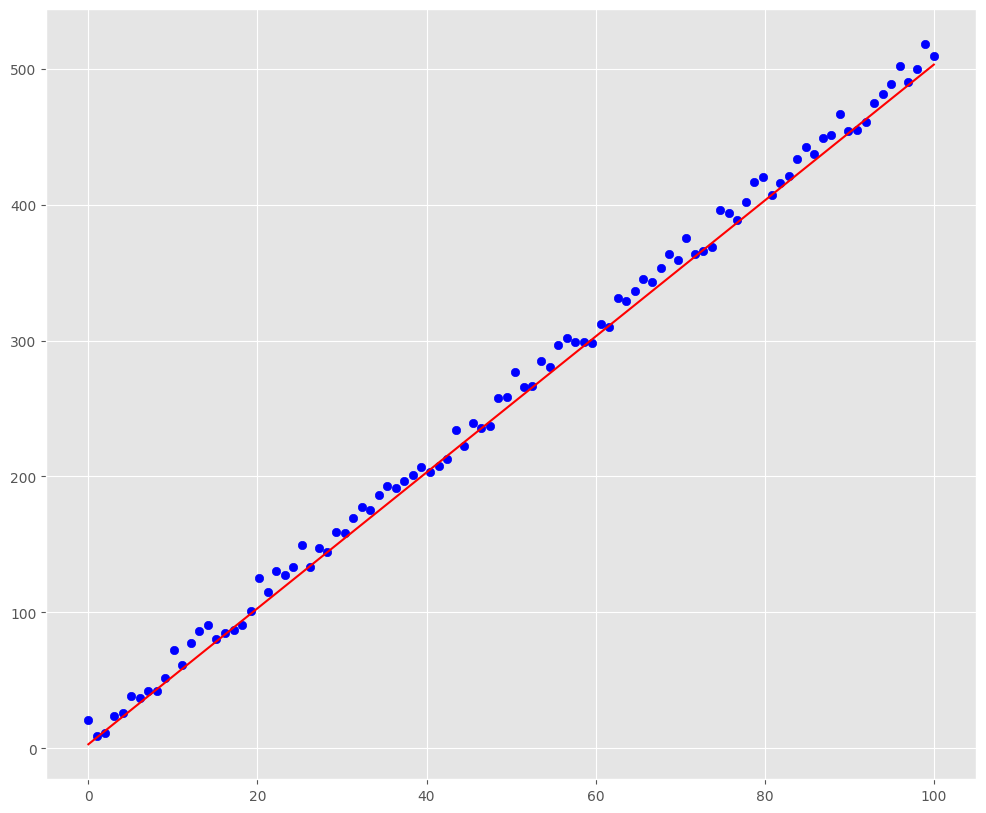

Average distance: 8.35



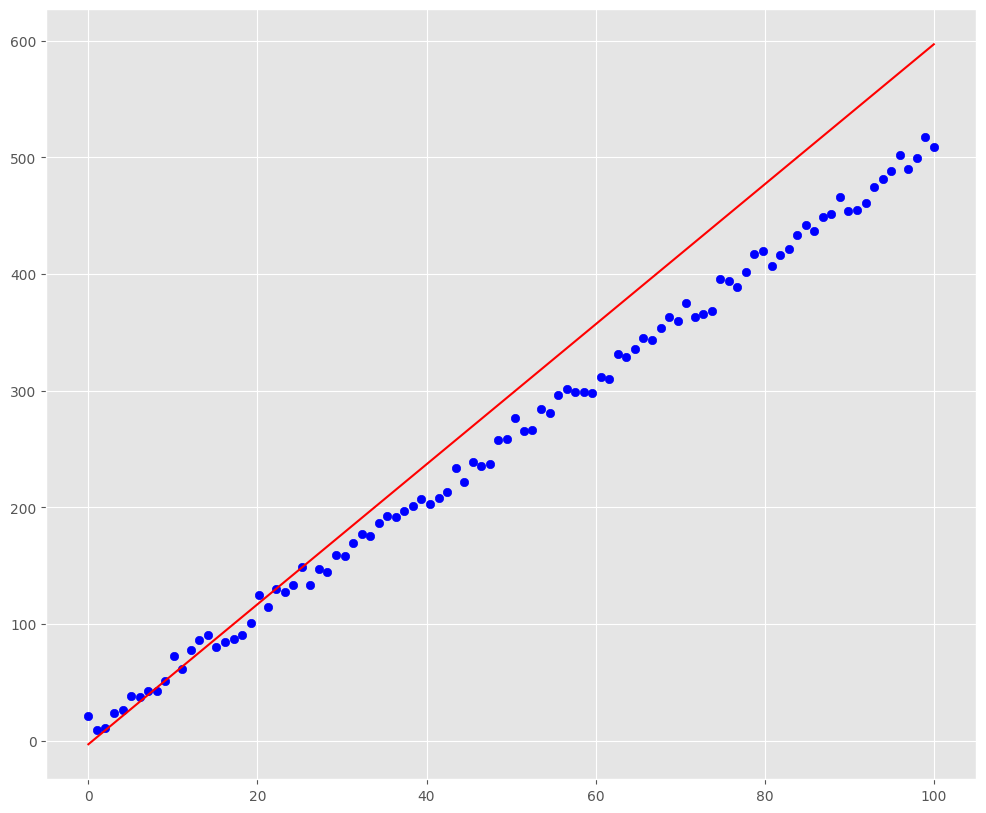

Average distance: 38.60535353535354



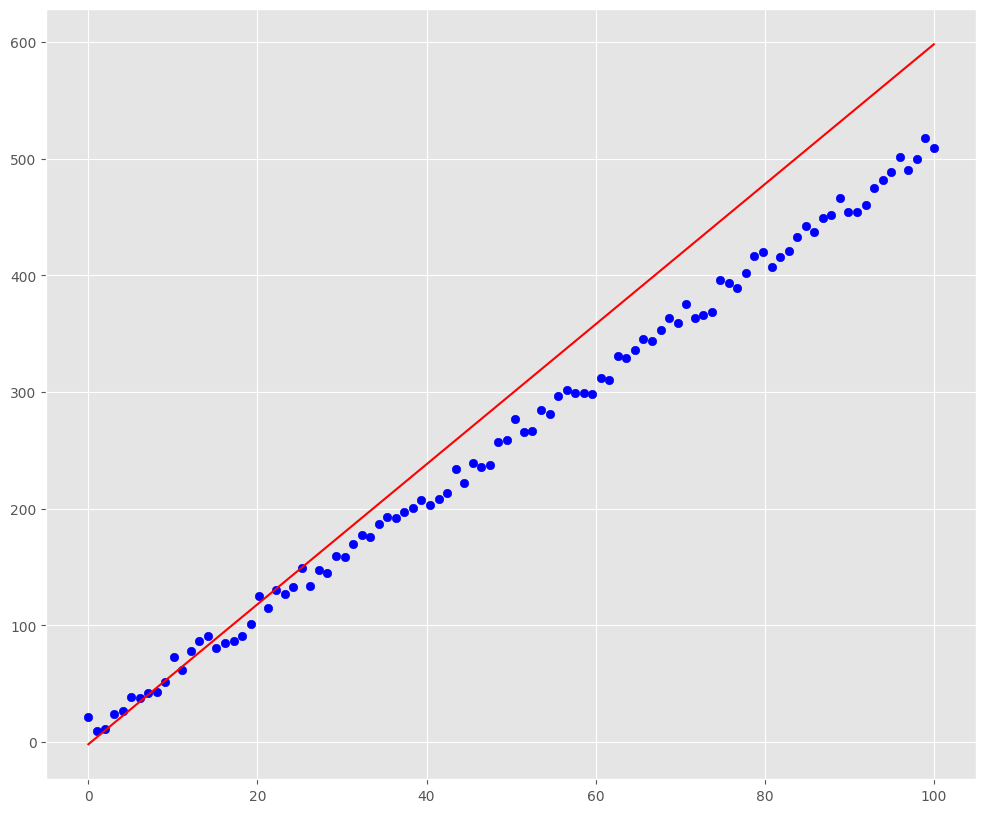

Average distance: 39.33040404040405



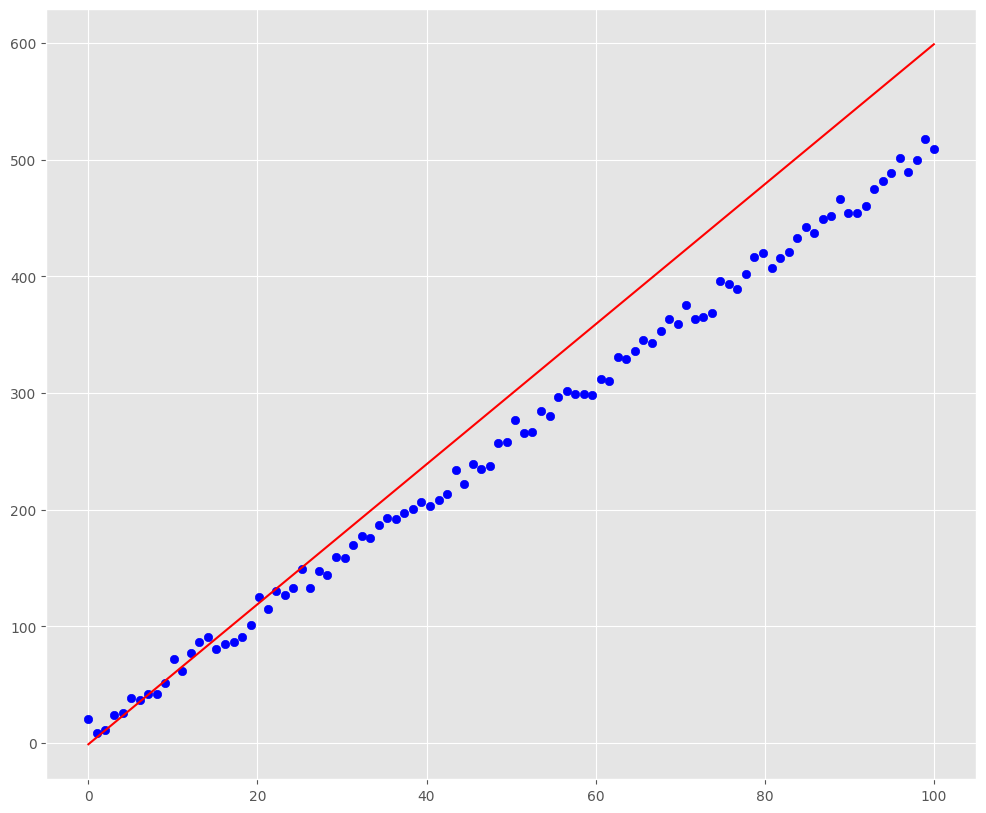

Average distance: 40.070808080808085



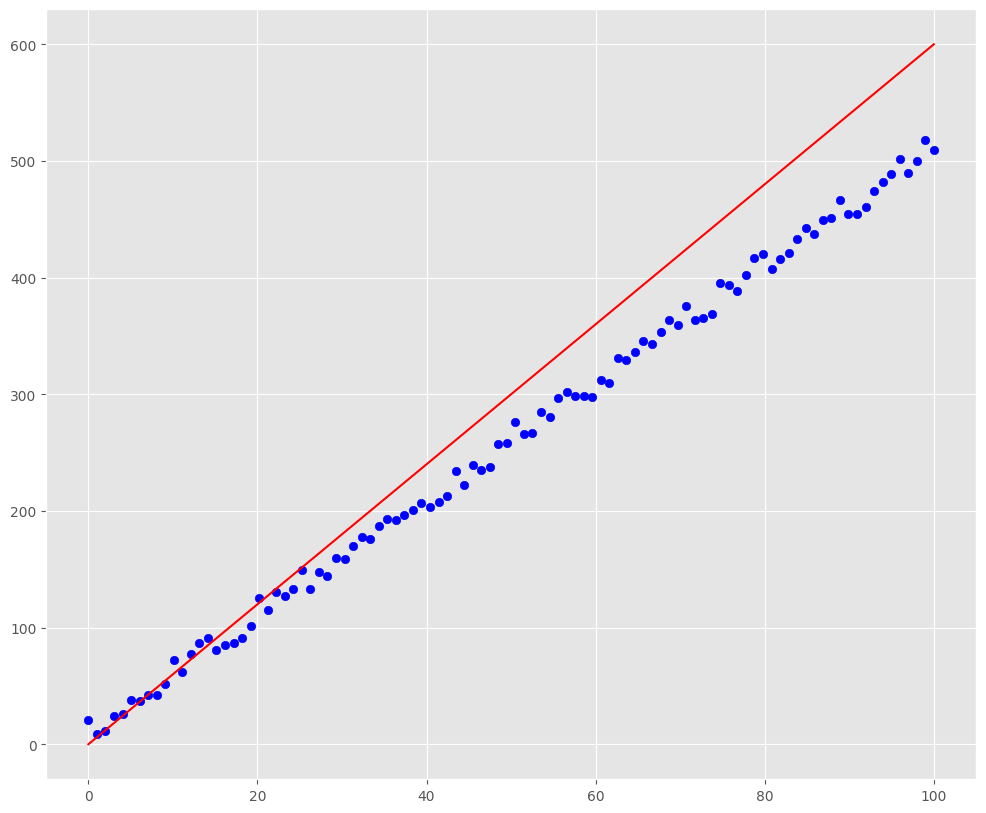

Average distance: 40.83222222222223



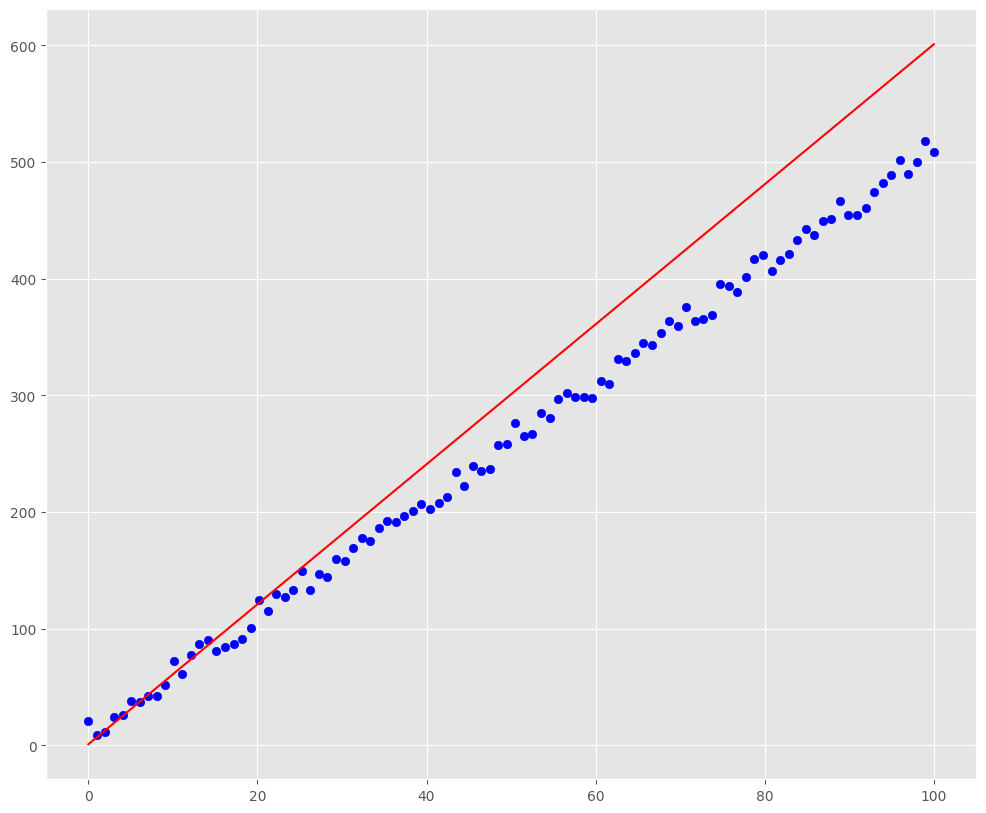

Average distance: 41.61343434343435



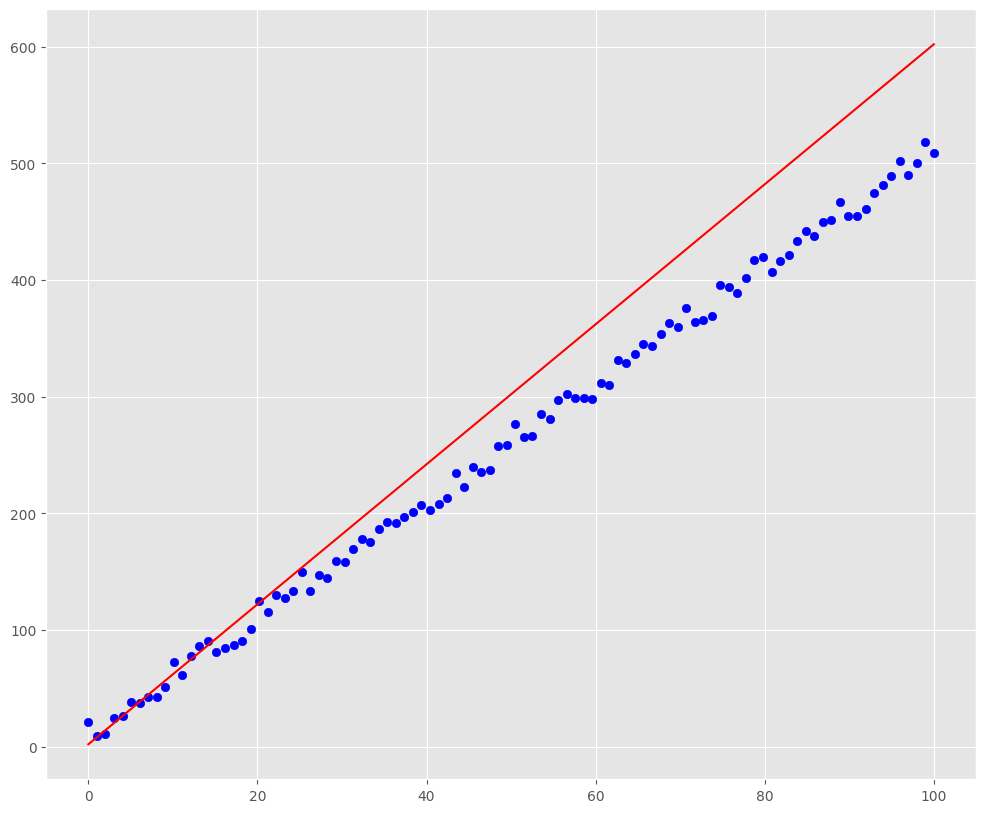

Average distance: 42.41424242424242



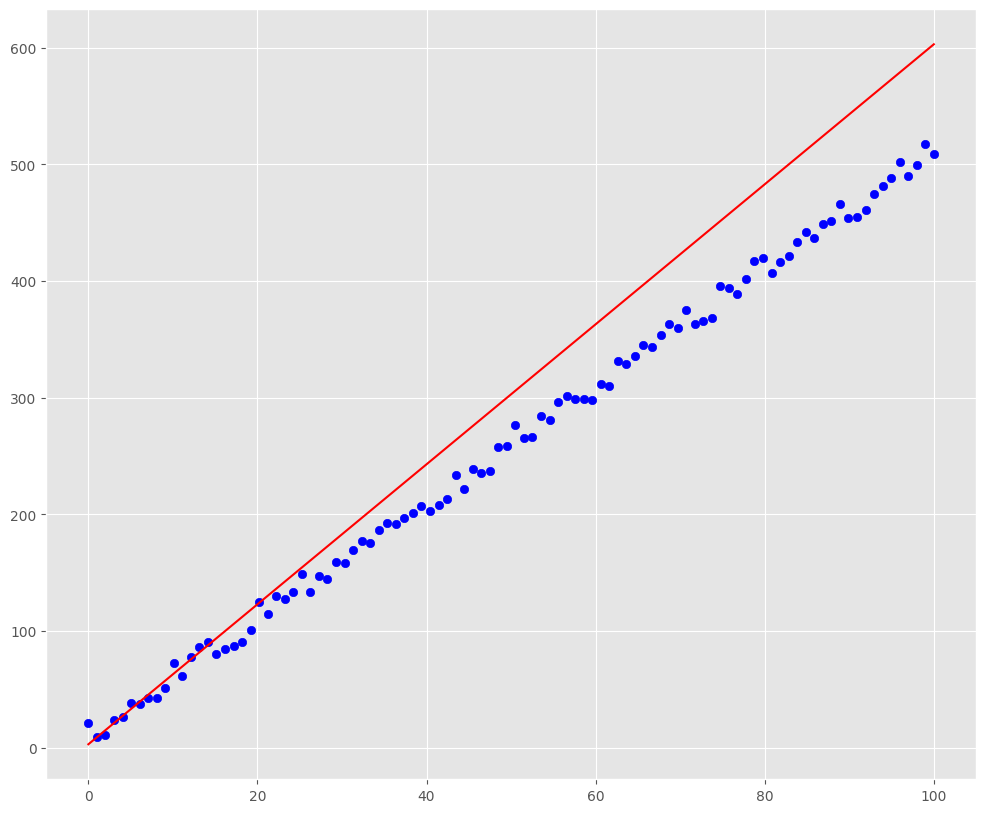

Average distance: 43.23444444444444



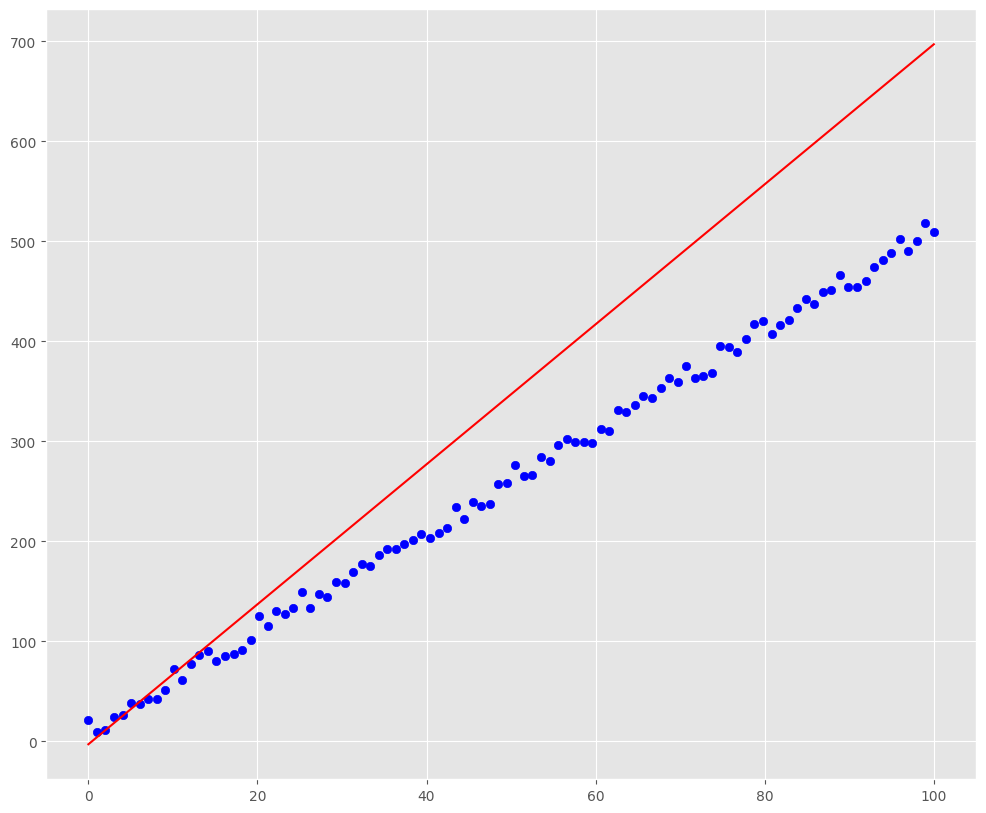

Average distance: 87.26070707070708



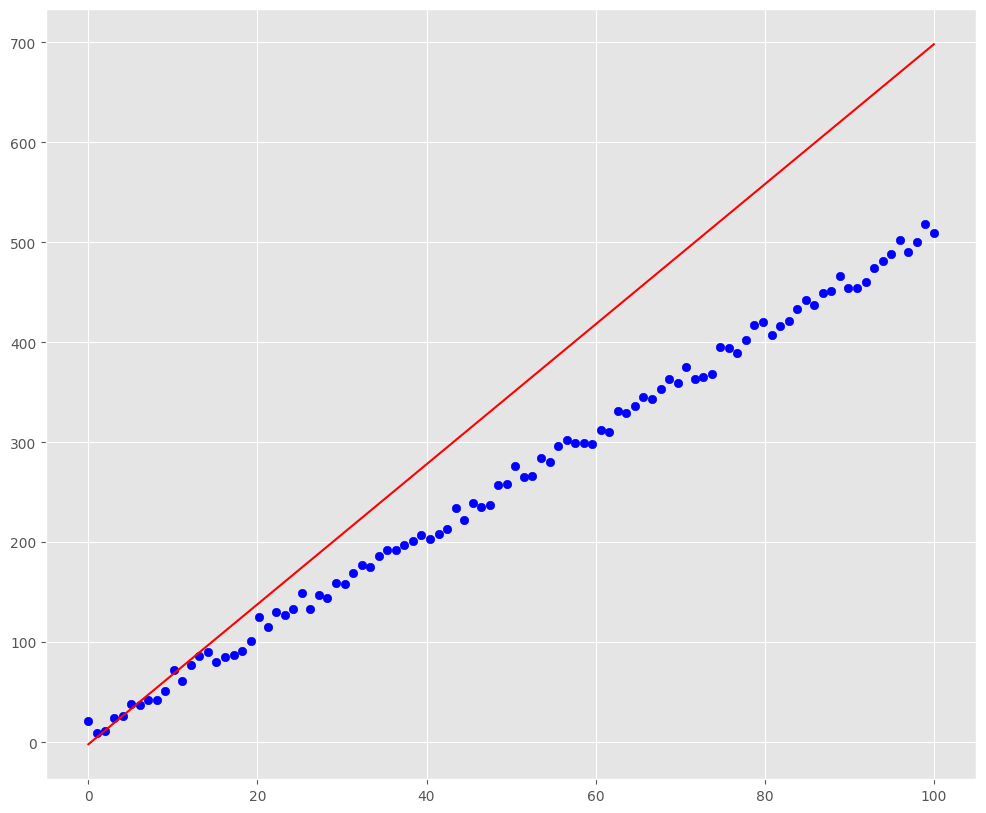

Average distance: 88.14232323232324



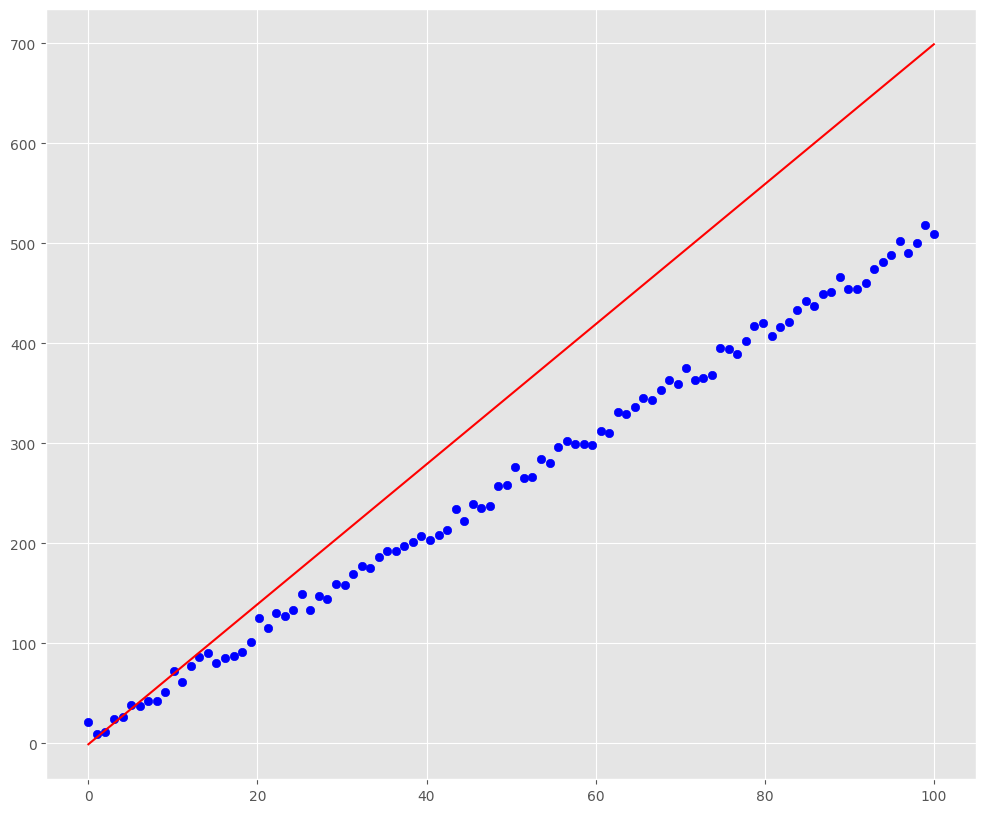

Average distance: 89.04232323232326



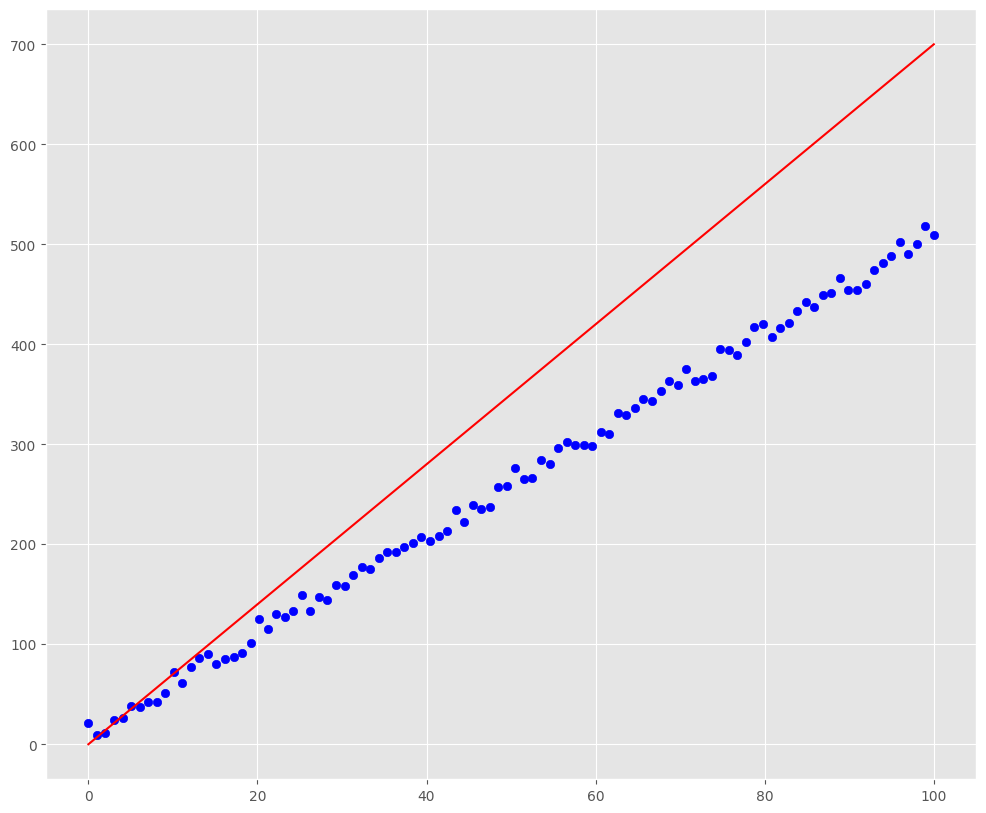

Average distance: 89.94232323232325



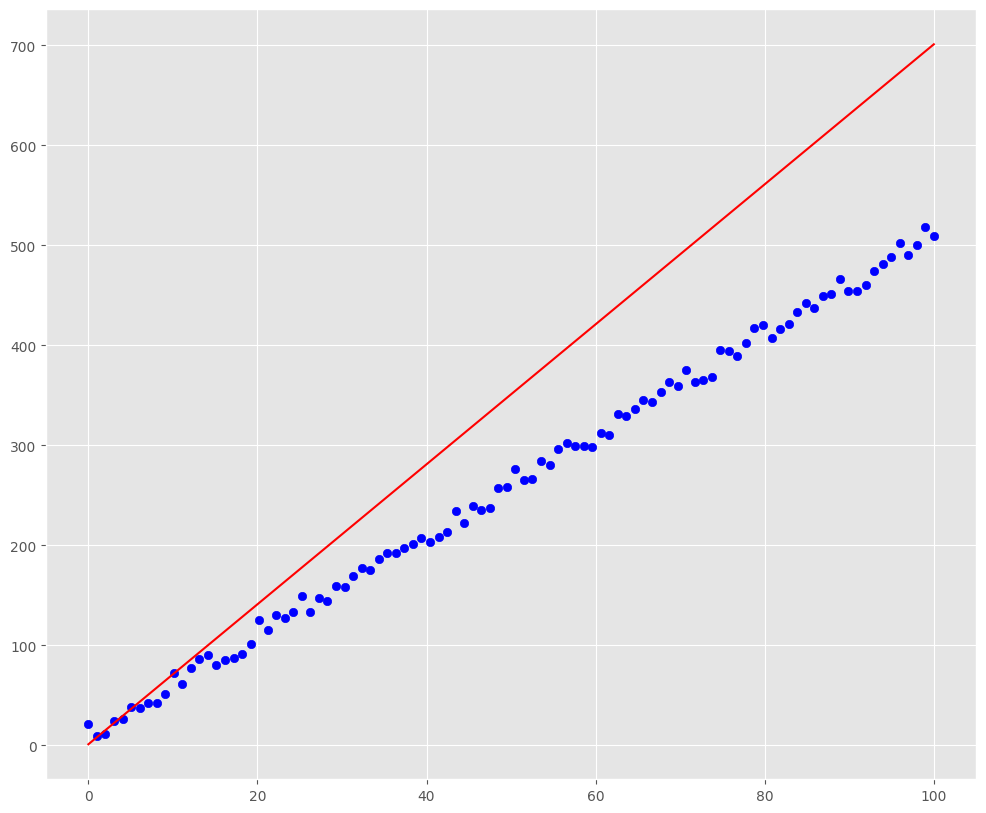

Average distance: 90.84232323232325



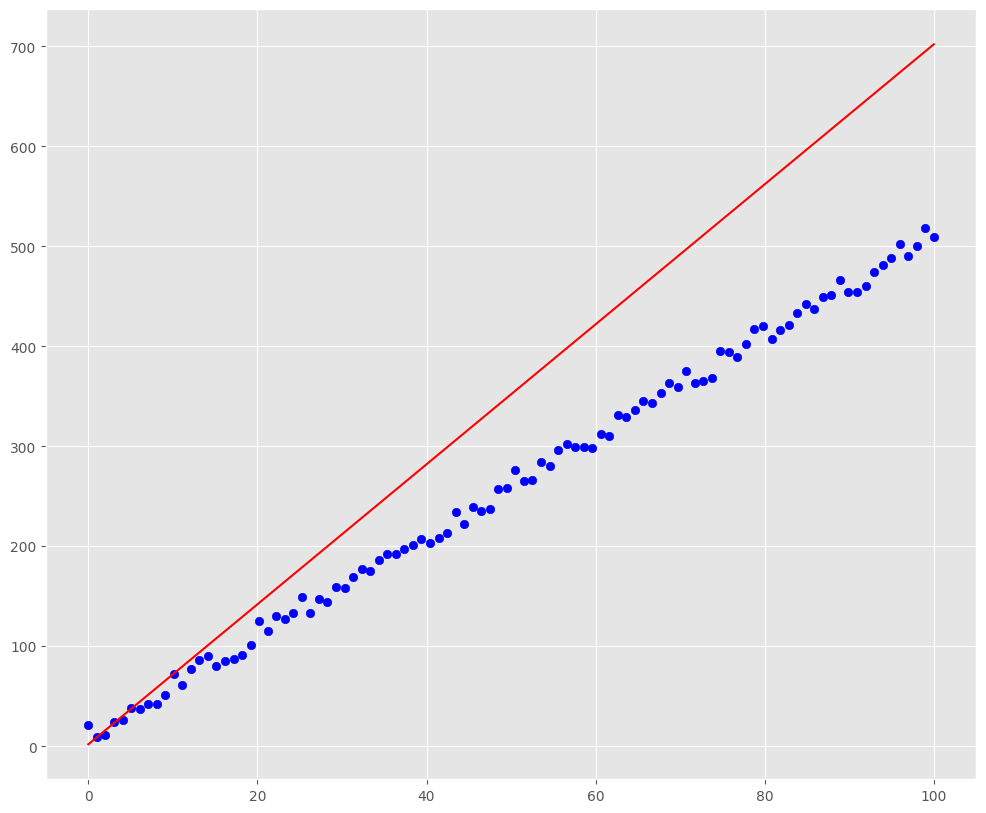

Average distance: 91.74676767676769



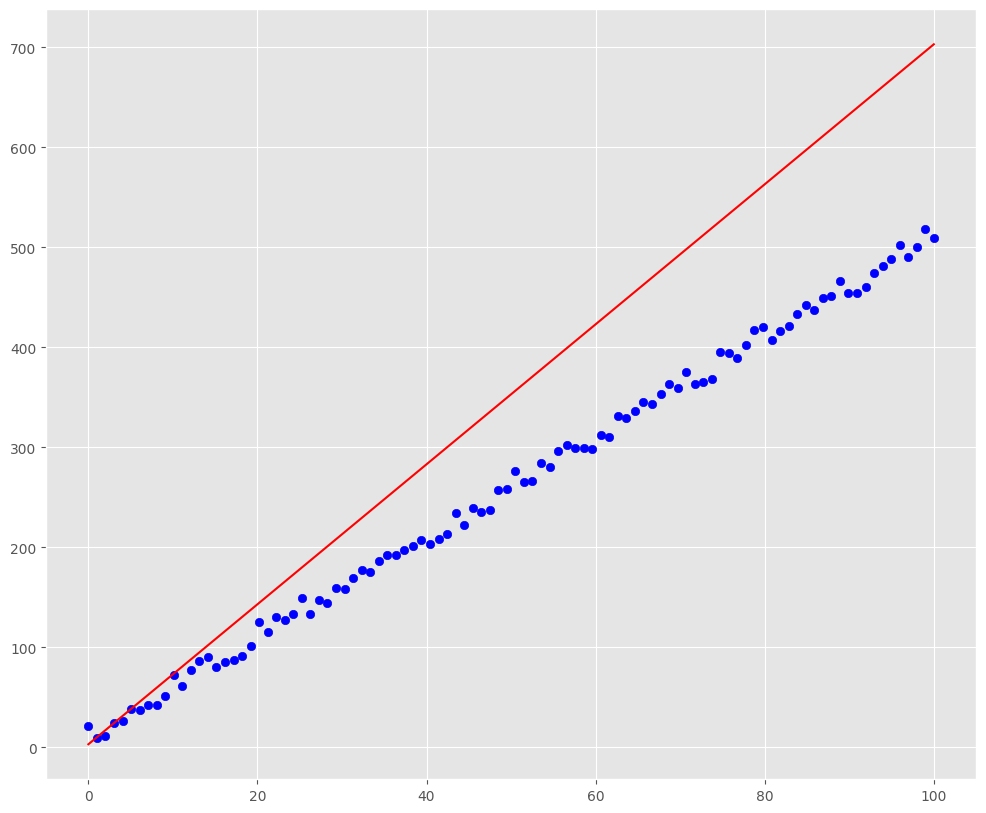

Average distance: 92.69



In [ ]:
for m in range(-3,8):
  for c in range(-3,4):
    py = (m*x + c).reshape((-1,1))

    plt.plot(x,py,color="red")
    plt.scatter(x,y,color="blue")
    plt.show()

    print("Average distance: {}\n".format(np.mean(np.sqrt((y-py)**2))))

In [ ]:
def lin_regression(x,y):
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5)

  m1 = linear_model.LinearRegression()
  m1.fit(x_train,y_train)

  print("The coefficient is: {} and the intercept is: {}\n".format(m1.coef_[0][0],m1.intercept_[0]))

  y_pred = m1.predict(x_test)
  metrics.mean_squared_error(y_pred,y_test)
  plt.title("Visualization of actual data vs predicted outputs")
  plt.scatter(x,y,color="blue")
  plt.plot(x_test,y_pred,color="red")
  plt.legend(["predicted line","actual data points"])
  plt.show()

  print("The RMSE for linear regression is: {}".format(math.sqrt(metrics.mean_squared_error(y_pred,y_test))))


The coefficient is: 5.052930722761462 and the intercept is: 8.125661866132901



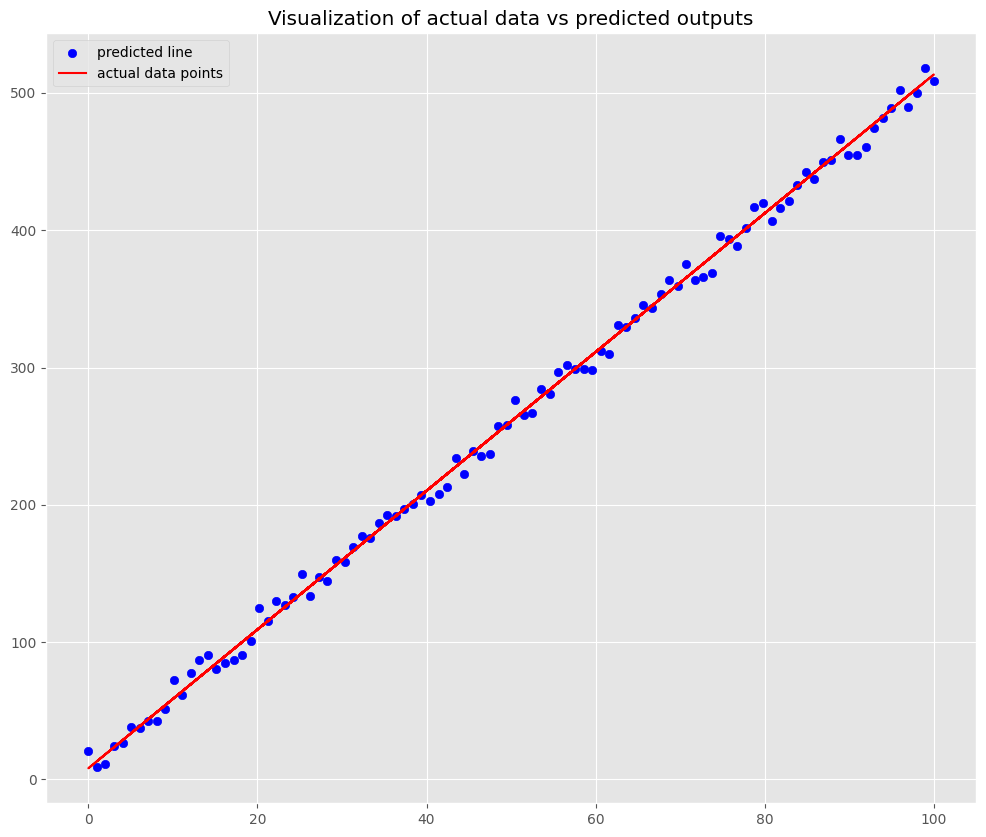

The RMSE for linear regression is: 7.238266004784124


In [ ]:
lin_regression(x,y)

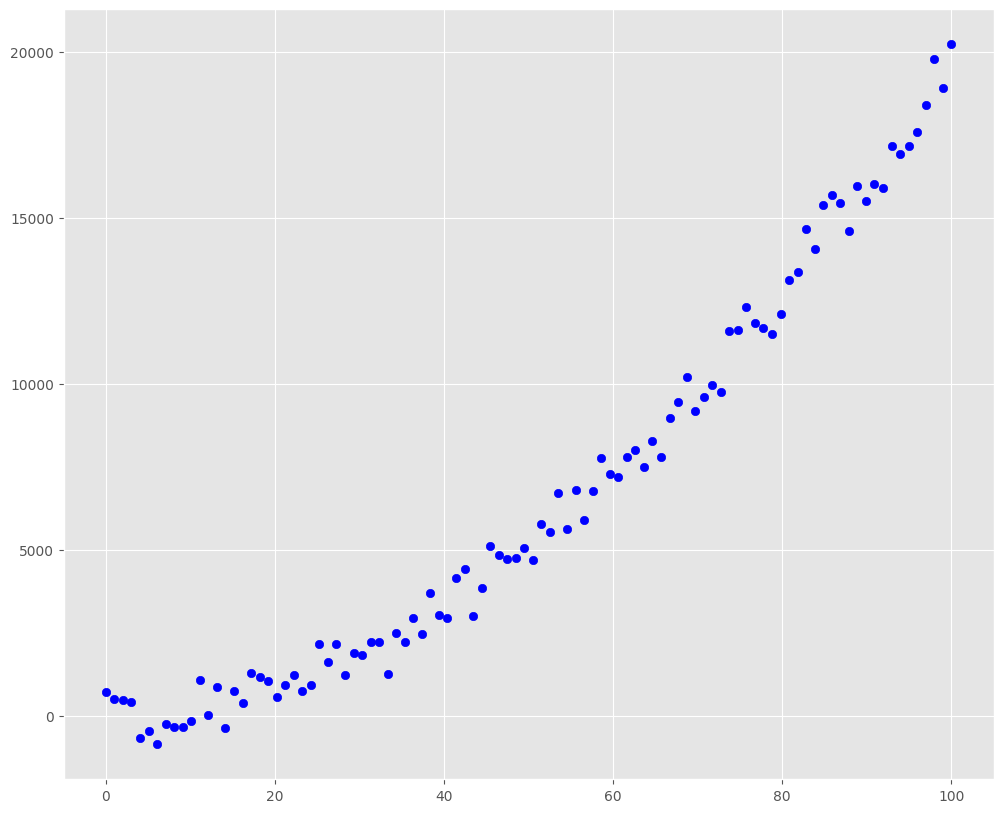

In [ ]:
# need of polynomial regression

y2 = (np.random.randint(-1000,1000,x.shape)).astype(int).reshape((-1,1)) + 2*x**2
plt.scatter(x,y2,color="blue")
plt.show()

In [ ]:
# polynomial regression

def poly_regression(x,y,deg):

  x = x.reshape((-1,1))
  y = y.reshape((-1,1))

  poly = PolynomialFeatures(degree=deg)

  x_ = poly.fit_transform(x)
  poly.fit(x_,y)

  m1 = linear_model.LinearRegression()
  m1.fit(x_,y)
  y_pred = m1.predict(x_)

  mse = np.sqrt(metrics.mean_squared_error(y_pred,y))

  plt.plot(x,y_pred,color="red")
  plt.title("Visualization of actual data vs predicted outputs (polynomial regression)")
  plt.scatter(x,y,color="blue")
  plt.legend(["predicted polynomial","actual data points"])
  plt.show()

  print("The RMSE for polynomial regression is: {}".format(mse))

The coefficient is: 192.63866054216453 and the intercept is: -2887.204511029784



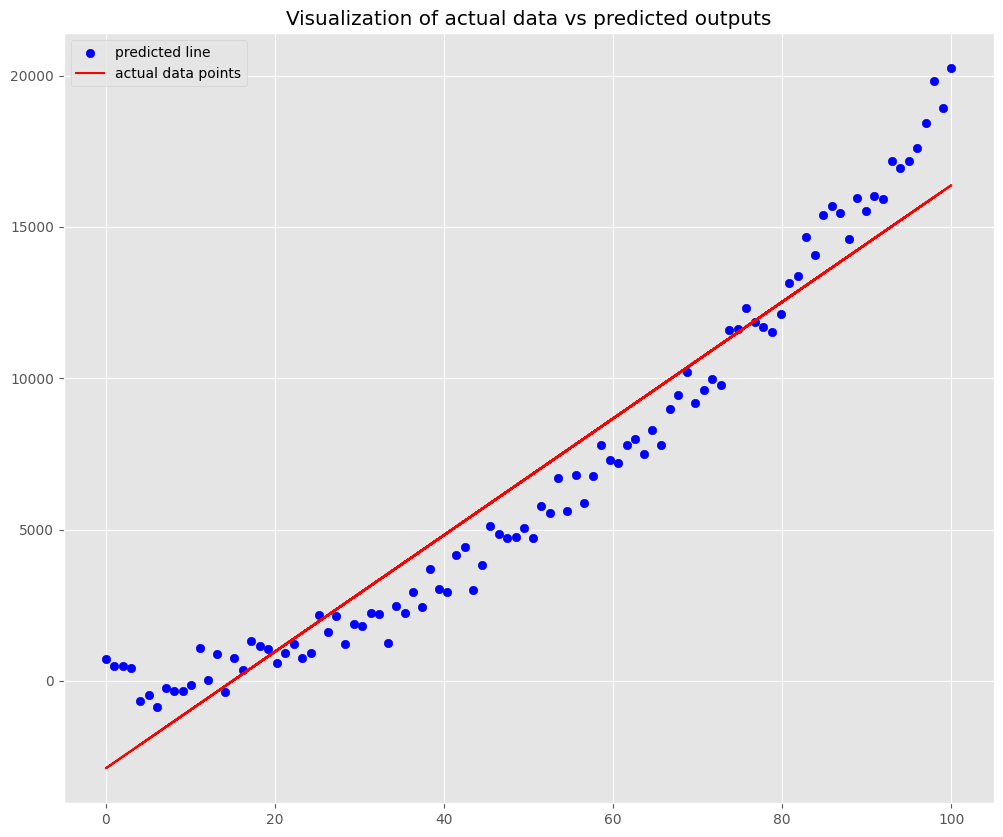

The RMSE for linear regression is: 1661.801417325016


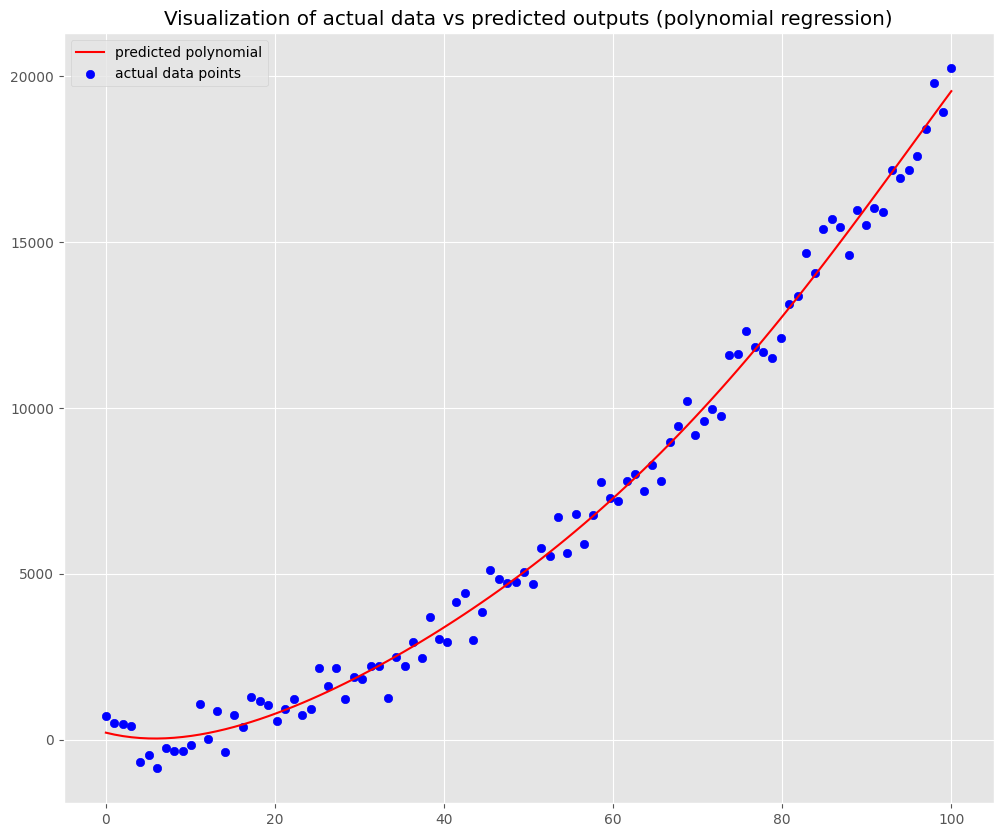

The RMSE for polynomial regression is: 530.0149095672364


In [ ]:
lin_regression(x,y2)
poly_regression(x,y2,5)

# Applying Linear Regression to housing Data

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")
df['MEDV'] = df['median_house_value']
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

       MEDV  
0  452600.0  
1  358500.0  
2  352100.0  
3  341300.0  
4  342200.0

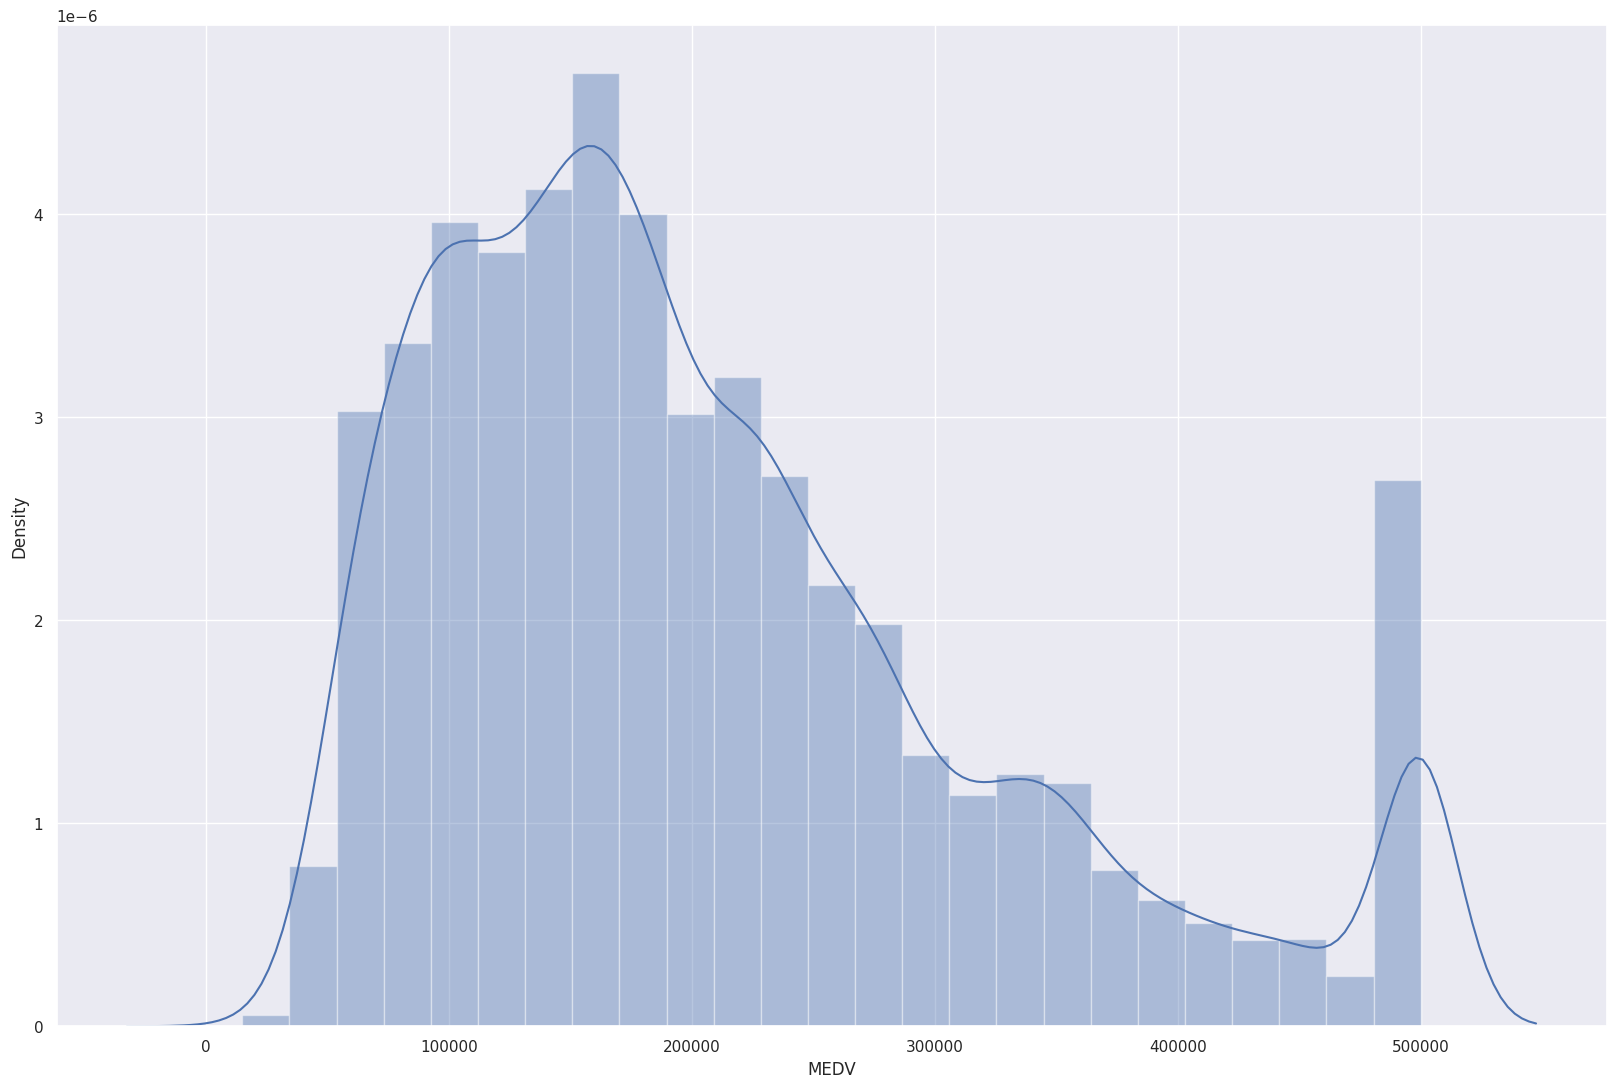

In [ ]:
sns.set(rc={'figure.figsize':(20,13)})
sns.distplot(df['MEDV'], bins=25)
plt.show()

In [ ]:
df.drop(['ocean_proximity'],inplace=True,axis=1)

<Axes: >

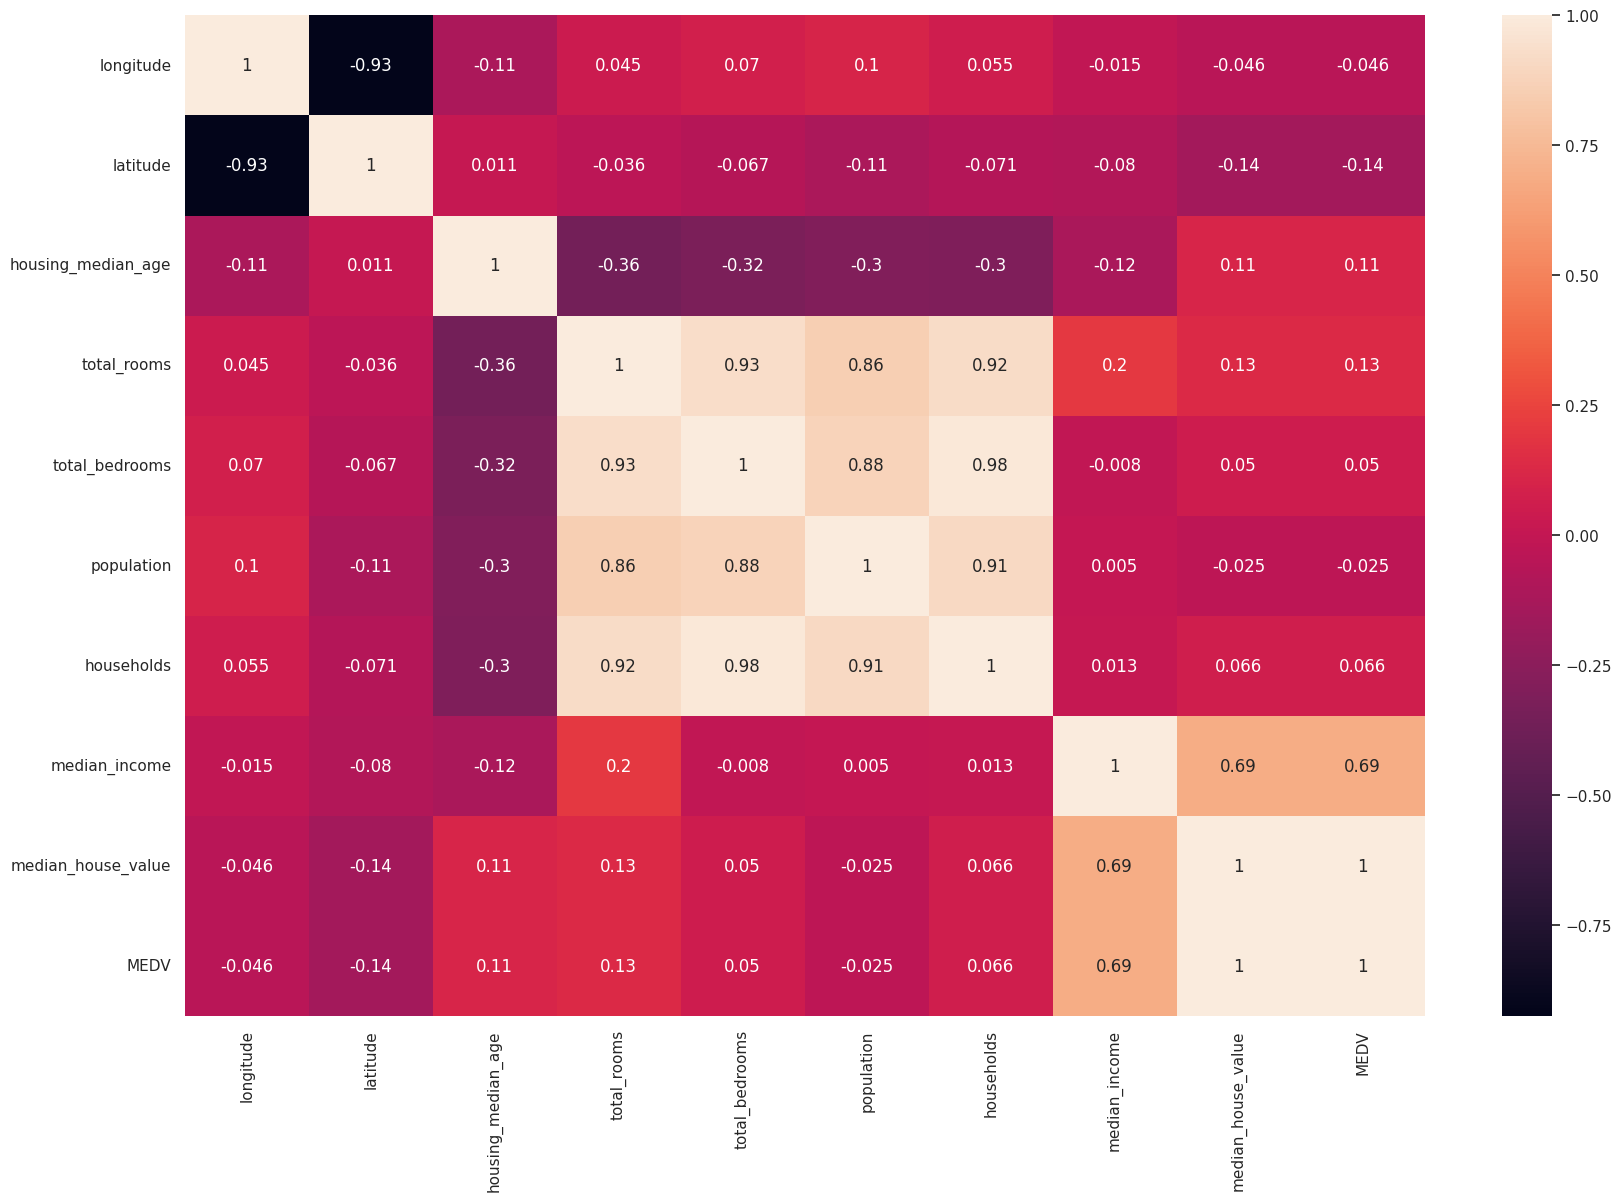

In [ ]:
correlation_matrix=df.corr().round(3)
sns.heatmap(data=correlation_matrix,annot=True)

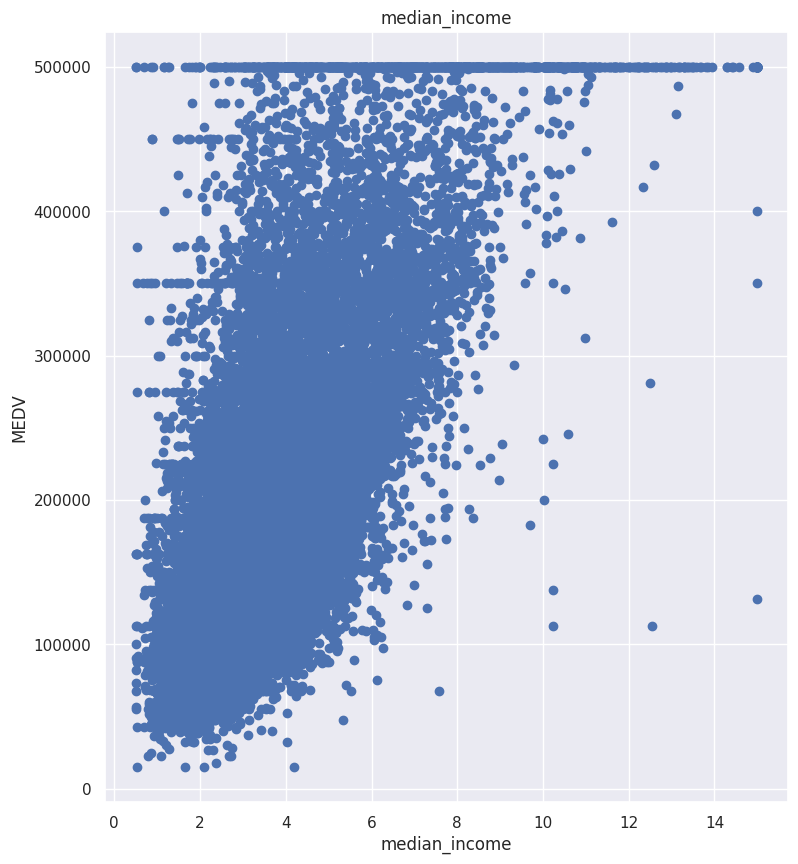

In [ ]:
plt.figure(figsize=(30,10))
features=['median_income']
target=df['MEDV']
for i,col in enumerate(features):
    plt.subplot(1,3,i+1)
    x=df[col]
    y=target
    plt.scatter(x,y,marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')


In [ ]:
x_ex = pd.DataFrame(np.c_[df['median_income']], columns = ['median_income'])
y_ex = df['MEDV']

x_ex_train, x_ex_test, y_ex_train, y_ex_test = train_test_split(x_ex, y_ex, test_size = 0.5, random_state=53)

lin_model = linear_model.LinearRegression()
lin_model.fit(x_ex_train, y_ex_train)

LinearRegression()

In [ ]:
y_ex_train_predict = lin_model.predict(x_ex_train)
rmse = (np.sqrt(metrics.mean_squared_error(y_ex_train, y_ex_train_predict)))
r2 = metrics.r2_score(y_ex_train, y_ex_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}\n'.format(rmse))

y_ex_test_predict = lin_model.predict(x_ex_test)
rmse = (np.sqrt(metrics.mean_squared_error(y_ex_test, y_ex_test_predict)))
r2 = metrics.r2_score(y_ex_test, y_ex_test_predict)

print("Model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))


The model performance for training set
--------------------------------------
RMSE is 83419.40324774904

Model performance for testing set
--------------------------------------
RMSE is 84061.67666950762


# **Exercises**

# 1. Higher Degree Polynomials

(Change the polynomial degree in the slider and run the cell)

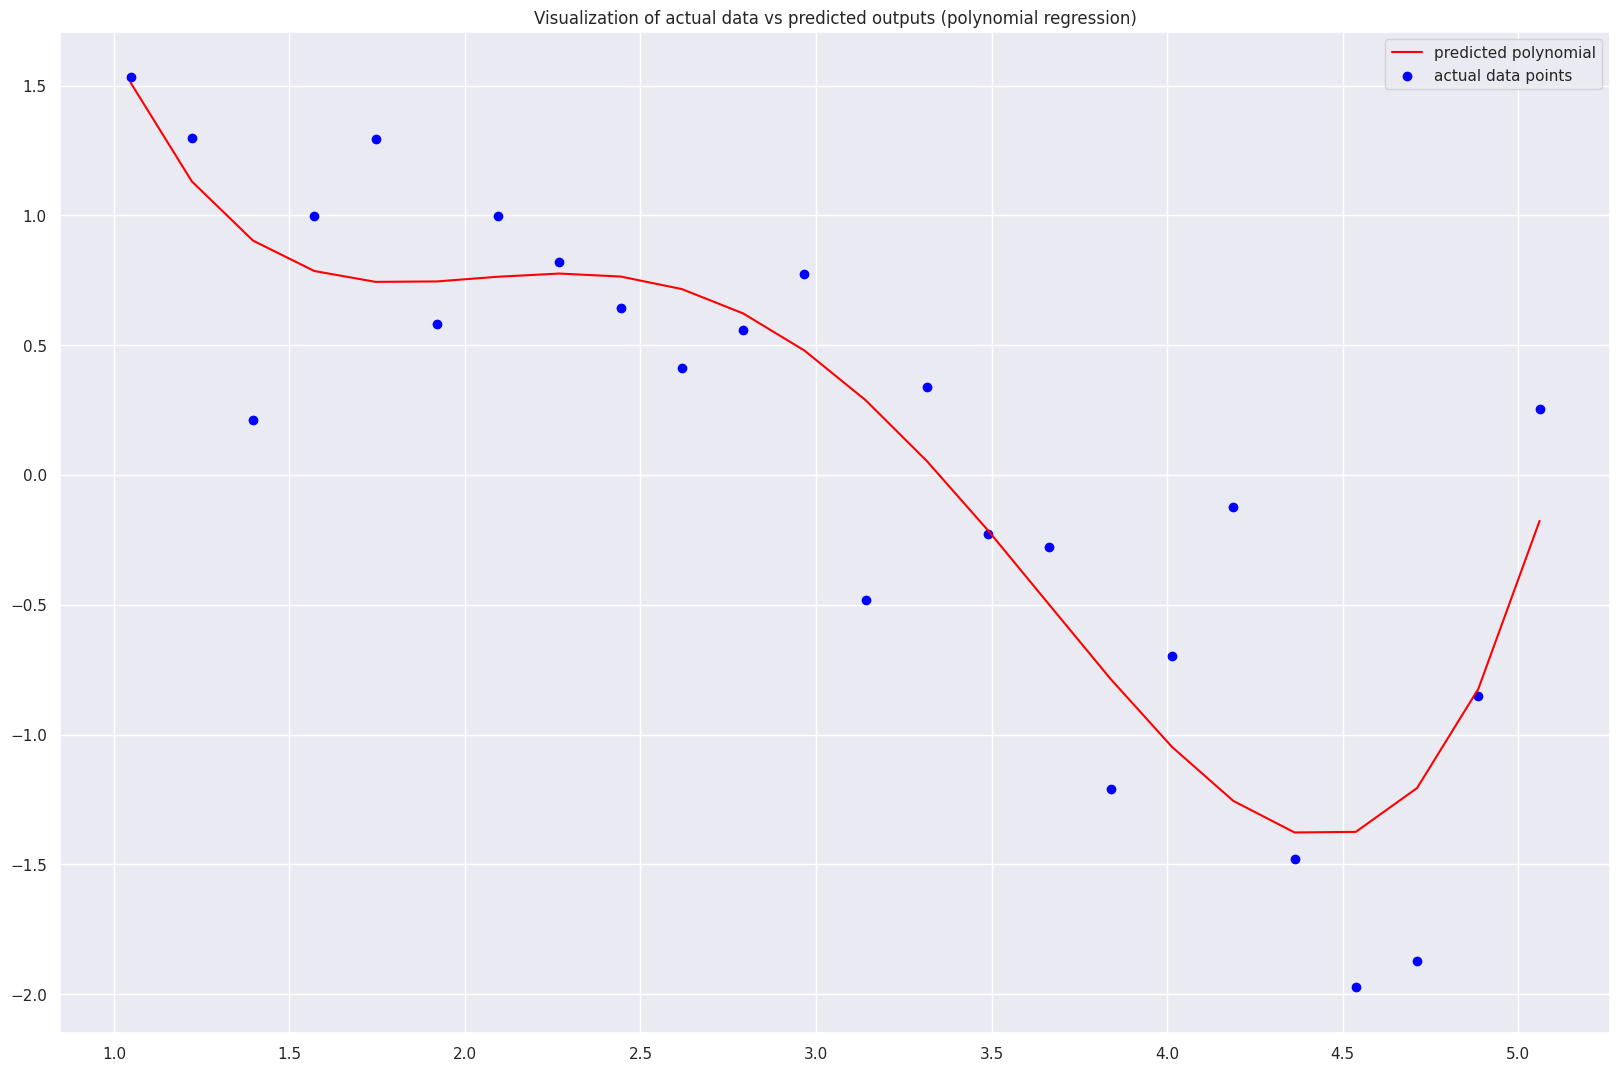

The RMSE for polynomial regression is: 0.43023306255906096


In [ ]:
deg = 4#@param {type:"slider", min: 2, max:15, step:1}

np.random.seed(10)

x_ex = np.array([i*np.pi/180 for i in range(60,300,10)])
y_ex = np.sin(x_ex) + np.random.normal(0,0.5,len(x_ex))
poly_regression(x_ex,y_ex,deg)

2.   Try running the above with degree set to 1. You will observe that only higher degree polynomials are able to fit to such noisy data.

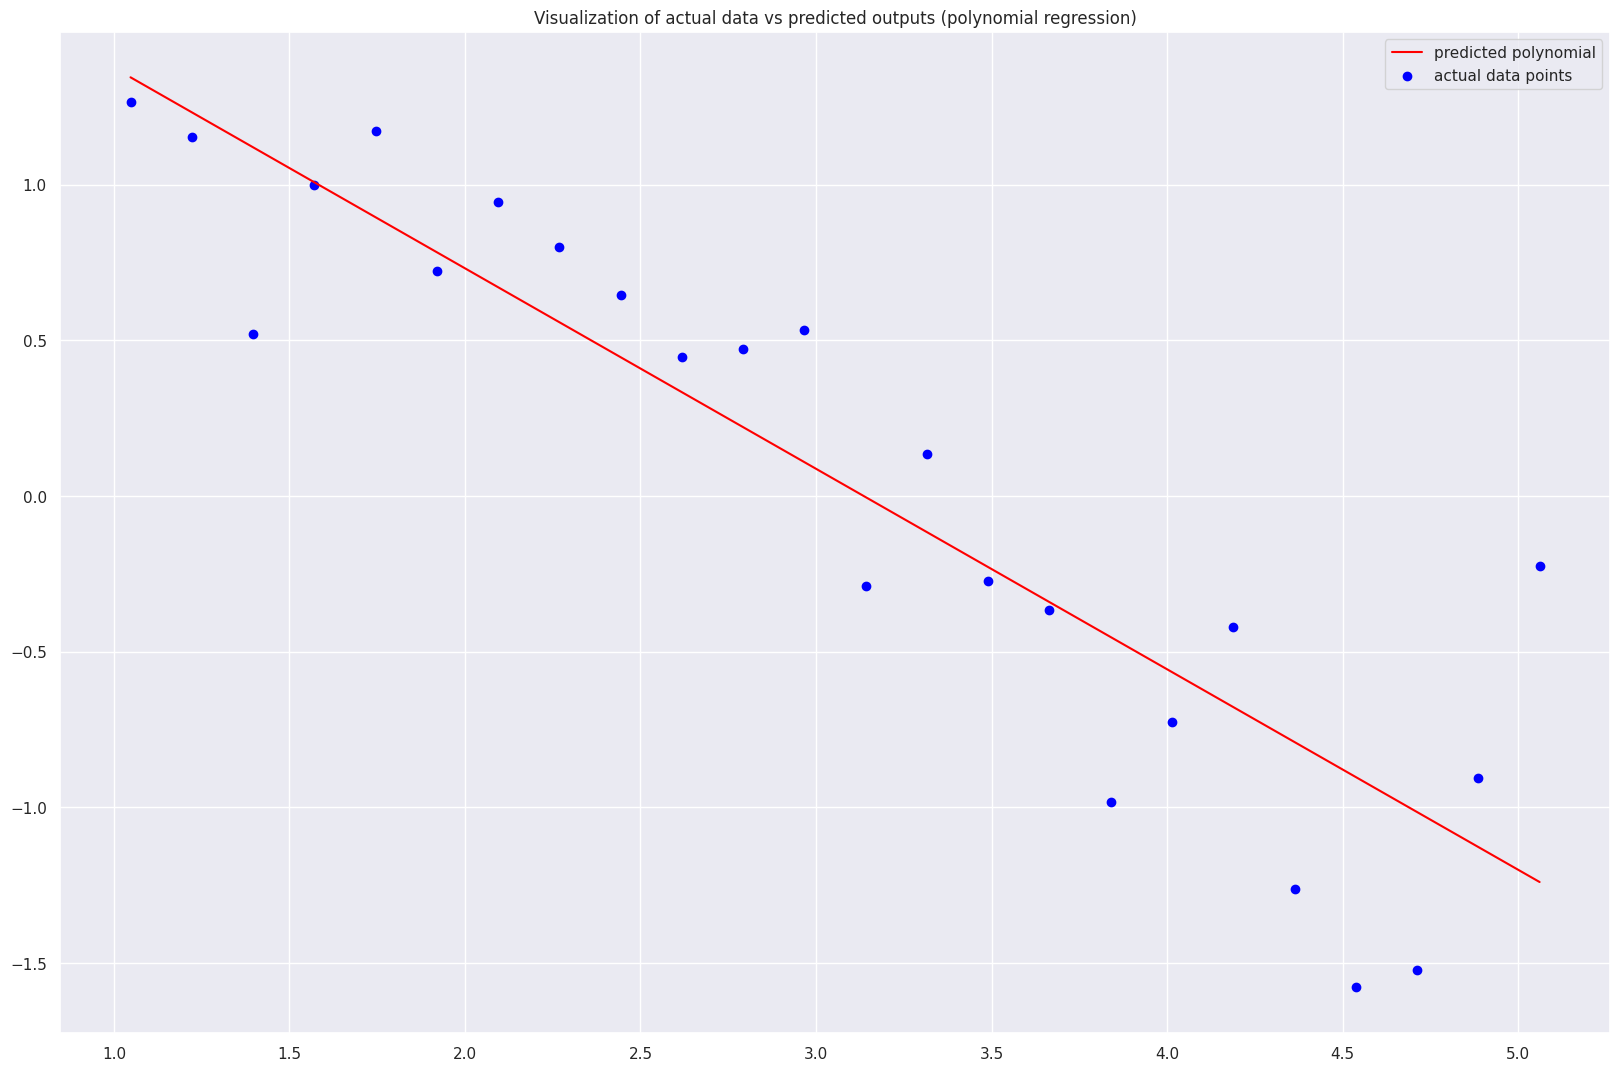

The RMSE for polynomial regression is: 0.3775332572313131


In [ ]:
deg = 1
np.random.seed(10)

x_ex = np.array([i*np.pi/180 for i in range(60,300,10)])
y_ex = np.sin(x_ex) + np.random.normal(0,0.3,len(x_ex))
poly_regression(x_ex,y_ex,deg)